<h1><center>Zurich University of Applied Sciences - Master Dissertation</center></h1>

<h2><center>
Seasonal anomalies: Past findings and contemporary facts – Comparison of the Dow Jones and the Swiss Market Index
</center></h2>

<h0><center>Under the Supervision of:</center></h0>

<h0><center>Dr. Bachmann, Oliver</center></h0>

<h0><center>Submitted by:</center></h0>


<h0><center>Dennis Leutwiler</center></h0>
<h0><center>16/06/2022</center></h0>

<h2><center>Overview</center></h2>

This Jupyter notebook is the methodologies part to the above mentioned dissertation. It is the data work part that was required for the dissertation and a calculation of all the statistical information needed to make inferences about the contemporary seasonal anomalies in the Dow Jones Industrial Average and the Swiss Market Index 

About the data: The Wall Street Journal was the source of the Dow Jones Industrial Average daily returns while Bloomberg was the source of the data for the Swiss Market Index 

<h2><center>Data</center></h2>

In [523]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eikon as ek
import scipy.stats as stats
import datetime
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
from scipy.stats import wilcoxon
from scipy.stats import shapiro
from scipy.stats import anderson
import pylab
import scipy.stats as stats
from datetime import datetime, timedelta

In [524]:
#Reading in excel file
djia = pd.read_excel('DJIA.xls', index_col = 'Date')

In [525]:
#Cleaning the data
djia = pd.read_excel('DJIA.xls', index_col = 'Date')
djia = djia.dropna()
djia = djia.pct_change()
djia = djia.dropna()
djia.rename(columns={ djia.columns[0]: 'RDJIA'}, inplace = True)
djia

,RDJIA
Date,
1991-01-03,-0.014223
1991-01-04,-0.002883
1991-01-07,-0.016882
1991-01-08,-0.005296
1991-01-09,-0.015585
...,...
2020-12-24,0.002325
2020-12-28,0.006758
2020-12-29,-0.002246


In [526]:
#descriptive stats Period 1-3
djia.describe()

,RDJIA
count,7560.000000
mean,0.000388
std,0.011168
min,-0.129265
25%,-0.004370
50%,0.000537
75%,0.005590
max,0.113650


In [527]:
#repeat process for the Swiss Market Index
smi = pd.read_excel('SMI.xls', index_col = 'Dates')
smi = smi.dropna()
smi = smi.pct_change()
smi = smi.dropna()
smi.rename(columns={ smi.columns[0]: 'RSMI'}, inplace = True)
smi

,RSMI
Dates,
1991-01-04,-0.000292
1991-01-07,-0.022891
1991-01-08,-0.010371
1991-01-09,0.017717
1991-01-10,-0.013631
...,...
2020-12-22,0.009495
2020-12-23,0.000822
2020-12-28,0.018399


In [528]:
#descriptive stats Period 1-3
smi.describe()

,RSMI
count,7543.000000
mean,0.000337
std,0.011360
min,-0.096374
25%,-0.005204
50%,0.000651
75%,0.006185
max,0.113910


## Vergleich Tagesreturns
Vergleich von verbundenen (abhaengigen) Stichproben. 

In [529]:
#comparison of DJIA and SMI (data cleaning and concating) 
df2 = pd.concat([smi, djia], axis = 1)
df2 = df2.dropna()
df2

,RSMI,RDJIA
1991-01-04,-0.000292,-0.002883
1991-01-07,-0.022891,-0.016882
1991-01-08,-0.010371,-0.005296
1991-01-09,0.017717,-0.015585
1991-01-10,-0.013631,0.011521
...,...,...
2020-12-22,0.009495,-0.006650
2020-12-23,0.000822,0.003809
2020-12-28,0.018399,0.006758
2020-12-29,0.007408,-0.002246


In [530]:
#descriptive statistics
df2.describe()

,RSMI,RDJIA
count,7370.000000,7370.000000
mean,0.000305,0.000368
std,0.011353,0.011201
min,-0.096374,-0.129265
25%,-0.005260,-0.004391
50%,0.000615,0.000519
75%,0.006176,0.005570
max,0.113910,0.113650


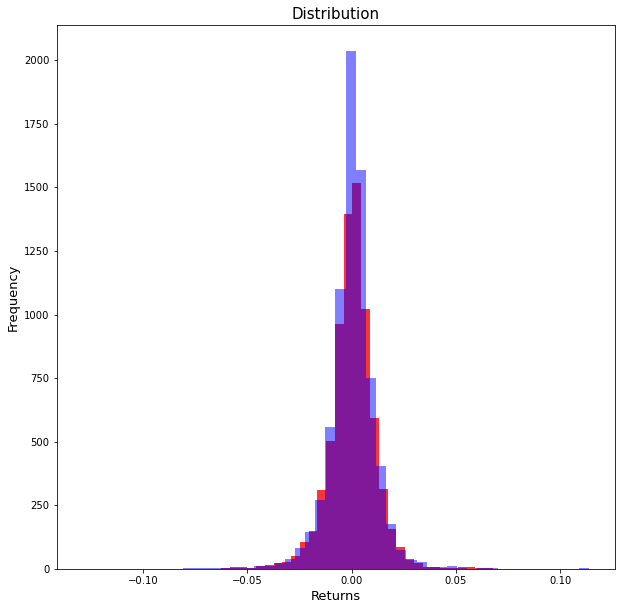

In [531]:
#Histogram of DJIA and SMI
df2['RSMI'].plot.hist(bins = 50, color = 'r', alpha = 0.8)
df2['RDJIA'].plot.hist(bins = 50, color = 'b', alpha = 0.5)
                       

plt.title('Distribution', fontsize=15)
plt.xlabel('Returns', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('RSMIRDJIAHIST')
plt.show()

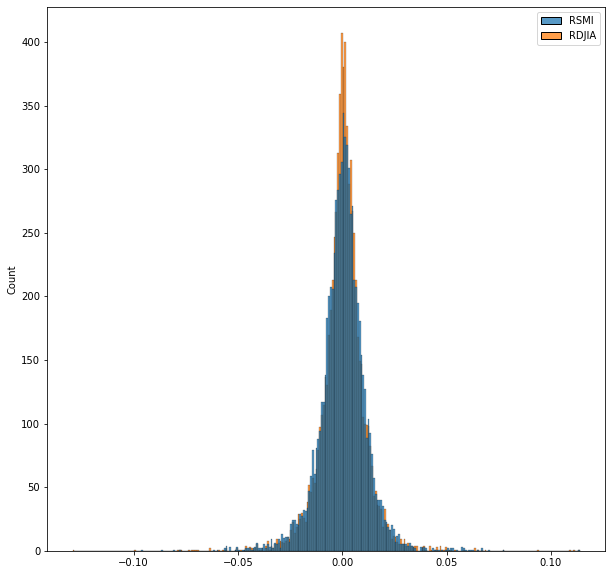

In [532]:
#Histogram of DJIA and SMI (more bins)
sns.histplot([df2['RSMI'], df2['RDJIA']])
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('RSMIRDJIAHIST1')

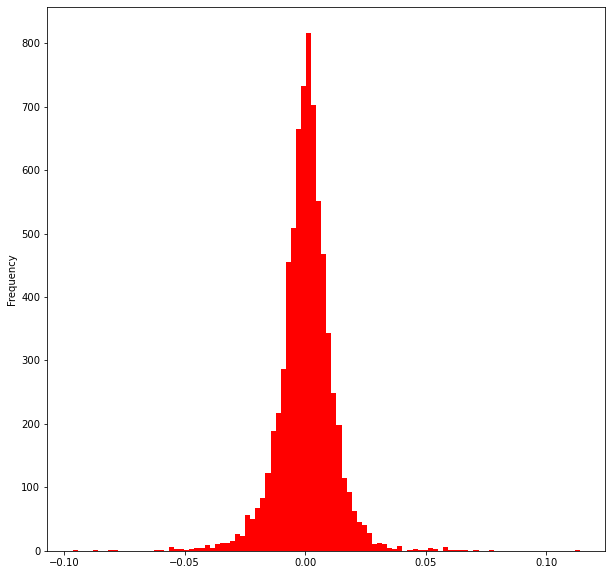

In [533]:
#Histogram of SMI
df2['RSMI'].plot.hist(bins = 100, color = 'r')
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('RSMI')

In [534]:
#Testing to see if data is normally distributed
from scipy.stats import jarque_bera

result = (jarque_bera(djia['RDJIA']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 52807.9620587337
p-value: 0.0


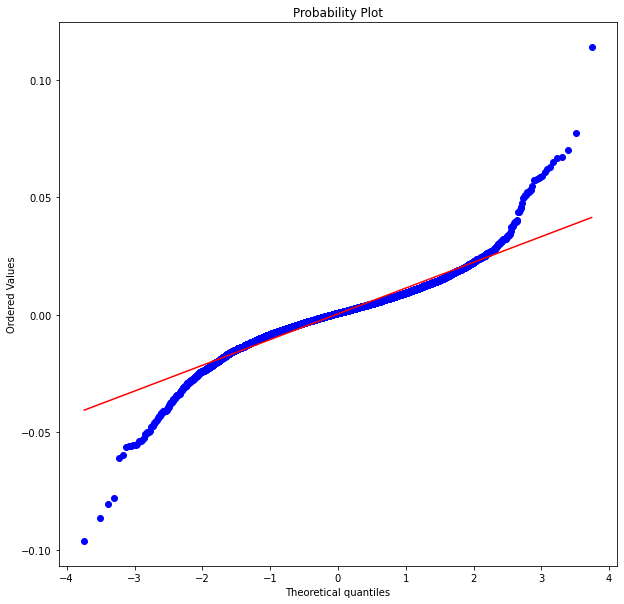

In [535]:
#q-q plot RSMI 
stats.probplot(smi['RSMI'], dist="norm", plot=pylab)
pylab.show()


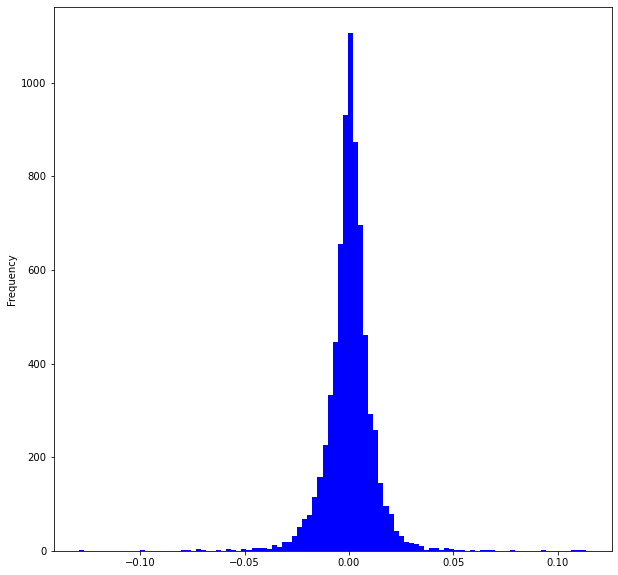

In [536]:
#histogram for DJIA
df2['RDJIA'].plot.hist(bins = 100, color = 'b')
plt.rcParams["figure.figsize"] = (10,10)
plt.savefig('RDJIA')

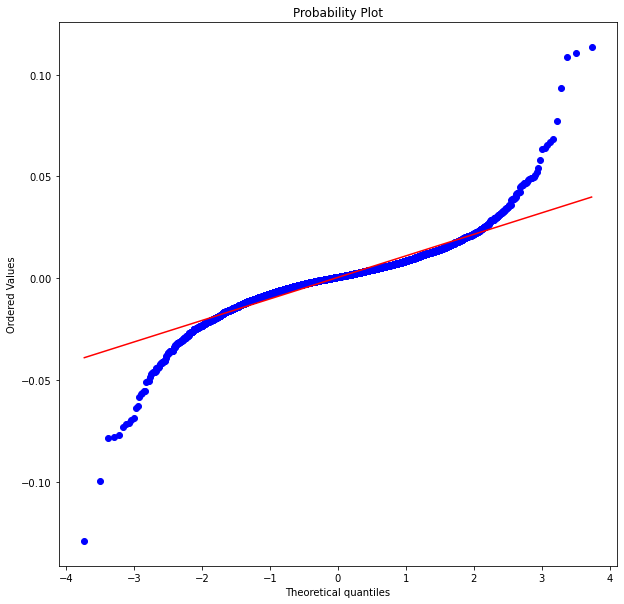

In [537]:
#q-q plot RDJIA
stats.probplot(df2['RDJIA'], dist="norm", plot=pylab)
pylab.show()

In [538]:
#Testing to see if data is normally distributed
result = (jarque_bera(smi['RSMI']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")

JB statistic: 15845.778952129158
p-value: 0.0


### Hypothesentest bezueglich Difference von mittlerer Tagesrenditen

In [539]:
#calculating differences
df2['Diff'] = df2['RSMI'] - df2['RDJIA']
df2['Diff'].describe()

count    7370.000000
mean       -0.000062
std         0.011557
min        -0.101944
25%        -0.005901
50%         0.000050
75%         0.006065
max         0.112477
Name: Diff, dtype: float64

In [540]:
#calculating difference
df2['Diff'] = df2['RSMI'] - df2['RDJIA']
df2

,RSMI,RDJIA,Diff
1991-01-04,-0.000292,-0.002883,0.002592
1991-01-07,-0.022891,-0.016882,-0.006010
1991-01-08,-0.010371,-0.005296,-0.005075
1991-01-09,0.017717,-0.015585,0.033302
1991-01-10,-0.013631,0.011521,-0.025152
...,...,...,...
2020-12-22,0.009495,-0.006650,0.016145
2020-12-23,0.000822,0.003809,-0.002987
2020-12-28,0.018399,0.006758,0.011641
2020-12-29,0.007408,-0.002246,0.009654


In [541]:
#correlation
df2.corr()

,RSMI,RDJIA,Diff
RSMI,1.000000,0.474959,0.522048
RDJIA,0.474959,1.000000,-0.502622
Diff,0.522048,-0.502622,1.000000


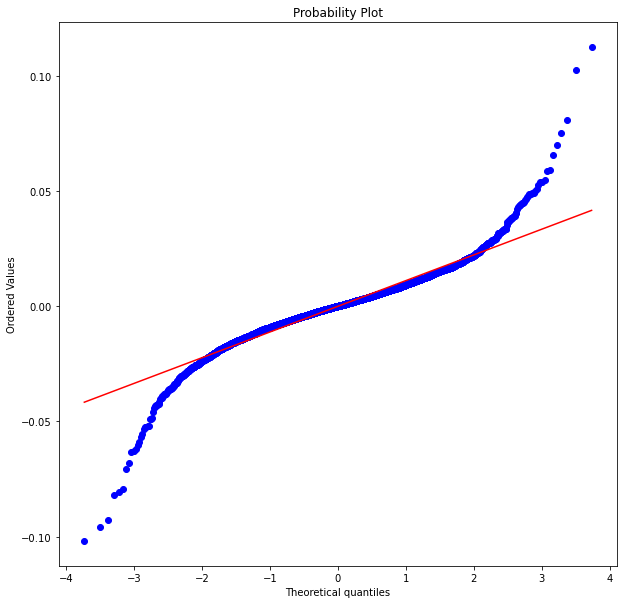

In [542]:
#qq plot diff 
stats.probplot(df2['Diff'], dist="norm", plot=pylab)
pylab.show()

In [543]:
#t-stat diff
stats.ttest_1samp(a = df2['Diff'], popmean = 0)

Ttest_1sampResult(statistic=-0.4617401272848177, pvalue=0.6442813213711547)

Teststatistik ist -0.46 und p-Wert ist 0.64, d.h. die durchschnittlichen Tagesrenditen von SMI und DJIA unterscheiden sich nicht signifikant. 

Failed to reject null hypothesis <br />
H0 : Difference RSMI - RDJIA = 0 <br />
H1 : Difference RSMI -RDJIA ≠ 0 <br />

In [544]:
#creating weekday info for OLS REGRESSION
df3 = pd.concat([smi, djia], axis = 1)
df3 = df3.dropna()
df3['Weekday'] = df3.index.dayofweek
df3

,RSMI,RDJIA,Weekday
1991-01-04,-0.000292,-0.002883,4
1991-01-07,-0.022891,-0.016882,0
1991-01-08,-0.010371,-0.005296,1
1991-01-09,0.017717,-0.015585,2
1991-01-10,-0.013631,0.011521,3
...,...,...,...
2020-12-22,0.009495,-0.006650,1
2020-12-23,0.000822,0.003809,2
2020-12-28,0.018399,0.006758,0
2020-12-29,0.007408,-0.002246,1


In [545]:
#Creating weekday info for OLS REGRESSION
djia['Weekday'] = djia.index.dayofweek
djia['Weekday'] =  djia['Weekday'].astype(object)
djia

,RDJIA,Weekday
Date,,
1991-01-03,-0.014223,3
1991-01-04,-0.002883,4
1991-01-07,-0.016882,0
1991-01-08,-0.005296,1
1991-01-09,-0.015585,2
...,...,...
2020-12-24,0.002325,3
2020-12-28,0.006758,0
2020-12-29,-0.002246,1


In [546]:
# imports & OLS REGRESSION
#https://stackoverflow.com/questions/50155925/weekday-as-dummy-factor-variable-in-a-linear-regression-model-using-statsmodel
import pandas as pd
import statsmodels.api as sm

df = pd.DataFrame(df3)

df['Weekday'] =  df['Weekday'].astype(object)
independent = df['RSMI'].to_frame()
x = sm.add_constant(independent)

model = sm.OLS(df['RDJIA'], x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RDJIA   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     2146.
Date:                Thu, 16 Jun 2022   Prob (F-statistic):               0.00
Time:                        12:54:10   Log-Likelihood:                 23589.
No. Observations:                7370   AIC:                        -4.717e+04
Df Residuals:                    7368   BIC:                        -4.716e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      1.954      0.051   -7.25e-07       0.000
RSMI           0.4686      0.010     46.328      0.000       0.449       0.488
==============================================================================
Omnibus:                     1423.652   Durbin-Watson:                   2.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43954.921
Skew:                           0.026   Prob(JB):                         0.00
Kurtosis:                      14.964   Cond. No.                         88.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [547]:
#OLS Regression for Weekdays (RDJIA)
#https://stackoverflow.com/questions/50155925/weekday-as-dummy-factor-variable-in-a-linear-regression-model-using-statsmodel
res = sm.OLS.from_formula('RDJIA ~ Weekday', djia).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  RDJIA   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.181
Date:                Thu, 16 Jun 2022   Prob (F-statistic):              0.317
Time:                        12:54:10   Log-Likelihood:                 23256.
No. Observations:                7560   AIC:                        -4.650e+04
Df Residuals:                    7555   BIC:                        -4.647e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0007      0.000      2.337   

In [548]:
#adding datetime info to dataset (DJIA)
djia['Year'] = djia.index.year
djia['Quarter'] = djia.index.quarter
djia['Month'] = djia.index.month_name()
djia['Day'] = djia.index.day_name()
djia['Weekday Number'] = djia.index.dayofweek
djia['Month Number'] = djia.index.month
djia['Day Number'] = djia.index.day

In [549]:
#adding datetime info to dataset (SMI)
smi['Year'] = smi.index.year
smi['Quarter'] = smi.index.quarter
smi['Month'] = smi.index.month_name()
smi['Day'] = smi.index.day_name()
smi['Weekday Number'] = smi.index.dayofweek
smi['Month Number'] = smi.index.month
smi['Day Number'] = smi.index.day
smi

,RSMI,Year,Quarter,Month,Day,Weekday Number,Month Number,Day Number
Dates,,,,,,,,
1991-01-04,-0.000292,1991,1,January,Friday,4,1,4
1991-01-07,-0.022891,1991,1,January,Monday,0,1,7
1991-01-08,-0.010371,1991,1,January,Tuesday,1,1,8
1991-01-09,0.017717,1991,1,January,Wednesday,2,1,9
1991-01-10,-0.013631,1991,1,January,Thursday,3,1,10
...,...,...,...,...,...,...,...,...
2020-12-22,0.009495,2020,4,December,Tuesday,1,12,22
2020-12-23,0.000822,2020,4,December,Wednesday,2,12,23
2020-12-28,0.018399,2020,4,December,Monday,0,12,28


## Wochentagseffekte

In [550]:
#Means for SMI all periods
smi['RSMI'].groupby(smi['Day']).mean()

Day
Friday       0.000349
Monday       0.000152
Thursday     0.000074
Tuesday      0.000628
Wednesday    0.000470
Name: RSMI, dtype: float64

In [551]:
#Means for DJIA all periods
djia['RDJIA'].groupby(djia['Day']).mean()

Day
Friday       0.000051
Monday       0.000691
Thursday     0.000150
Tuesday      0.000741
Wednesday    0.000320
Name: RDJIA, dtype: float64

In [552]:
#Summe der Renditen in der erste Monatshälfte
WD = djia['RDJIA'].groupby([(djia['RDJIA'].index.year), (djia['RDJIA'].index.dayofweek)]).sum()
WD.head(50)

Date  Date
1991  0       0.057148
      1       0.022216
      2       0.070283
      3       0.094302
      4      -0.039454
1992  0       0.089669
      1      -0.028853
      2       0.001298
      3       0.028916
      4      -0.044748
1993  0       0.127538
      1      -0.044860
      2       0.070305
      3       0.002111
      4      -0.022708
1994  0       0.035702
      1      -0.003444
      2       0.006906
      3      -0.040349
      4       0.028302
1995  0       0.048510
      1       0.058571
      2       0.080489
      3       0.034057
      4       0.070855
1996  0       0.110095
      1       0.030445
      2      -0.005557
      3       0.047515
      4       0.056041
1997  0       0.105905
      1       0.325421
      2      -0.079321
      3      -0.129114
      4      -0.001091
1998  0       0.035674
      1       0.139341
      2       0.069533
      3      -0.187592
      4       0.112035
1999  0       0.099588
      1      -0.147173
      2       0.077475


In [553]:
#CREATION OF WEEKDAY DATA SETS FOR DJIA AND SMI
mon = djia[['RDJIA', 'Day']]
mon.drop(djia.loc[mon['Day']!='Monday'].index, inplace=True)
mon['Positive Negative'] = np.where(mon['RDJIA'] > 0, 1, 0)

tue = djia[['RDJIA', 'Day']]
tue.drop(djia.loc[tue['Day']!='Tuesday'].index, inplace=True)
tue['Positive Negative'] = np.where(tue['RDJIA'] > 0, 1, 0)

wed = djia[['RDJIA', 'Day']]
wed.drop(djia.loc[wed['Day']!='Wednesday'].index, inplace=True)
wed['Positive Negative'] = np.where(wed['RDJIA'] > 0, 1, 0)

thu = djia[['RDJIA', 'Day']]
thu.drop(djia.loc[thu['Day']!='Thursday'].index, inplace=True)
thu['Positive Negative'] = np.where(thu['RDJIA'] > 0, 1, 0)

fri = djia[['RDJIA', 'Day']]
fri.drop(djia.loc[fri['Day']!='Friday'].index, inplace=True)
fri['Positive Negative'] = np.where(fri['RDJIA'] > 0, 1, 0)

smon = smi[['RSMI', 'Day']]
smon.drop(smi.loc[smon['Day']!='Monday'].index, inplace=True)
smon['Positive Negative'] = np.where(smon['RSMI'] > 0, 1, 0)

stue = smi[['RSMI', 'Day']]
stue.drop(smi.loc[stue['Day']!='Tuesday'].index, inplace=True)
stue['Positive Negative'] = np.where(stue['RSMI'] > 0, 1, 0)

swed = smi[['RSMI', 'Day']]
swed.drop(smi.loc[swed['Day']!='Wednesday'].index, inplace=True)
swed['Positive Negative'] = np.where(swed['RSMI'] > 0, 1, 0)

sthu = smi[['RSMI', 'Day']]
sthu.drop(smi.loc[sthu['Day']!='Thursday'].index, inplace=True)
sthu['Positive Negative'] = np.where(sthu['RSMI'] > 0, 1, 0)

sfri = smi[['RSMI', 'Day']]
sfri.drop(smi.loc[sfri['Day']!='Friday'].index, inplace=True)
sfri['Positive Negative'] = np.where(sfri['RSMI'] > 0, 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-553-9f6fbafceea2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mon['Positive Negative'] = np.where(mon['RDJIA'] > 0, 1, 0)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [554]:
#Creation of Periods 1-3 for both data sets
y1 = djia.loc[djia.index <= '2000-12-31 00:00:00']
y2a = djia.drop(pd.date_range('1991-01-01', '2000-12-31'), errors='ignore')
y2 = y2a.drop(pd.date_range('2011-01-01', '2020-12-31'), errors='ignore')
y3 = djia.loc[djia.index >= '2011-01-01 00:00:00']

x1 = smi.loc[smi.index <= '2000-12-31 00:00:00']
x2a = smi.drop(pd.date_range('1991-01-01', '2000-12-31'), errors='ignore')
x2 = x2a.drop(pd.date_range('2011-01-01', '2020-12-31'), errors='ignore')
x3 = smi.loc[smi.index >= '2011-01-01 00:00:00']

In [555]:
#1991-2000 RDJIA WEEKDAY RETURNS
y1mon = y1[['RDJIA', 'Day']]
y1mon.drop(y1.loc[y1['Day']!='Monday'].index, inplace=True)

y1tue = y1[['RDJIA', 'Day']]
y1tue.drop(y1.loc[y1['Day']!='Tuesday'].index, inplace=True)

y1wed = y1[['RDJIA', 'Day']]
y1wed.drop(y1.loc[y1['Day']!='Wednesday'].index, inplace=True)

y1thu = y1[['RDJIA', 'Day']]
y1thu.drop(y1.loc[y1['Day']!='Thursday'].index, inplace=True)

y1fri = y1[['RDJIA', 'Day']]
y1fri.drop(y1.loc[y1['Day']!='Friday'].index, inplace=True)

#2001-2010 RDJIA WEEKDAY RETURNS
y2mon = y2[['RDJIA', 'Day']]
y2mon.drop(y2.loc[y2['Day']!='Monday'].index, inplace=True)

y2tue = y2[['RDJIA', 'Day']]
y2tue.drop(y2.loc[y2['Day']!='Tuesday'].index, inplace=True)

y2wed = y2[['RDJIA', 'Day']]
y2wed.drop(y2.loc[y2['Day']!='Wednesday'].index, inplace=True)

y2thu = y2[['RDJIA', 'Day']]
y2thu.drop(y2.loc[y2['Day']!='Thursday'].index, inplace=True)

y2fri = y2[['RDJIA', 'Day']]
y2fri.drop(y2.loc[y2['Day']!='Friday'].index, inplace=True)

#2011-2020 RDJIA WEEKDAY RETURNS
y3mon = y3[['RDJIA', 'Day']]
y3mon.drop(y3.loc[y3['Day']!='Monday'].index, inplace=True)

y3tue = y3[['RDJIA', 'Day']]
y3tue.drop(y3.loc[y3['Day']!='Tuesday'].index, inplace=True)

y3wed = y3[['RDJIA', 'Day']]
y3wed.drop(y3.loc[y3['Day']!='Wednesday'].index, inplace=True)

y3thu = y3[['RDJIA', 'Day']]
y3thu.drop(y3.loc[y3['Day']!='Thursday'].index, inplace=True)

y3fri = y3[['RDJIA', 'Day']]
y3fri.drop(y3.loc[y3['Day']!='Friday'].index, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [556]:
#1991-2000 SMI WEEKDAY RETURNS
x1mon = x1[['RSMI', 'Day']]
x1mon.drop(x1.loc[x1['Day']!='Monday'].index, inplace=True)

x1tue = x1[['RSMI', 'Day']]
x1tue.drop(x1.loc[x1['Day']!='Tuesday'].index, inplace=True)

x1wed = x1[['RSMI', 'Day']]
x1wed.drop(x1.loc[x1['Day']!='Wednesday'].index, inplace=True)

x1thu = x1[['RSMI', 'Day']]
x1thu.drop(x1.loc[x1['Day']!='Thursday'].index, inplace=True)

x1fri = x1[['RSMI', 'Day']]
x1fri.drop(x1.loc[x1['Day']!='Friday'].index, inplace=True)

#2001-2010 SMI WEEKDAY RETURNS
x2mon = x2[['RSMI', 'Day']]
x2mon.drop(x2.loc[x2['Day']!='Monday'].index, inplace=True)

x2tue = x2[['RSMI', 'Day']]
x2tue.drop(x2.loc[x2['Day']!='Tuesday'].index, inplace=True)

x2wed = x2[['RSMI', 'Day']]
x2wed.drop(x2.loc[x2['Day']!='Wednesday'].index, inplace=True)

x2thu = x2[['RSMI', 'Day']]
x2thu.drop(x2.loc[x2['Day']!='Thursday'].index, inplace=True)

x2fri = x2[['RSMI', 'Day']]
x2fri.drop(x2.loc[x2['Day']!='Friday'].index, inplace=True)

#2011-2020 SMI WEEKDAY RETURNS
x3mon = x3[['RSMI', 'Day']]
x3mon.drop(x3.loc[x3['Day']!='Monday'].index, inplace=True)

x3tue = x3[['RSMI', 'Day']]
x3tue.drop(x3.loc[x3['Day']!='Tuesday'].index, inplace=True)

x3wed = x3[['RSMI', 'Day']]
x3wed.drop(x3.loc[x3['Day']!='Wednesday'].index, inplace=True)

x3thu = x3[['RSMI', 'Day']]
x3thu.drop(x3.loc[x3['Day']!='Thursday'].index, inplace=True)

x3fri = x3[['RSMI', 'Day']]
x3fri.drop(x3.loc[x3['Day']!='Friday'].index, inplace=True)

In [557]:
#Mean returns all periods all days DJIA
print('Mean Monday RDJIA Period 1-3: ', mon['RDJIA'].mean())
print('Mean Monday RDJIA Period 1: ', y1mon['RDJIA'].mean())
print('Mean Monday RDJIA Period 2: ', y2mon['RDJIA'].mean())
print('Mean Monday RDJIA Period 3: ', y3mon['RDJIA'].mean())
print('-----------------------------')
print('Mean Tuesday RDJIA Period 1-3: ', tue['RDJIA'].mean())
print('Mean Tuesday RDJIA Period 1: ', y1tue['RDJIA'].mean())
print('Mean Tuesday RDJIA Period 2: ', y2tue['RDJIA'].mean())
print('Mean Tuesday RDJIA Period 3: ', y3tue['RDJIA'].mean())
print('-----------------------------')
print('Mean Wednesday RDJIA Period 1-3: ', wed['RDJIA'].mean())
print('Mean Wednesday RDJIA Period 1: ', y1wed['RDJIA'].mean())
print('Mean Wednesday RDJIA Period 2: ', y2wed['RDJIA'].mean())
print('Mean Wednesday RDJIA Period 3: ', y3wed['RDJIA'].mean())
print('-----------------------------')
print('Mean Thursday RDJIA Period 1-3: ', thu['RDJIA'].mean())
print('Mean Thursday RDJIA Period 1: ', y1thu['RDJIA'].mean())
print('Mean Thursday RDJIA Period 2: ', y2thu['RDJIA'].mean())
print('Mean Thursday RDJIA Period 3: ', y3thu['RDJIA'].mean())
print('-----------------------------')
print('Mean Friday RDJIA Period 1-3: ', fri['RDJIA'].mean())
print('Mean Friday RDJIA Period 1: ', y1fri['RDJIA'].mean())
print('Mean Friday RDJIA Period 2: ', y2fri['RDJIA'].mean())
print('Mean Friday RDJIA Period 3: ', y3fri['RDJIA'].mean())

Mean Monday RDJIA Period 1-3:  0.0006905290662652583
Mean Monday RDJIA Period 1:  0.001885926376845444
Mean Monday RDJIA Period 2:  0.00015375893556074477
Mean Monday RDJIA Period 3:  1.81887144241005e-05
-----------------------------
Mean Tuesday RDJIA Period 1-3:  0.0007405872527138811
Mean Tuesday RDJIA Period 1:  0.000780543912916375
Mean Tuesday RDJIA Period 2:  0.00039449270777328657
Mean Tuesday RDJIA Period 3:  0.0010458221054257266
-----------------------------
Mean Wednesday RDJIA Period 1-3:  0.00031996611867856565
Mean Wednesday RDJIA Period 1:  0.00021890676466421286
Mean Wednesday RDJIA Period 2:  0.0004152657357833817
Mean Wednesday RDJIA Period 3:  0.00032555199174306304
-----------------------------
Mean Thursday RDJIA Period 1-3:  0.00014970790428383697
Mean Thursday RDJIA Period 1:  -1.2366761922156038e-05
Mean Thursday RDJIA Period 2:  0.00016520021355858271
Mean Thursday RDJIA Period 3:  0.00029635125455868564
-----------------------------
Mean Friday RDJIA Period 

In [558]:
#Mean returns all periods all days SMI
print('Mean Monday SMI Period 1-3: ', smon['RSMI'].mean())
print('Mean Monday SMI Period 1: ', x1mon['RSMI'].mean())
print('Mean Monday SMI Period 2: ', x2mon['RSMI'].mean())
print('Mean Monday SMI Period 3: ', x3mon['RSMI'].mean())
print('-----------------------------')
print('Mean Tuesday SMI Period 1-3: ', stue['RSMI'].mean())
print('Mean Tuesday SMI Period 1: ', x1tue['RSMI'].mean())
print('Mean Tuesday SMI Period 2: ', x2tue['RSMI'].mean())
print('Mean Tuesday SMI Period 3: ', x3tue['RSMI'].mean())
print('-----------------------------')
print('Mean Wednesday SMI Period 1-3: ', swed['RSMI'].mean())
print('Mean Wednesday SMI Period 1: ', x1wed['RSMI'].mean())
print('Mean Wednesday SMI Period 2: ', x2wed['RSMI'].mean())
print('Mean Wednesday SMI Period 3: ', x3wed['RSMI'].mean())
print('-----------------------------')
print('Mean Thursday SMI Period 1-3: ', sthu['RSMI'].mean())
print('Mean Thursday SMI Period 1: ', x1thu['RSMI'].mean())
print('Mean Thursday SMI Period 2: ', x2thu['RSMI'].mean())
print('Mean Thursday SMI Period 3: ', x3thu['RSMI'].mean())
print('-----------------------------')
print('Mean Friday SMI Period 1-3: ', sfri['RSMI'].mean())
print('Mean Friday SMI Period 1: ', x1fri['RSMI'].mean())
print('Mean Friday SMI Period 2: ', x2fri['RSMI'].mean())
print('Mean Friday SMI Period 3: ', x3fri['RSMI'].mean())

Mean Monday SMI Period 1-3:  0.00015183011764220816
Mean Monday SMI Period 1:  0.0006174529962495555
Mean Monday SMI Period 2:  -2.7046888466449078e-05
Mean Monday SMI Period 3:  -0.00013535693631410987
-----------------------------
Mean Tuesday SMI Period 1-3:  0.0006276541448330297
Mean Tuesday SMI Period 1:  0.0008724699211093251
Mean Tuesday SMI Period 2:  -3.8107334428607e-05
Mean Tuesday SMI Period 3:  0.001045714003697236
-----------------------------
Mean Wednesday SMI Period 1-3:  0.00046968815320212216
Mean Wednesday SMI Period 1:  0.0009908110995314598
Mean Wednesday SMI Period 2:  -0.0002801715894469827
Mean Wednesday SMI Period 3:  0.0006986246307993305
-----------------------------
Mean Thursday SMI Period 1-3:  7.402100488767428e-05
Mean Thursday SMI Period 1:  0.0002523037531843405
Mean Thursday SMI Period 2:  0.00044667631963713145
Mean Thursday SMI Period 3:  -0.00048178740776756647
-----------------------------
Mean Friday SMI Period 1-3:  0.00034932155255074543
Mean

In [559]:
#Median returns of all periods all days DJIA
print('Median Monday RDJIA Period 1-3: ', mon['RDJIA'].median())
print('Median Monday RDJIA Period 1: ', y1mon['RDJIA'].median())
print('Median Monday RDJIA Period 2: ', y2mon['RDJIA'].median())
print('Median Monday RDJIA Period 3: ', y3mon['RDJIA'].median())
print('-----------------------------')
print('Median Tuesday RDJIA Period 1-3: ', tue['RDJIA'].median())
print('Median Tuesday RDJIA Period 1: ', y1tue['RDJIA'].median())
print('Median Tuesday RDJIA Period 2: ', y2tue['RDJIA'].median())
print('Median Tuesday RDJIA Period 3: ', y3tue['RDJIA'].median())
print('-----------------------------')
print('Median Wednesday RDJIA Period 1-3: ', wed['RDJIA'].median())
print('Median Wednesday RDJIA Period 1: ', y1wed['RDJIA'].median())
print('Median Wednesday RDJIA Period 2: ', y2wed['RDJIA'].median())
print('Median Wednesday RDJIA Period 3: ', y3wed['RDJIA'].median())
print('-----------------------------')
print('Median Thursday RDJIA Period 1-3: ', thu['RDJIA'].median())
print('Median Thursday RDJIA Period 1: ', y1thu['RDJIA'].median())
print('Median Thursday RDJIA Period 2: ', y2thu['RDJIA'].median())
print('Median Thursday RDJIA Period 3: ', y3thu['RDJIA'].median())
print('-----------------------------')
print('Median Friday RDJIA Period 1-3: ', fri['RDJIA'].median())
print('Median Friday RDJIA Period 1: ', y1fri['RDJIA'].median())
print('Median Friday RDJIA Period 2: ', y2fri['RDJIA'].median())
print('Median Friday RDJIA Period 3: ', y3fri['RDJIA'].median())

Median Monday RDJIA Period 1-3:  0.000711772105539632
Median Monday RDJIA Period 1:  0.0016265249670406323
Median Monday RDJIA Period 2:  0.00013963618543877399
Median Monday RDJIA Period 3:  0.0003327049599879395
-----------------------------
Median Tuesday RDJIA Period 1-3:  0.0004244445258182461
Median Tuesday RDJIA Period 1:  0.0001928519771792203
Median Tuesday RDJIA Period 2:  0.00037472730831233925
Median Tuesday RDJIA Period 3:  0.0006992899217567183
-----------------------------
Median Wednesday RDJIA Period 1-3:  0.0004381441566642108
Median Wednesday RDJIA Period 1:  0.00029676228514097236
Median Wednesday RDJIA Period 2:  0.0005661140315407209
Median Wednesday RDJIA Period 3:  0.0004464909692347696
-----------------------------
Median Thursday RDJIA Period 1-3:  0.000464275439973183
Median Thursday RDJIA Period 1:  -0.0001776967425927145
Median Thursday RDJIA Period 2:  0.000708347832266365
Median Thursday RDJIA Period 3:  0.0007019661665367272
-----------------------------

In [560]:
#Mean returns all periods all days SMI
print('Median Monday SMI Period 1-3: ', smon['RSMI'].median())
print('Median Monday SMI Period 1: ', x1mon['RSMI'].median())
print('Median Monday SMI Period 2: ', x2mon['RSMI'].median())
print('Median Monday SMI Period 3: ', x3mon['RSMI'].median())
print('-----------------------------')
print('Median Tuesday SMI Period 1-3: ', stue['RSMI'].median())
print('Median Tuesday SMI Period 1: ', x1tue['RSMI'].median())
print('Median Tuesday SMI Period 2: ', x2tue['RSMI'].median())
print('Median Tuesday SMI Period 3: ', x3tue['RSMI'].median())
print('-----------------------------')
print('Median Wednesday SMI Period 1-3: ', swed['RSMI'].median())
print('Median Wednesday SMI Period 1: ', x1wed['RSMI'].median())
print('Median Wednesday SMI Period 2: ', x2wed['RSMI'].median())
print('Median Wednesday SMI Period 3: ', x3wed['RSMI'].median())
print('-----------------------------')
print('Median Thursday SMI Period 1-3: ', sthu['RSMI'].median())
print('Median Thursday SMI Period 1: ', x1thu['RSMI'].median())
print('Median Thursday SMI Period 2: ', x2thu['RSMI'].median())
print('Median Thursday SMI Period 3: ', x3thu['RSMI'].median())
print('-----------------------------')
print('Median Friday SMI Period 1-3: ', sfri['RSMI'].median())
print('Median Friday SMI Period 1: ', x1fri['RSMI'].median())
print('Median Friday SMI Period 2: ', x2fri['RSMI'].median())
print('Median Friday SMI Period 3: ', x3fri['RSMI'].median())

Median Monday SMI Period 1-3:  0.0007694675429763542
Median Monday SMI Period 1:  0.0011853716295426864
Median Monday SMI Period 2:  0.0006051614889019952
Median Monday SMI Period 3:  0.00045160731043591973
-----------------------------
Median Tuesday SMI Period 1-3:  0.0006867102664549485
Median Tuesday SMI Period 1:  0.001105894335779345
Median Tuesday SMI Period 2:  0.00018956095023203723
Median Tuesday SMI Period 3:  0.0008627261007831954
-----------------------------
Median Wednesday SMI Period 1-3:  0.000822639628192734
Median Wednesday SMI Period 1:  0.001088913394112101
Median Wednesday SMI Period 2:  0.0006589380001895684
Median Wednesday SMI Period 3:  0.0008340448929534672
-----------------------------
Median Thursday SMI Period 1-3:  0.00042947745088861566
Median Thursday SMI Period 1:  0.00033290396911689335
Median Thursday SMI Period 2:  0.0007469497005633263
Median Thursday SMI Period 3:  0.00016793748671029007
-----------------------------
Median Friday SMI Period 1-3: 

In [561]:
#STDV all periods all days DJIA
print('Stdv Monday RJDIA Period 1-3: ', mon['RDJIA'].std())
print('Stdv Monday RJDIA Period 1: ', y1mon['RDJIA'].std())
print('Stdv Monday RJDIA Period 2: ', y2mon['RDJIA'].std())
print('Stdv Monday RJDIA Period 3: ', y3mon['RDJIA'].std())
print('-----------------------------')
print('Stdv Tuesday RJDIA Period 1-3: ', tue['RDJIA'].std())
print('Stdv Tuesday RJDIA Period 1: ', y1tue['RDJIA'].std())
print('Stdv Tuesday RJDIA Period 2: ', y2tue['RDJIA'].std())
print('Stdv Tuesday RJDIA Period 3: ', y3tue['RDJIA'].std())
print('-----------------------------')
print('Stdv Wednesday RJDIA Period 1-3: ', wed['RDJIA'].std())
print('Stdv Wednesday RJDIA Period 1: ', y1wed['RDJIA'].std())
print('Stdv Wednesday RJDIA Period 2: ', y2wed['RDJIA'].std())
print('Stdv Wednesday RJDIA Period 3: ', y3wed['RDJIA'].std())
print('-----------------------------')
print('Stdv Thursday RJDIA Period 1-3: ', thu['RDJIA'].std())
print('Stdv Thursday RJDIA Period 1: ', y1thu['RDJIA'].std())
print('Stdv Thursday RJDIA Period 2: ', y2thu['RDJIA'].std())
print('Stdv Thursday RJDIA Period 3: ', y3thu['RDJIA'].std())
print('-----------------------------')
print('Stdv Friday RJDIA Period 1-3: ', fri['RDJIA'].std())
print('Stdv Friday RJDIA Period 1: ', y1fri['RDJIA'].std())
print('Stdv Friday RJDIA Period 2: ', y2fri['RDJIA'].std())
print('Stdv Friday RJDIA Period 3: ', y3fri['RDJIA'].std())

Stdv Monday RJDIA Period 1-3:  0.012512237441281594
Stdv Monday RJDIA Period 1:  0.009781896920907793
Stdv Monday RJDIA Period 2:  0.014571908019600847
Stdv Monday RJDIA Period 3:  0.01268362817964061
-----------------------------
Stdv Tuesday RJDIA Period 1-3:  0.011194785403583537
Stdv Tuesday RJDIA Period 1:  0.009468243487228604
Stdv Tuesday RJDIA Period 2:  0.013264973707424493
Stdv Tuesday RJDIA Period 3:  0.01053283403931737
-----------------------------
Stdv Wednesday RJDIA Period 1-3:  0.010558062138840932
Stdv Wednesday RJDIA Period 1:  0.00803078354702271
Stdv Wednesday RJDIA Period 2:  0.012492859418515793
Stdv Wednesday RJDIA Period 3:  0.010685747383258365
-----------------------------
Stdv Thursday RJDIA Period 1-3:  0.011238240260284511
Stdv Thursday RJDIA Period 1:  0.009450856079099412
Stdv Thursday RJDIA Period 2:  0.01296116818681336
Stdv Thursday RJDIA Period 3:  0.01105432741871933
-----------------------------
Stdv Friday RJDIA Period 1-3:  0.010292493156817507
S

In [562]:
#STDV all periods all days SMI
print('Stdv Monday SMI Period 1-3: ', smon['RSMI'].std())
print('Stdv Monday SMI Period 1: ', x1mon['RSMI'].std())
print('Stdv Monday SMI Period 2: ', x2mon['RSMI'].std())
print('Stdv Monday SMI Period 3: ', x3mon['RSMI'].std())
print('-----------------------------')
print('Stdv Tuesday SMI Period 1-3: ', stue['RSMI'].std())
print('Stdv Tuesday SMI Period 1: ', x1tue['RSMI'].std())
print('Stdv Tuesday SMI Period 2: ', x2tue['RSMI'].std())
print('Stdv Tuesday SMI Period 3: ', x3tue['RSMI'].std())
print('-----------------------------')
print('Stdv Wednesday SMI Period 1-3: ', swed['RSMI'].std())
print('Stdv Wednesday SMI Period 1: ', x1wed['RSMI'].std())
print('Stdv Wednesday SMI Period 2: ', x2wed['RSMI'].std())
print('Stdv Wednesday SMI Period 3: ', x3wed['RSMI'].std())
print('-----------------------------')
print('Stdv Thursday SMI Period 1-3: ', sthu['RSMI'].std())
print('Stdv Thursday SMI Period 1: ', x1thu['RSMI'].std())
print('Stdv Thursday SMI Period 2: ', x2thu['RSMI'].std())
print('Stdv Thursday SMI Period 3: ', x3thu['RSMI'].std())
print('-----------------------------')
print('Stdv Friday SMI Period 1-3: ', sfri['RSMI'].std())
print('Stdv Friday SMI Period 1: ', x1fri['RSMI'].std())
print('Stdv Friday SMI Period 2: ', x2fri['RSMI'].std())
print('Stdv Friday SMI Period 3: ', x3fri['RSMI'].std())

Stdv Monday SMI Period 1-3:  0.012788351695274713
Stdv Monday SMI Period 1:  0.01208888162078338
Stdv Monday SMI Period 2:  0.015535678637555072
Stdv Monday SMI Period 3:  0.010143868984614631
-----------------------------
Stdv Tuesday SMI Period 1-3:  0.010771098245742175
Stdv Tuesday SMI Period 1:  0.01038173695302074
Stdv Tuesday SMI Period 2:  0.011988917993623546
Stdv Tuesday SMI Period 3:  0.009818813607800134
-----------------------------
Stdv Wednesday SMI Period 1-3:  0.010370657362541624
Stdv Wednesday SMI Period 1:  0.010113380499114978
Stdv Wednesday SMI Period 2:  0.011761737147280118
Stdv Wednesday SMI Period 3:  0.009018245913985257
-----------------------------
Stdv Thursday SMI Period 1-3:  0.01185556475839973
Stdv Thursday SMI Period 1:  0.010975377998732713
Stdv Thursday SMI Period 2:  0.012817203143956282
Stdv Thursday SMI Period 3:  0.011688961411878938
-----------------------------
Stdv Friday SMI Period 1-3:  0.010911339511055699
Stdv Friday SMI Period 1:  0.0092

In [563]:
#calculating positive days DJIA
y1mon['Positive Negative'] = np.where(y1mon['RDJIA'] > 0, 1, 0)
y2mon['Positive Negative'] = np.where(y2mon['RDJIA'] > 0, 1, 0)
y3mon['Positive Negative'] = np.where(y3mon['RDJIA'] > 0, 1, 0)

y1tue['Positive Negative'] = np.where(y1tue['RDJIA'] > 0, 1, 0)
y2tue['Positive Negative'] = np.where(y2tue['RDJIA'] > 0, 1, 0)
y3tue['Positive Negative'] = np.where(y3tue['RDJIA'] > 0, 1, 0)

y1wed['Positive Negative'] = np.where(y1wed['RDJIA'] > 0, 1, 0)
y2wed['Positive Negative'] = np.where(y2wed['RDJIA'] > 0, 1, 0)
y3wed['Positive Negative'] = np.where(y3wed['RDJIA'] > 0, 1, 0)

y1thu['Positive Negative'] = np.where(y1thu['RDJIA'] > 0, 1, 0)
y2thu['Positive Negative'] = np.where(y2thu['RDJIA'] > 0, 1, 0)
y3thu['Positive Negative'] = np.where(y3thu['RDJIA'] > 0, 1, 0)

y1fri['Positive Negative'] = np.where(y1fri['RDJIA'] > 0, 1, 0)
y2fri['Positive Negative'] = np.where(y2fri['RDJIA'] > 0, 1, 0)
y3fri['Positive Negative'] = np.where(y3fri['RDJIA'] > 0, 1, 0)

<ipython-input-563-056d962cf759>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1mon['Positive Negative'] = np.where(y1mon['RDJIA'] > 0, 1, 0)
<ipython-input-563-056d962cf759>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2mon['Positive Negative'] = np.where(y2mon['RDJIA'] > 0, 1, 0)
<ipython-input-563-056d962cf759>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [564]:
#calculating positive days SMI
x1mon['Positive Negative'] = np.where(x1mon['RSMI'] > 0, 1, 0)
x2mon['Positive Negative'] = np.where(x2mon['RSMI'] > 0, 1, 0)
x3mon['Positive Negative'] = np.where(x3mon['RSMI'] > 0, 1, 0)

x1tue['Positive Negative'] = np.where(x1tue['RSMI'] > 0, 1, 0)
x2tue['Positive Negative'] = np.where(x2tue['RSMI'] > 0, 1, 0)
x3tue['Positive Negative'] = np.where(x3tue['RSMI'] > 0, 1, 0)

x1wed['Positive Negative'] = np.where(x1wed['RSMI'] > 0, 1, 0)
x2wed['Positive Negative'] = np.where(x2wed['RSMI'] > 0, 1, 0)
x3wed['Positive Negative'] = np.where(x3wed['RSMI'] > 0, 1, 0)

x1thu['Positive Negative'] = np.where(x1thu['RSMI'] > 0, 1, 0)
x2thu['Positive Negative'] = np.where(x2thu['RSMI'] > 0, 1, 0)
x3thu['Positive Negative'] = np.where(x3thu['RSMI'] > 0, 1, 0)

x1fri['Positive Negative'] = np.where(x1fri['RSMI'] > 0, 1, 0)
x2fri['Positive Negative'] = np.where(x2fri['RSMI'] > 0, 1, 0)
x3fri['Positive Negative'] = np.where(x3fri['RSMI'] > 0, 1, 0)

<ipython-input-564-d203b74cc648>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1mon['Positive Negative'] = np.where(x1mon['RSMI'] > 0, 1, 0)
<ipython-input-564-d203b74cc648>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2mon['Positive Negative'] = np.where(x2mon['RSMI'] > 0, 1, 0)
<ipython-input-564-d203b74cc648>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [565]:
#percentage of positive days DJIA
print('Periods 1-3 Percentage of Positive Days:')
print('----------------------------------------------------')
print('MONDAYS')
print('----------------------------------------------------')
print('Period 1-3 Monday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', mon['Day'].count())
print(mon['Positive Negative'].value_counts())
print('Period 1 Monday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1mon['Day'].count())
print(y1mon['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 Monday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2mon['Day'].count())
print(y2mon['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 Monday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3mon['Day'].count())
print(y3mon['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('TUESDAYS')
print('----------------------------------------------------')
print('Period 1-3 Tuesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', tue['Day'].count())
print(tue['Positive Negative'].value_counts())
print('Period 1 Tuesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1tue['Day'].count())
print(y1tue['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 Tuesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2tue['Day'].count())
print(y2tue['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 Tuesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3tue['Day'].count())
print(y3tue['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('WEDNESDAYS')
print('----------------------------------------------------')
print('Period 1-3 Wednesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', wed['Day'].count())
print(wed['Positive Negative'].value_counts())
print('Period 1 Wednesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1wed['Day'].count())
print(y1wed['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 Wednesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2wed['Day'].count())
print(y2wed['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 Wednesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3wed['Day'].count())
print(y3wed['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('THURSDAYS')
print('----------------------------------------------------')
print('Period 1-3 Thursday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', thu['Day'].count())
print(thu['Positive Negative'].value_counts())
print('Period 1 Thursday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1thu['Day'].count())
print(y1thu['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 Thursday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2thu['Day'].count())
print(y2thu['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 Thursday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3thu['Day'].count())
print(y3thu['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('FRIDAYS')
print('----------------------------------------------------')
print('Period 1-3 Friday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', fri['Day'].count())
print(fri['Positive Negative'].value_counts())
print('Period 1 Friday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1fri['Day'].count())
print(y1fri['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 Friday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2fri['Day'].count())
print(y2fri['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 Friday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3fri['Day'].count())
print(y3fri['Positive Negative'].value_counts())

Periods 1-3 Percentage of Positive Days:
----------------------------------------------------
MONDAYS
----------------------------------------------------
Period 1-3 Monday Positive Negatives (1 Positive, 0 Negative):
Total Count:  1429
1    780
0    649
Name: Positive Negative, dtype: int64
Period 1 Monday Positive Negatives (1 Positive, 0 Negative):
Total Count:  480
1    291
0    189
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 2 Monday Positive Negatives (1 Positive, 0 Negative):
Total Count:  474
1    241
0    233
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 3 Monday Positive Negatives (1 Positive, 0 Negative):
Total Count:  475
1    248
0    227
Name: Positive Negative, dtype: int64
----------------------------------------------------
TUESDAYS
----------------------------------------------------
Period 1-3 Tuesday Positive Negatives (1 Positive, 0 Negative):
Total Count:  155

In [566]:
#percentage of positive days SMI
print('Periods 1-3 Percentage of Positive Days:')
print('----------------------------------------------------')
print('MONDAYS')
print('----------------------------------------------------')
print('Periods 1-3 Monday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', smon['Day'].count())
print(smon['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 Monday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1mon['Day'].count())
print(x1mon['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 Monday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2mon['Day'].count())
print(x2mon['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 Monday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3mon['Day'].count())
print(x3mon['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('TUESDAYS')
print('----------------------------------------------------')
print('Periods 1-3 Tuesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', stue['Day'].count())
print(stue['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 Tuesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1tue['Day'].count())
print(x1tue['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 Tuesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2tue['Day'].count())
print(x2tue['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 Tuesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3tue['Day'].count())
print(x3tue['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('WEDNESDAYS')
print('----------------------------------------------------')
print('Periods 1-3 Wednesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', swed['Day'].count())
print(swed['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 Wednesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1wed['Day'].count())
print(x1wed['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 Wednesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2wed['Day'].count())
print(x2wed['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 Wednesday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3wed['Day'].count())
print(x3wed['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('THURSDAYS')
print('----------------------------------------------------')
print('Periods 1-3 Thursday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', sthu['Day'].count())
print(sthu['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 Thursday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1thu['Day'].count())
print(x1thu['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 Thursday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2thu['Day'].count())
print(x2thu['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 Thursday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3thu['Day'].count())
print(x3thu['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('FRIDAYS')
print('----------------------------------------------------')
print('Periods 1-3 Friday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', sfri['Day'].count())
print(sfri['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 Friday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1fri['Day'].count())
print(x1fri['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 Friday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2fri['Day'].count())
print(x2fri['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 Friday Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3fri['Day'].count())
print(x3fri['Positive Negative'].value_counts())

Periods 1-3 Percentage of Positive Days:
----------------------------------------------------
MONDAYS
----------------------------------------------------
Periods 1-3 Monday Positive Negatives (1 Positive, 0 Negative):
Total Count:  1473
1    791
0    682
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 1 Monday Positive Negatives (1 Positive, 0 Negative):
Total Count:  491
1    274
0    217
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 2 Monday Positive Negatives (1 Positive, 0 Negative):
Total Count:  493
1    257
0    236
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 3 Monday Positive Negatives (1 Positive, 0 Negative):
Total Count:  489
1    260
0    229
Name: Positive Negative, dtype: int64
----------------------------------------------------
TUESDAYS
----------------------------------------------------
Periods 1-3 Tuesday Positiv

In [567]:
#significance tests of mean returns DJIA
print(stats.ttest_1samp(a = mon['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1mon['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2mon['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3mon['RDJIA'], popmean = 0))
print('---')
print(stats.ttest_1samp(a = tue['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1tue['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2tue['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3tue['RDJIA'], popmean = 0))
print('---')
print(stats.ttest_1samp(a = wed['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1wed['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2wed['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3wed['RDJIA'], popmean = 0))
print('---')
print(stats.ttest_1samp(a = thu['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1thu['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2thu['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3thu['RDJIA'], popmean = 0))
print('---')
print(stats.ttest_1samp(a = fri['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1fri['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2fri['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3fri['RDJIA'], popmean = 0))

Ttest_1sampResult(statistic=2.0862343944153987, pvalue=0.03713447546682725)
Ttest_1sampResult(statistic=4.223984066666593, pvalue=2.873751092083549e-05)
Ttest_1sampResult(statistic=0.22972756717585607, pvalue=0.818402781087636)
Ttest_1sampResult(statistic=0.03125397834305686, pvalue=0.9750801478213342)
---
Ttest_1sampResult(statistic=2.604511676210964, pvalue=0.009288548191382277)
Ttest_1sampResult(statistic=1.8780692516848634, pvalue=0.060933204425537575)
Ttest_1sampResult(statistic=0.67489498448541, pvalue=0.5000459443822525)
Ttest_1sampResult(statistic=2.255471931126899, pvalue=0.024522637535987837)
---
Ttest_1sampResult(statistic=1.1923541226616892, pvalue=0.2333052820693858)
Ttest_1sampResult(statistic=0.6191931063885362, pvalue=0.5360629602851041)
Ttest_1sampResult(statistic=0.7558045758313839, pvalue=0.4501112543382194)
Ttest_1sampResult(statistic=0.691383591413492, pvalue=0.48963665771018405)
---
Ttest_1sampResult(statistic=0.5197012297777275, pvalue=0.6033474510386884)
Ttest_1

In [568]:
#significance tests of mean returns SMI
print(stats.ttest_1samp(a = smon['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1mon['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2mon['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3mon['RSMI'], popmean = 0))
print('---')
print(stats.ttest_1samp(a = stue['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1tue['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2tue['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3tue['RSMI'], popmean = 0))
print('---')
print(stats.ttest_1samp(a = swed['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1wed['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2wed['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3wed['RSMI'], popmean = 0))
print('---')
print(stats.ttest_1samp(a = sthu['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1thu['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2thu['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3thu['RSMI'], popmean = 0))
print('---')
print(stats.ttest_1samp(a = sfri['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1fri['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2fri['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3fri['RSMI'], popmean = 0))

Ttest_1sampResult(statistic=0.45566401291815517, pvalue=0.6486988118888721)
Ttest_1sampResult(statistic=1.1317709012260317, pvalue=0.2582843291878371)
Ttest_1sampResult(statistic=-0.03865543284725967, pvalue=0.9691807860020853)
Ttest_1sampResult(statistic=-0.2950742515001031, pvalue=0.7680626526893138)
---
Ttest_1sampResult(statistic=2.2815578832937233, pvalue=0.02265212055632914)
Ttest_1sampResult(statistic=1.9071465082088153, pvalue=0.05705877541592926)
Ttest_1sampResult(statistic=-0.07171127975577637, pvalue=0.9428599025957007)
Ttest_1sampResult(statistic=2.402773310597125, pvalue=0.01662895575794911)
---
Ttest_1sampResult(statistic=1.7750023333809724, pvalue=0.0760956315178147)
Ttest_1sampResult(statistic=2.223300319911094, pvalue=0.02662958172420375)
Ttest_1sampResult(statistic=-0.5395246690104405, pvalue=0.589759427876123)
Ttest_1sampResult(statistic=1.7460379368839203, pvalue=0.08141004119698937)
---
Ttest_1sampResult(statistic=0.24205397546960702, pvalue=0.8087713838701109)
Tte

In [569]:
#sign test for percent of positive days DJIA
medmon = 0.5 
rank, pVal = wilcoxon(mon['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Monday')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1mon['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Monday P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2mon['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Monday P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3mon['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Monday P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('---')

rank, pVal = wilcoxon(tue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Tuesday')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1tue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Tuesday P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2tue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Tuesday P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3tue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Tuesday P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('---')

rank, pVal = wilcoxon(wed['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Wednesday')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1wed['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Wednesday P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2wed['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Wednesday P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3wed['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Wednesday P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('---')

rank, pVal = wilcoxon(thu['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Thursday')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1thu['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Thursday P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2thu['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Thursday P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3thu['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Thursday P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('---')

rank, pVal = wilcoxon(fri['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Friday')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1fri['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Friday P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2fri['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Friday P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3fri['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Friday P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

Monday
Rank:  464035.0
P-Value:  0.0005294149424807322
Monday P1
Rank:  45454.5
P-Value:  3.2297312410464165e-06
Monday P2
Rank:  55337.5
P-Value:  0.7132817631863844
Monday P3
Rank:  54026.0
P-Value:  0.335273549932404
---
Tuesday
Rank:  573094.5
P-Value:  0.0674293009282059
Tuesday P1
Rank:  66560.0
P-Value:  0.7586409912296934
Tuesday P2
Rank:  64500.0
P-Value:  0.5086257978053002
Tuesday P3
Rank:  60230.5
P-Value:  0.027727015543251545
---
Wednesday
Rank:  563836.0
P-Value:  0.019371099458493826
Wednesday P1
Rank:  64108.0
P-Value:  0.37861508946133926
Wednesday P2
Rank:  61901.0
P-Value:  0.08630525880234596
Wednesday P3
Rank:  62178.0
P-Value:  0.14590368643635038
---
Thursday
Rank:  552087.5
P-Value:  0.06495797077612134
Thursday P1
Rank:  63370.5
P-Value:  0.6572752192771222
Thursday P2
Rank:  59065.5
P-Value:  0.07536823868947248
Thursday P3
Rank:  59298.5
P-Value:  0.06239916795932655
---
Friday
Rank:  526176.0
P-Value:  0.002203323134327935
Friday P1
Rank:  58464.0
P-Value: 

In [570]:
#sign test for percent of positive days SMI
medmon = 0.5 
rank, pVal = wilcoxon(smon['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Monday')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1mon['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Monday P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2mon['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Monday P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3mon['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Monday P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('---')

rank, pVal = wilcoxon(stue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Tuesday')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1tue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Tuesday P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2tue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Tuesday P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3tue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Tuesday P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('---')

rank, pVal = wilcoxon(swed['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Wednesday')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1wed['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Wednesday P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2wed['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Wednesday P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3wed['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Wednesday P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('---')

rank, pVal = wilcoxon(sthu['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Thursday')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1thu['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Thursday P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2thu['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Thursday P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3thu['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Thursday P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('---')

rank, pVal = wilcoxon(sfri['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Friday')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1fri['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Friday P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2fri['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Friday P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3fri['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Friday P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

Monday
Rank:  502634.0
P-Value:  0.00451072598468421
Monday P1
Rank:  53382.0
P-Value:  0.01010037170739044
Monday P2
Rank:  58292.0
P-Value:  0.34425446580159225
Monday P3
Rank:  56105.0
P-Value:  0.1609545309684186
---
Tuesday
Rank:  543803.0
P-Value:  0.0033123924406517407
Tuesday P1
Rank:  58566.0
P-Value:  0.007188545230372346
Tuesday P2
Rank:  64260.0
P-Value:  0.8246088527033303
Tuesday P3
Rank:  58650.0
P-Value:  0.02986420121494047
---
Wednesday
Rank:  545635.0
P-Value:  0.0030783871166717145
Wednesday P1
Rank:  61920.0
P-Value:  0.12300452914144377
Wednesday P2
Rank:  61937.0
P-Value:  0.1710982503179317
Wednesday P3
Rank:  58280.5
P-Value:  0.0265281656091866
---
Thursday
Rank:  540688.0
P-Value:  0.09361739955493781
Thursday P1
Rank:  60129.5
P-Value:  0.4733881996889031
Thursday P2
Rank:  58812.0
P-Value:  0.06188375105213765
Thursday P3
Rank:  61500.0
P-Value:  0.7540048634335511
---
Friday
Rank:  518654.0
P-Value:  0.0032250442570966897
Friday P1
Rank:  51088.0
P-Value: 

# Monatseffekt

In [571]:
#DJIA
djan = djia[['RDJIA', 'Month', 'Day']]
djan.drop(djia.loc[djan['Month']!='January'].index, inplace=True)
djan['Positive Negative'] = np.where(djan['RDJIA'] > 0, 1, 0)

dfeb = djia[['RDJIA', 'Month', 'Day']]
dfeb.drop(djia.loc[dfeb['Month']!='February'].index, inplace=True)
dfeb['Positive Negative'] = np.where(dfeb['RDJIA'] > 0, 1, 0)

dmar = djia[['RDJIA', 'Month', 'Day']]
dmar.drop(djia.loc[dmar['Month']!='March'].index, inplace=True)
dmar['Positive Negative'] = np.where(dmar['RDJIA'] > 0, 1, 0)

dapr = djia[['RDJIA', 'Month', 'Day']]
dapr.drop(djia.loc[dapr['Month']!='April'].index, inplace=True)
dapr['Positive Negative'] = np.where(dapr['RDJIA'] > 0, 1, 0)

dmay = djia[['RDJIA', 'Month', 'Day']]
dmay.drop(djia.loc[dmay['Month']!='May'].index, inplace=True)
dmay['Positive Negative'] = np.where(dmay['RDJIA'] > 0, 1, 0)

djun = djia[['RDJIA', 'Month', 'Day']]
djun.drop(djia.loc[djun['Month']!='June'].index, inplace=True)
djun['Positive Negative'] = np.where(djun['RDJIA'] > 0, 1, 0)

djul = djia[['RDJIA', 'Month', 'Day']]
djul.drop(djia.loc[djul['Month']!='July'].index, inplace=True)
djul['Positive Negative'] = np.where(djul['RDJIA'] > 0, 1, 0)

daug = djia[['RDJIA', 'Month', 'Day']]
daug.drop(djia.loc[daug['Month']!='August'].index, inplace=True)
daug['Positive Negative'] = np.where(daug['RDJIA'] > 0, 1, 0)

dsep = djia[['RDJIA', 'Month', 'Day']]
dsep.drop(djia.loc[dsep['Month']!='September'].index, inplace=True)
dsep['Positive Negative'] = np.where(dsep['RDJIA'] > 0, 1, 0)

doct = djia[['RDJIA', 'Month', 'Day']]
doct.drop(djia.loc[doct['Month']!='October'].index, inplace=True)
doct['Positive Negative'] = np.where(doct['RDJIA'] > 0, 1, 0)

dnov = djia[['RDJIA', 'Month', 'Day']]
dnov.drop(djia.loc[dnov['Month']!='November'].index, inplace=True)
dnov['Positive Negative'] = np.where(dnov['RDJIA'] > 0, 1, 0)

ddec = djia[['RDJIA', 'Month', 'Day']]
ddec.drop(djia.loc[ddec['Month']!='December'].index, inplace=True)
ddec['Positive Negative'] = np.where(ddec['RDJIA'] > 0, 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-571-62e19115b1cb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  djan['Positive Negative'] = np.where(djan['RDJIA'] > 0, 1, 0)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [572]:
#1991-2000 RDJIA MONTHLY RETURNS
y1djan = y1[['RDJIA', 'Month', 'Day']]
y1djan.drop(y1.loc[y1['Month']!='January'].index, inplace=True)
y1djan['Positive Negative'] = np.where(y1djan['RDJIA'] > 0, 1, 0)

y1dfeb = y1[['RDJIA', 'Month', 'Day']]
y1dfeb.drop(y1.loc[y1['Month']!='February'].index, inplace=True)
y1dfeb['Positive Negative'] = np.where(y1dfeb['RDJIA'] > 0, 1, 0)

y1dmar = y1[['RDJIA', 'Month', 'Day']]
y1dmar.drop(y1.loc[y1['Month']!='March'].index, inplace=True)
y1dmar['Positive Negative'] = np.where(y1dmar['RDJIA'] > 0, 1, 0)

y1dapr = y1[['RDJIA', 'Month', 'Day']]
y1dapr.drop(y1.loc[y1['Month']!='April'].index, inplace=True)
y1dapr['Positive Negative'] = np.where(y1dapr['RDJIA'] > 0, 1, 0)

y1dmay = y1[['RDJIA', 'Month', 'Day']]
y1dmay.drop(y1.loc[y1['Month']!='May'].index, inplace=True)
y1dmay['Positive Negative'] = np.where(y1dmay['RDJIA'] > 0, 1, 0)

y1djun = y1[['RDJIA', 'Month', 'Day']]
y1djun.drop(y1.loc[y1['Month']!='June'].index, inplace=True)
y1djun['Positive Negative'] = np.where(y1djun['RDJIA'] > 0, 1, 0)

y1djul = y1[['RDJIA', 'Month', 'Day']]
y1djul.drop(y1.loc[y1['Month']!='July'].index, inplace=True)
y1djul['Positive Negative'] = np.where(y1djul['RDJIA'] > 0, 1, 0)

y1daug = y1[['RDJIA', 'Month', 'Day']]
y1daug.drop(y1.loc[y1['Month']!='August'].index, inplace=True)
y1daug['Positive Negative'] = np.where(y1daug['RDJIA'] > 0, 1, 0)

y1dsep = y1[['RDJIA', 'Month', 'Day']]
y1dsep.drop(y1.loc[y1['Month']!='September'].index, inplace=True)
y1dsep['Positive Negative'] = np.where(y1dsep['RDJIA'] > 0, 1, 0)

y1doct = y1[['RDJIA', 'Month', 'Day']]
y1doct.drop(y1.loc[y1['Month']!='October'].index, inplace=True)
y1doct['Positive Negative'] = np.where(y1doct['RDJIA'] > 0, 1, 0)

y1dnov = y1[['RDJIA', 'Month', 'Day']]
y1dnov.drop(y1.loc[y1['Month']!='November'].index, inplace=True)
y1dnov['Positive Negative'] = np.where(y1dnov['RDJIA'] > 0, 1, 0)

y1ddec = y1[['RDJIA', 'Month', 'Day']]
y1ddec.drop(y1.loc[y1['Month']!='December'].index, inplace=True)
y1ddec['Positive Negative'] = np.where(y1ddec['RDJIA'] > 0, 1, 0)

#2001-2010 RDJIA MONTHLY RETURNS
y2djan = y2[['RDJIA', 'Month', 'Day']]
y2djan.drop(y2.loc[y2['Month']!='January'].index, inplace=True)
y2djan['Positive Negative'] = np.where(y2djan['RDJIA'] > 0, 1, 0)

y2dfeb = y2[['RDJIA', 'Month', 'Day']]
y2dfeb.drop(y2.loc[y2['Month']!='February'].index, inplace=True)
y2dfeb['Positive Negative'] = np.where(y2dfeb['RDJIA'] > 0, 1, 0)

y2dmar = y2[['RDJIA', 'Month', 'Day']]
y2dmar.drop(y2.loc[y2['Month']!='March'].index, inplace=True)
y2dmar['Positive Negative'] = np.where(y2dmar['RDJIA'] > 0, 1, 0)

y2dapr = y2[['RDJIA', 'Month', 'Day']]
y2dapr.drop(y2.loc[y2['Month']!='April'].index, inplace=True)
y2dapr['Positive Negative'] = np.where(y2dapr['RDJIA'] > 0, 1, 0)

y2dmay = y2[['RDJIA', 'Month', 'Day']]
y2dmay.drop(y2.loc[y2['Month']!='May'].index, inplace=True)
y2dmay['Positive Negative'] = np.where(y2dmay['RDJIA'] > 0, 1, 0)

y2djun = y2[['RDJIA', 'Month', 'Day']]
y2djun.drop(y2.loc[y2['Month']!='June'].index, inplace=True)
y2djun['Positive Negative'] = np.where(y2djun['RDJIA'] > 0, 1, 0)

y2djul = y2[['RDJIA', 'Month', 'Day']]
y2djul.drop(y2.loc[y2['Month']!='July'].index, inplace=True)
y2djul['Positive Negative'] = np.where(y2djul['RDJIA'] > 0, 1, 0)

y2daug = y2[['RDJIA', 'Month', 'Day']]
y2daug.drop(y2.loc[y2['Month']!='August'].index, inplace=True)
y2daug['Positive Negative'] = np.where(y2daug['RDJIA'] > 0, 1, 0)

y2dsep = y2[['RDJIA', 'Month', 'Day']]
y2dsep.drop(y2.loc[y2['Month']!='September'].index, inplace=True)
y2dsep['Positive Negative'] = np.where(y2dsep['RDJIA'] > 0, 1, 0)

y2doct = y2[['RDJIA', 'Month', 'Day']]
y2doct.drop(y2.loc[y2['Month']!='October'].index, inplace=True)
y2doct['Positive Negative'] = np.where(y2doct['RDJIA'] > 0, 1, 0)

y2dnov = y2[['RDJIA', 'Month', 'Day']]
y2dnov.drop(y2.loc[y2['Month']!='November'].index, inplace=True)
y2dnov['Positive Negative'] = np.where(y2dnov['RDJIA'] > 0, 1, 0)

y2ddec = y2[['RDJIA', 'Month', 'Day']]
y2ddec.drop(y2.loc[y2['Month']!='December'].index, inplace=True)
y2ddec['Positive Negative'] = np.where(y2ddec['RDJIA'] > 0, 1, 0)

#2011-2020 RDJIA MONTHLY RETURNS
y3djan = y3[['RDJIA', 'Month', 'Day']]
y3djan.drop(y3.loc[y3['Month']!='January'].index, inplace=True)
y3djan['Positive Negative'] = np.where(y3djan['RDJIA'] > 0, 1, 0)

y3dfeb = y3[['RDJIA', 'Month', 'Day']]
y3dfeb.drop(y3.loc[y3['Month']!='February'].index, inplace=True)
y3dfeb['Positive Negative'] = np.where(y3dfeb['RDJIA'] > 0, 1, 0)

y3dmar = y3[['RDJIA', 'Month', 'Day']]
y3dmar.drop(y3.loc[y3['Month']!='March'].index, inplace=True)
y3dmar['Positive Negative'] = np.where(y3dmar['RDJIA'] > 0, 1, 0)

y3dapr = y3[['RDJIA', 'Month', 'Day']]
y3dapr.drop(y3.loc[y3['Month']!='April'].index, inplace=True)
y3dapr['Positive Negative'] = np.where(y3dapr['RDJIA'] > 0, 1, 0)

y3dmay = y3[['RDJIA', 'Month', 'Day']]
y3dmay.drop(y3.loc[y3['Month']!='May'].index, inplace=True)
y3dmay['Positive Negative'] = np.where(y3dmay['RDJIA'] > 0, 1, 0)

y3djun = y3[['RDJIA', 'Month', 'Day']]
y3djun.drop(y3.loc[y3['Month']!='June'].index, inplace=True)
y3djun['Positive Negative'] = np.where(y3djun['RDJIA'] > 0, 1, 0)

y3djul = y3[['RDJIA', 'Month', 'Day']]
y3djul.drop(y3.loc[y3['Month']!='July'].index, inplace=True)
y3djul['Positive Negative'] = np.where(y3djul['RDJIA'] > 0, 1, 0)

y3daug = y3[['RDJIA', 'Month', 'Day']]
y3daug.drop(y3.loc[y3['Month']!='August'].index, inplace=True)
y3daug['Positive Negative'] = np.where(y3daug['RDJIA'] > 0, 1, 0)

y3dsep = y3[['RDJIA', 'Month', 'Day']]
y3dsep.drop(y3.loc[y3['Month']!='September'].index, inplace=True)
y3dsep['Positive Negative'] = np.where(y3dsep['RDJIA'] > 0, 1, 0)

y3doct = y3[['RDJIA', 'Month', 'Day']]
y3doct.drop(y3.loc[y3['Month']!='October'].index, inplace=True)
y3doct['Positive Negative'] = np.where(y3doct['RDJIA'] > 0, 1, 0)

y3dnov = y3[['RDJIA', 'Month', 'Day']]
y3dnov.drop(y3.loc[y3['Month']!='November'].index, inplace=True)
y3dnov['Positive Negative'] = np.where(y3dnov['RDJIA'] > 0, 1, 0)

y3ddec = y3[['RDJIA', 'Month', 'Day']]
y3ddec.drop(y3.loc[y3['Month']!='December'].index, inplace=True)
y3ddec['Positive Negative'] = np.where(y3ddec['RDJIA'] > 0, 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-572-b6b73373b05c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1djan['Positive Negative'] = np.where(y1djan['RDJIA'] > 0, 1, 0)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

<ipython-input-572-b6b73373b05c>:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y2dapr['Positive Negative'] = np.where(y2dapr['RDJIA'] > 0, 1, 0)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-572-b6b73373b05c>:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

<ipython-input-572-b6b73373b05c>:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y3daug['Positive Negative'] = np.where(y3daug['RDJIA'] > 0, 1, 0)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-572-b6b73373b05c>:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [573]:
#Mean returns all periods all months DJIA
print('Mean January DJIA Period 1-3: ', djan['RDJIA'].mean())
print('Mean January DJIA Period 1: ', y1djan['RDJIA'].mean())
print('Mean January DJIA Period 2: ', y2djan['RDJIA'].mean())
print('Mean January DJIA Period 3: ', y3djan['RDJIA'].mean())
print('-----------------------------')
print('Mean February DJIA Period 1-3: ', dfeb['RDJIA'].mean())
print('Mean February DJIA Period 1: ', y1dfeb['RDJIA'].mean())
print('Mean February DJIA Period 2: ', y2dfeb['RDJIA'].mean())
print('Mean February DJIA Period 3: ', y3dfeb['RDJIA'].mean())
print('-----------------------------')
print('Mean March DJIA Period 1-3: ', dmar['RDJIA'].mean())
print('Mean March DJIA Period 1: ', y1dmar['RDJIA'].mean())
print('Mean March DJIA Period 2: ', y2dmar['RDJIA'].mean())
print('Mean March DJIA Period 3: ', y3dmar['RDJIA'].mean())
print('-----------------------------')
print('Mean April DJIA Period 1-3: ', dapr['RDJIA'].mean())
print('Mean April DJIA Period 1: ', y1dapr['RDJIA'].mean())
print('Mean April DJIA Period 2: ', y2dapr['RDJIA'].mean())
print('Mean April DJIA Period 3: ', y3dapr['RDJIA'].mean())
print('-----------------------------')
print('Mean May DJIA Period 1-3: ', dmay['RDJIA'].mean())
print('Mean May DJIA Period 1: ', y1dmay['RDJIA'].mean())
print('Mean May DJIA Period 2: ', y2dmay['RDJIA'].mean())
print('Mean May DJIA Period 3: ', y3dmay['RDJIA'].mean())
print('-----------------------------')
print('Mean June DJIA Period 1-3: ', djun['RDJIA'].mean())
print('Mean June DJIA Period 1: ', y1djun['RDJIA'].mean())
print('Mean June DJIA Period 2: ', y2djun['RDJIA'].mean())
print('Mean June DJIA Period 3: ', y3djun['RDJIA'].mean())
print('-----------------------------')
print('Mean July DJIA Period 1-3: ', djul['RDJIA'].mean())
print('Mean July DJIA Period 1: ', y1djul['RDJIA'].mean())
print('Mean July DJIA Period 2: ', y2djul['RDJIA'].mean())
print('Mean July DJIA Period 3: ', y3djul['RDJIA'].mean())
print('-----------------------------')
print('Mean August DJIA Period 1-3: ', daug['RDJIA'].mean())
print('Mean August DJIA Period 1: ', y1daug['RDJIA'].mean())
print('Mean August DJIA Period 2: ', y2daug['RDJIA'].mean())
print('Mean August DJIA Period 3: ', y3daug['RDJIA'].mean())
print('-----------------------------')
print('Mean September DJIA Period 1-3: ', dsep['RDJIA'].mean())
print('Mean September DJIA Period 1: ', y1dsep['RDJIA'].mean())
print('Mean September DJIA Period 2: ', y2dsep['RDJIA'].mean())
print('Mean September DJIA Period 3: ', y3dsep['RDJIA'].mean())
print('-----------------------------')
print('Mean October DJIA Period 1-3: ', doct['RDJIA'].mean())
print('Mean October DJIA Period 1: ', y1doct['RDJIA'].mean())
print('Mean October DJIA Period 2: ', y2doct['RDJIA'].mean())
print('Mean October DJIA Period 3: ', y3doct['RDJIA'].mean())
print('-----------------------------')
print('Mean November DJIA Period 1-3: ', dnov['RDJIA'].mean())
print('Mean November DJIA Period 1: ', y1dnov['RDJIA'].mean())
print('Mean November DJIA Period 2: ', y2dnov['RDJIA'].mean())
print('Mean November DJIA Period 3: ', y3dnov['RDJIA'].mean())
print('-----------------------------')
print('Mean December DJIA Period 1-3: ', ddec['RDJIA'].mean())
print('Mean December DJIA Period 1: ', y1ddec['RDJIA'].mean())
print('Mean December DJIA Period 2: ', y2ddec['RDJIA'].mean())
print('Mean December DJIA Period 3: ', y3ddec['RDJIA'].mean())

Mean January DJIA Period 1-3:  0.0001865325439317027
Mean January DJIA Period 1:  0.0010306982837610663
Mean January DJIA Period 2:  -0.0009637501220965867
Mean January DJIA Period 3:  0.00047045856020246324
-----------------------------
Mean February DJIA Period 1-3:  0.00014818381747360948
Mean February DJIA Period 1:  0.0006147680308707555
Mean February DJIA Period 2:  -0.0007253855473093908
Mean February DJIA Period 3:  0.0005464703107792849
-----------------------------
Mean March DJIA Period 1-3:  0.00033503230929796406
Mean March DJIA Period 1:  0.0006528806348995508
Mean March DJIA Period 2:  0.00044955810358764635
Mean March DJIA Period 3:  -0.00010226379571355575
-----------------------------
Mean April DJIA Period 1-3:  0.0012285186437324537
Mean April DJIA Period 1:  0.0012475050865422032
Mean April DJIA Period 2:  0.0013211990759307013
Mean April DJIA Period 3:  0.0011164957591138838
-----------------------------
Mean May DJIA Period 1-3:  0.00024226847625137947
Mean May D

In [574]:
#Std returns all periods all months DJIA
print('Standard Deviation January DJIA Period 1-3: ', djan['RDJIA'].std())
print('Standard Deviation January DJIA Period 1: ', y1djan['RDJIA'].std())
print('Standard Deviation January DJIA Period 2: ', y2djan['RDJIA'].std())
print('Standard Deviation January DJIA Period 3: ', y3djan['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation February DJIA Period 1-3: ', dfeb['RDJIA'].std())
print('Standard Deviation February DJIA Period 1: ', y1dfeb['RDJIA'].std())
print('Standard Deviation February DJIA Period 2: ', y2dfeb['RDJIA'].std())
print('Standard Deviation February DJIA Period 3: ', y3dfeb['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation March DJIA Period 1-3: ', dmar['RDJIA'].std())
print('Standard Deviation March DJIA Period 1: ', y1dmar['RDJIA'].std())
print('Standard Deviation March DJIA Period 2: ', y2dmar['RDJIA'].std())
print('Standard Deviation March DJIA Period 3: ', y3dmar['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation April DJIA Period 1-3: ', dapr['RDJIA'].std())
print('Standard Deviation April DJIA Period 1: ', y1dapr['RDJIA'].std())
print('Standard Deviation April DJIA Period 2: ', y2dapr['RDJIA'].std())
print('Standard Deviation April DJIA Period 3: ', y3dapr['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation May DJIA Period 1-3: ', dmay['RDJIA'].std())
print('Standard Deviation May DJIA Period 1: ', y1dmay['RDJIA'].std())
print('Standard Deviation May DJIA Period 2: ', y2dmay['RDJIA'].std())
print('Standard Deviation May DJIA Period 3: ', y3dmay['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation June DJIA Period 1-3: ', djun['RDJIA'].std())
print('Standard Deviation June DJIA Period 1: ', y1djun['RDJIA'].std())
print('Standard Deviation June DJIA Period 2: ', y2djun['RDJIA'].std())
print('Standard Deviation June DJIA Period 3: ', y3djun['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation July DJIA Period 1-3: ', djul['RDJIA'].std())
print('Standard Deviation July DJIA Period 1: ', y1djul['RDJIA'].std())
print('Standard Deviation July DJIA Period 2: ', y2djul['RDJIA'].std())
print('Standard Deviation July DJIA Period 3: ', y3djul['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation August DJIA Period 1-3: ', daug['RDJIA'].std())
print('Standard Deviation August DJIA Period 1: ', y1daug['RDJIA'].std())
print('Standard Deviation August DJIA Period 2: ', y2daug['RDJIA'].std())
print('Standard Deviation August DJIA Period 3: ', y3daug['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation September DJIA Period 1-3: ', dsep['RDJIA'].std())
print('Standard Deviation September DJIA Period 1: ', y1dsep['RDJIA'].std())
print('Standard Deviation September DJIA Period 2: ', y2dsep['RDJIA'].std())
print('Standard Deviation September DJIA Period 3: ', y3dsep['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation October DJIA Period 1-3: ', doct['RDJIA'].std())
print('Standard Deviation October DJIA Period 1: ', y1doct['RDJIA'].std())
print('Standard Deviation October DJIA Period 2: ', y2doct['RDJIA'].std())
print('Standard Deviation October DJIA Period 3: ', y3doct['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation November DJIA Period 1-3: ', dnov['RDJIA'].std())
print('Standard Deviation November DJIA Period 1: ', y1dnov['RDJIA'].std())
print('Standard Deviation November DJIA Period 2: ', y2dnov['RDJIA'].std())
print('Standard Deviation November DJIA Period 3: ', y3dnov['RDJIA'].std())
print('-----------------------------')
print('Standard Deviation December DJIA Period 1-3: ', ddec['RDJIA'].std())
print('Standard Deviation December DJIA Period 1: ', y1ddec['RDJIA'].std())
print('Standard Deviation December DJIA Period 2: ', y2ddec['RDJIA'].std())
print('Standard Deviation December DJIA Period 3: ', y3ddec['RDJIA'].std())

Standard Deviation January DJIA Period 1-3:  0.010034896094252106
Standard Deviation January DJIA Period 1:  0.009700090626645215
Standard Deviation January DJIA Period 2:  0.011513998166033938
Standard Deviation January DJIA Period 3:  0.00863588397895248
-----------------------------
Standard Deviation February DJIA Period 1-3:  0.010141078972832458
Standard Deviation February DJIA Period 1:  0.009210435157045829
Standard Deviation February DJIA Period 2:  0.011027936716854066
Standard Deviation February DJIA Period 3:  0.010105276518276293
-----------------------------
Standard Deviation March DJIA Period 1-3:  0.015705537299510356
Standard Deviation March DJIA Period 1:  0.009894176325475547
Standard Deviation March DJIA Period 2:  0.014029535654804675
Standard Deviation March DJIA Period 3:  0.0212023995448421
-----------------------------
Standard Deviation April DJIA Period 1-3:  0.01053827014420513
Standard Deviation April DJIA Period 1:  0.010008093684766182
Standard Deviation

In [575]:
#median returns all periods all months DJIA
print('Median January DJIA Period 1-3: ', djan['RDJIA'].median())
print('Median January DJIA Period 1: ', y1djan['RDJIA'].median())
print('Median January DJIA Period 2: ', y2djan['RDJIA'].median())
print('Median January DJIA Period 3: ', y3djan['RDJIA'].median())
print('-----------------------------')
print('Median February DJIA Period 1-3: ', dfeb['RDJIA'].median())
print('Median February DJIA Period 1: ', y1dfeb['RDJIA'].median())
print('Median February DJIA Period 2: ', y2dfeb['RDJIA'].median())
print('Median February DJIA Period 3: ', y3dfeb['RDJIA'].median())
print('-----------------------------')
print('Median March DJIA Period 1-3: ', dmar['RDJIA'].median())
print('Median March DJIA Period 1: ', y1dmar['RDJIA'].median())
print('Median March DJIA Period 2: ', y2dmar['RDJIA'].median())
print('Median March DJIA Period 3: ', y3dmar['RDJIA'].median())
print('-----------------------------')
print('Median April DJIA Period 1-3: ', dapr['RDJIA'].median())
print('Median April DJIA Period 1: ', y1dapr['RDJIA'].median())
print('Median April DJIA Period 2: ', y2dapr['RDJIA'].median())
print('Median April DJIA Period 3: ', y3dapr['RDJIA'].median())
print('-----------------------------')
print('Median May DJIA Period 1-3: ', dmay['RDJIA'].median())
print('Median May DJIA Period 1: ', y1dmay['RDJIA'].median())
print('Median May DJIA Period 2: ', y2dmay['RDJIA'].median())
print('Median May DJIA Period 3: ', y3dmay['RDJIA'].median())
print('-----------------------------')
print('Median June DJIA Period 1-3: ', djun['RDJIA'].median())
print('Median June DJIA Period 1: ', y1djun['RDJIA'].median())
print('Median June DJIA Period 2: ', y2djun['RDJIA'].median())
print('Median June DJIA Period 3: ', y3djun['RDJIA'].median())
print('-----------------------------')
print('Median July DJIA Period 1-3: ', djul['RDJIA'].median())
print('Median July DJIA Period 1: ', y1djul['RDJIA'].median())
print('Median July DJIA Period 2: ', y2djul['RDJIA'].median())
print('Median July DJIA Period 3: ', y3djul['RDJIA'].median())
print('-----------------------------')
print('Median August DJIA Period 1-3: ', daug['RDJIA'].median())
print('Median August DJIA Period 1: ', y1daug['RDJIA'].median())
print('Median August DJIA Period 2: ', y2daug['RDJIA'].median())
print('Median August DJIA Period 3: ', y3daug['RDJIA'].median())
print('-----------------------------')
print('Median September DJIA Period 1-3: ', dsep['RDJIA'].median())
print('Median September DJIA Period 1: ', y1dsep['RDJIA'].median())
print('Median September DJIA Period 2: ', y2dsep['RDJIA'].median())
print('Median September DJIA Period 3: ', y3dsep['RDJIA'].median())
print('-----------------------------')
print('Median October DJIA Period 1-3: ', doct['RDJIA'].median())
print('Median October DJIA Period 1: ', y1doct['RDJIA'].median())
print('Median October DJIA Period 2: ', y2doct['RDJIA'].median())
print('Median October DJIA Period 3: ', y3doct['RDJIA'].median())
print('-----------------------------')
print('Median November DJIA Period 1-3: ', dnov['RDJIA'].median())
print('Median November DJIA Period 1: ', y1dnov['RDJIA'].median())
print('Median November DJIA Period 2: ', y2dnov['RDJIA'].median())
print('Median November DJIA Period 3: ', y3dnov['RDJIA'].median())
print('-----------------------------')
print('Median December DJIA Period 1-3: ', ddec['RDJIA'].median())
print('Median December DJIA Period 1: ', y1ddec['RDJIA'].median())
print('Median December DJIA Period 2: ', y2ddec['RDJIA'].median())
print('Median December DJIA Period 3: ', y3ddec['RDJIA'].median())

Median January DJIA Period 1-3:  0.0007990277203144824
Median January DJIA Period 1:  0.0012443895394482762
Median January DJIA Period 2:  -0.00019096223483106023
Median January DJIA Period 3:  0.0009667521165599435
-----------------------------
Median February DJIA Period 1-3:  0.00031178464837289255
Median February DJIA Period 1:  0.0002657614660027674
Median February DJIA Period 2:  -0.0005308888018169533
Median February DJIA Period 3:  0.0005749787989334232
-----------------------------
Median March DJIA Period 1-3:  0.00027428822206365666
Median March DJIA Period 1:  0.00014796564123564782
Median March DJIA Period 2:  0.00046022135485168647
Median March DJIA Period 3:  0.00026017052240301375
-----------------------------
Median April DJIA Period 1-3:  0.001178131318911868
Median April DJIA Period 1:  0.001264505267801752
Median April DJIA Period 2:  0.0011781717430653371
Median April DJIA Period 3:  0.0011320376067105453
-----------------------------
Median May DJIA Period 1-3:  0

In [576]:
#percentage of positive days DJIA
print('Periods 1-3 Percentage of Positive Days:')
print('----------------------------------------------------')
print('January')
print('----------------------------------------------------')
print('Periods 1-3 January Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', djan['Day'].count())
print(djan['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 January Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1djan['Day'].count())
print(y1djan['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 January Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2djan['Day'].count())
print(y2djan['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 January Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3djan['Day'].count())
print(y3djan['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('February')
print('----------------------------------------------------')
print('Periods 1-3 February Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', dfeb['Day'].count())
print(dfeb['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 February Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1dfeb['Day'].count())
print(y1dfeb['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 February Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2dfeb['Day'].count())
print(y2dfeb['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 February Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3dfeb['Day'].count())
print(y3dfeb['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('March')
print('----------------------------------------------------')
print('Periods 1-3 March Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', dmar['Day'].count())
print(dmar['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 March Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1dmar['Day'].count())
print(y1dmar['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 March Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2dmar['Day'].count())
print(y2dmar['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 March Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3dmar['Day'].count())
print(y3dmar['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('April')
print('----------------------------------------------------')
print('Periods 1-3 April Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', dapr['Day'].count())
print(dapr['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 April Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1dapr['Day'].count())
print(y1dapr['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 April Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2dapr['Day'].count())
print(y2dapr['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 April Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3dapr['Day'].count())
print(y3dapr['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('May')
print('----------------------------------------------------')
print('Periods 1-3 May Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', dmay['Day'].count())
print(dmay['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 May Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1dmay['Day'].count())
print(y1dmay['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 May Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2dmay['Day'].count())
print(y2dmay['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 May Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3dmay['Day'].count())
print(y3dmay['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('June')
print('----------------------------------------------------')
print('Periods 1-3 June Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', djun['Day'].count())
print(djun['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 June Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1djun['Day'].count())
print(y1djun['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 June Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2djun['Day'].count())
print(y2djun['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 June Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3djun['Day'].count())
print(y3djun['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('July')
print('----------------------------------------------------')
print('Periods 1-3 July Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', djul['Day'].count())
print(djul['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 July Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1djul['Day'].count())
print(y1djul['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 July Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2djul['Day'].count())
print(y2djul['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 July Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3djul['Day'].count())
print(y3djul['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('August')
print('----------------------------------------------------')
print('Periods 1-3 August Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', daug['Day'].count())
print(daug['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 August Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1daug['Day'].count())
print(y1daug['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 August Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2daug['Day'].count())
print(y2daug['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 August Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3daug['Day'].count())
print(y3daug['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('September')
print('----------------------------------------------------')
print('Periods 1-3 September Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', dsep['Day'].count())
print(dsep['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 September Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1dsep['Day'].count())
print(y1dsep['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 September Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2dsep['Day'].count())
print(y2dsep['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 September Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3dsep['Day'].count())
print(y3dsep['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('October')
print('----------------------------------------------------')
print('Periods 1-3 October Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', doct['Day'].count())
print(doct['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 October Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1doct['Day'].count())
print(y1doct['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 October Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2doct['Day'].count())
print(y2doct['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 October Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3doct['Day'].count())
print(y3doct['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('November')
print('----------------------------------------------------')
print('Periods 1-3 November Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', dnov['Day'].count())
print(dnov['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 November Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1dnov['Day'].count())
print(y1dnov['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 November Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2dnov['Day'].count())
print(y2dnov['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 November Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3dnov['Day'].count())
print(y3dnov['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('December')
print('----------------------------------------------------')
print('Periods 1-3 December Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', ddec['Day'].count())
print(ddec['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 December Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y1ddec['Day'].count())
print(y1ddec['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 December Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y2ddec['Day'].count())
print(y2ddec['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 December Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', y3ddec['Day'].count())
print(y3ddec['Positive Negative'].value_counts())

Periods 1-3 Percentage of Positive Days:
----------------------------------------------------
January
----------------------------------------------------
Periods 1-3 January Positive Negatives (1 Positive, 0 Negative):
Total Count:  615
1    326
0    289
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 1 January Positive Negatives (1 Positive, 0 Negative):
Total Count:  208
1    117
0     91
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 2 January Positive Negatives (1 Positive, 0 Negative):
Total Count:  203
0    104
1     99
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 3 January Positive Negatives (1 Positive, 0 Negative):
Total Count:  204
1    110
0     94
Name: Positive Negative, dtype: int64
----------------------------------------------------
February
----------------------------------------------------
Periods 1-3 February Pos

Period 3 November Positive Negatives (1 Positive, 0 Negative):
Total Count:  204
1    125
0     79
Name: Positive Negative, dtype: int64
----------------------------------------------------
December
----------------------------------------------------
Periods 1-3 December Positive Negatives (1 Positive, 0 Negative):
Total Count:  634
1    350
0    284
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 1 December Positive Negatives (1 Positive, 0 Negative):
Total Count:  213
1    123
0     90
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 2 December Positive Negatives (1 Positive, 0 Negative):
Total Count:  212
1    115
0     97
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 3 December Positive Negatives (1 Positive, 0 Negative):
Total Count:  209
1    112
0     97
Name: Positive Negative, dtype: int64


In [577]:
#significance tests of mean monthly returns DJIA
print('Jan')
print(stats.ttest_1samp(a = djan['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1djan['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2djan['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3djan['RDJIA'], popmean = 0))
print('Feb')
print(stats.ttest_1samp(a = dfeb['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1dfeb['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2dfeb['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3dfeb['RDJIA'], popmean = 0))
print('Mar')
print(stats.ttest_1samp(a = dmar['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1dmar['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2dmar['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3dmar['RDJIA'], popmean = 0))
print('Apr')
print(stats.ttest_1samp(a = dapr['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1dapr['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2dapr['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3dapr['RDJIA'], popmean = 0))
print('May')
print(stats.ttest_1samp(a = dmay['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1dmay['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2dmay['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3dmay['RDJIA'], popmean = 0))
print('Jun')
print(stats.ttest_1samp(a = djun['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1djun['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2djun['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3djun['RDJIA'], popmean = 0))
print('Jul')
print(stats.ttest_1samp(a = djul['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1djul['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2djul['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3djul['RDJIA'], popmean = 0))
print('Aug')
print(stats.ttest_1samp(a = daug['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1daug['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2daug['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3daug['RDJIA'], popmean = 0))
print('Sep')
print(stats.ttest_1samp(a = dsep['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1dsep['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2dsep['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3dsep['RDJIA'], popmean = 0))
print('Oct')
print(stats.ttest_1samp(a = doct['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1doct['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2doct['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3doct['RDJIA'], popmean = 0))
print('Nov')
print(stats.ttest_1samp(a = dnov['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1dnov['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2dnov['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3dnov['RDJIA'], popmean = 0))
print('Dec')
print(stats.ttest_1samp(a = ddec['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y1ddec['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y2ddec['RDJIA'], popmean = 0))
print(stats.ttest_1samp(a = y3ddec['RDJIA'], popmean = 0))

Jan
Ttest_1sampResult(statistic=0.46097703594948364, pvalue=0.6449783194145225)
Ttest_1sampResult(statistic=1.5324539345746382, pvalue=0.12693733306941346)
Ttest_1sampResult(statistic=-1.1925766699027827, pvalue=0.23443420708824975)
Ttest_1sampResult(statistic=0.7780896882055472, pvalue=0.4374220742196073)
Feb
Ttest_1sampResult(statistic=0.3509979019997608, pvalue=0.7257182624729244)
Ttest_1sampResult(statistic=0.9248722312735976, pvalue=0.35619939664822786)
Ttest_1sampResult(statistic=-0.909057421529431, pvalue=0.3644714887412447)
Ttest_1sampResult(statistic=0.7532154767582427, pvalue=0.4522382575078908)
Mar
Ttest_1sampResult(statistic=0.5459521017963493, pvalue=0.5852850376852967)
Ttest_1sampResult(statistic=0.9787358174180079, pvalue=0.3287904644288103)
Ttest_1sampResult(statistic=0.4731194259086182, pvalue=0.6366035392548643)
Ttest_1sampResult(statistic=-0.0710504382450386, pvalue=0.943423353027916)
Apr
Ttest_1sampResult(statistic=2.905080855517621, pvalue=0.003802456640173301)
Tte

In [578]:
#sign test for percent of positive months djia all periods
medmon = 0.5 

print('Jan')
rank, pVal = wilcoxon(djan['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jan P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1djan['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jan P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2djan['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jan P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3djan['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jan P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Feb')

rank, pVal = wilcoxon(dfeb['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Feb P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1dfeb['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Feb P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2dfeb['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Feb P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3dfeb['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Feb P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Mar')

rank, pVal = wilcoxon(dmar['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Mar P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1dmar['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Mar P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2dmar['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Mar P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3dmar['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Mar P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Apr')

rank, pVal = wilcoxon(dapr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Apr P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1dapr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Apr P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2dapr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Apr P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3dapr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Apr P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('May')

rank, pVal = wilcoxon(dmay['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('May P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1dmay['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('May P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2dmay['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('May P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3dmay['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('May P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Jun')

rank, pVal = wilcoxon(djun['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jun P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1djun['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jun P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2djun['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jun P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3djun['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jun P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Jul')

rank, pVal = wilcoxon(djul['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jul P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1djul['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jul P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2djul['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jul P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3djul['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jul P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Aug')

rank, pVal = wilcoxon(daug['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Aug P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1daug['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Aug P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2daug['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Aug P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3daug['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Aug P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Sep')

rank, pVal = wilcoxon(dsep['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Sep P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1dsep['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Sep P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2dsep['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Sep P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3dsep['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Sep P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Oct')

rank, pVal = wilcoxon(doct['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Oct P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1doct['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Oct P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2doct['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Oct P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3doct['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Oct P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Nov')

rank, pVal = wilcoxon(dnov['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Nov P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1dnov['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Nov P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2dnov['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Nov P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3dnov['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Nov P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Dec')

rank, pVal = wilcoxon(ddec['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Dec')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y1ddec['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Dec P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y2ddec['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Dec P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(y3ddec['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Dec P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

Jan
Jan P1-3
Rank:  89012.0
P-Value:  0.13570333950789987
Jan P1
Rank:  9509.5
P-Value:  0.0714234577298521
Jan P2
Rank:  10098.0
P-Value:  0.7256399616198785
Jan P3
Rank:  9635.0
P-Value:  0.2626182904425206
Feb
Feb P1-3
Rank:  81209.0
P-Value:  0.5323267327671217
Feb P1
Rank:  9071.0
P-Value:  0.7728299926844475
Feb P2
Rank:  8544.0
P-Value:  0.34688579447010837
Feb P3
Rank:  8287.5
P-Value:  0.0848705186495556
Mar
Mar P1-3
Rank:  103648.0
P-Value:  0.36882080733205613
Mar P1
Rank:  11823.5
P-Value:  0.6858304344516057
Mar P2
Rank:  11388.0
P-Value:  0.4982248534183389
Mar P3
Rank:  11445.0
P-Value:  0.6346508675387945
Apr
Apr P1-3
Rank:  83037.0
P-Value:  0.0004808746178788025
Apr P1
Rank:  9211.5
P-Value:  0.05107460162856851
Apr P2
Rank:  9091.5
P-Value:  0.018399652861192658
Apr P3
Rank:  9464.0
P-Value:  0.08227777272211645
May
May P1-3
Rank:  95567.5
P-Value:  0.2037705052184864
May P1
Rank:  9600.5
P-Value:  0.05333685282913981
May P2
Rank:  10812.0
P-Value:  0.629877075930205

In [579]:
#SMI
sjan = smi[['RSMI', 'Month', 'Day']]
sjan.drop(smi.loc[sjan['Month']!='January'].index, inplace=True)
sjan['Positive Negative'] = np.where(sjan['RSMI'] > 0, 1, 0)

sfeb = smi[['RSMI', 'Month', 'Day']]
sfeb.drop(smi.loc[sfeb['Month']!='February'].index, inplace=True)
sfeb['Positive Negative'] = np.where(sfeb['RSMI'] > 0, 1, 0)

smar = smi[['RSMI', 'Month', 'Day']]
smar.drop(smi.loc[smar['Month']!='March'].index, inplace=True)
smar['Positive Negative'] = np.where(smar['RSMI'] > 0, 1, 0)

sapr = smi[['RSMI', 'Month', 'Day']]
sapr.drop(smi.loc[sapr['Month']!='April'].index, inplace=True)
sapr['Positive Negative'] = np.where(sapr['RSMI'] > 0, 1, 0)

smay = smi[['RSMI', 'Month', 'Day']]
smay.drop(smi.loc[smay['Month']!='May'].index, inplace=True)
smay['Positive Negative'] = np.where(smay['RSMI'] > 0, 1, 0)

sjun = smi[['RSMI', 'Month', 'Day']]
sjun.drop(smi.loc[sjun['Month']!='June'].index, inplace=True)
sjun['Positive Negative'] = np.where(sjun['RSMI'] > 0, 1, 0)

sjul = smi[['RSMI', 'Month', 'Day']]
sjul.drop(smi.loc[sjul['Month']!='July'].index, inplace=True)
sjul['Positive Negative'] = np.where(sjul['RSMI'] > 0, 1, 0)

saug = smi[['RSMI', 'Month', 'Day']]
saug.drop(smi.loc[saug['Month']!='August'].index, inplace=True)
saug['Positive Negative'] = np.where(saug['RSMI'] > 0, 1, 0)

ssep = smi[['RSMI', 'Month', 'Day']]
ssep.drop(smi.loc[ssep['Month']!='September'].index, inplace=True)
ssep['Positive Negative'] = np.where(ssep['RSMI'] > 0, 1, 0)

soct = smi[['RSMI', 'Month', 'Day']]
soct.drop(smi.loc[soct['Month']!='October'].index, inplace=True)
soct['Positive Negative'] = np.where(soct['RSMI'] > 0, 1, 0)

snov = smi[['RSMI', 'Month', 'Day']]
snov.drop(smi.loc[snov['Month']!='November'].index, inplace=True)
snov['Positive Negative'] = np.where(snov['RSMI'] > 0, 1, 0)

sdec = smi[['RSMI', 'Month', 'Day']]
sdec.drop(smi.loc[sdec['Month']!='December'].index, inplace=True)
sdec['Positive Negative'] = np.where(sdec['RSMI'] > 0, 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-579-d116b7463a62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sjan['Positive Negative'] = np.where(sjan['RSMI'] > 0, 1, 0)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [580]:
#1991-2000 SMI MONTHLY RETURNS
x1sjan = x1[['RSMI', 'Month', 'Day']]
x1sjan.drop(x1.loc[x1['Month']!='January'].index, inplace=True)
x1sjan['Positive Negative'] = np.where(x1sjan['RSMI'] > 0, 1, 0)

x1sfeb = x1[['RSMI', 'Month', 'Day']]
x1sfeb.drop(x1.loc[x1['Month']!='February'].index, inplace=True)
x1sfeb['Positive Negative'] = np.where(x1sfeb['RSMI'] > 0, 1, 0)

x1smar = x1[['RSMI', 'Month', 'Day']]
x1smar.drop(x1.loc[x1['Month']!='March'].index, inplace=True)
x1smar['Positive Negative'] = np.where(x1smar['RSMI'] > 0, 1, 0)

x1sapr = x1[['RSMI', 'Month', 'Day']]
x1sapr.drop(x1.loc[x1['Month']!='April'].index, inplace=True)
x1sapr['Positive Negative'] = np.where(x1sapr['RSMI'] > 0, 1, 0)

x1smay = x1[['RSMI', 'Month', 'Day']]
x1smay.drop(x1.loc[x1['Month']!='May'].index, inplace=True)
x1smay['Positive Negative'] = np.where(x1smay['RSMI'] > 0, 1, 0)

x1sjun = x1[['RSMI', 'Month', 'Day']]
x1sjun.drop(x1.loc[x1['Month']!='June'].index, inplace=True)
x1sjun['Positive Negative'] = np.where(x1sjun['RSMI'] > 0, 1, 0)

x1sjul = x1[['RSMI', 'Month', 'Day']]
x1sjul.drop(x1.loc[x1['Month']!='July'].index, inplace=True)
x1sjul['Positive Negative'] = np.where(x1sjul['RSMI'] > 0, 1, 0)

x1saug = x1[['RSMI', 'Month', 'Day']]
x1saug.drop(x1.loc[x1['Month']!='August'].index, inplace=True)
x1saug['Positive Negative'] = np.where(x1saug['RSMI'] > 0, 1, 0)

x1ssep = x1[['RSMI', 'Month', 'Day']]
x1ssep.drop(x1.loc[x1['Month']!='September'].index, inplace=True)
x1ssep['Positive Negative'] = np.where(x1ssep['RSMI'] > 0, 1, 0)

x1soct = x1[['RSMI', 'Month', 'Day']]
x1soct.drop(x1.loc[x1['Month']!='October'].index, inplace=True)
x1soct['Positive Negative'] = np.where(x1soct['RSMI'] > 0, 1, 0)

x1snov = x1[['RSMI', 'Month', 'Day']]
x1snov.drop(x1.loc[x1['Month']!='November'].index, inplace=True)
x1snov['Positive Negative'] = np.where(x1snov['RSMI'] > 0, 1, 0)

x1sdec = x1[['RSMI', 'Month', 'Day']]
x1sdec.drop(x1.loc[x1['Month']!='December'].index, inplace=True)
x1sdec['Positive Negative'] = np.where(x1sdec['RSMI'] > 0, 1, 0)

#2001-2010 SMI MONTHLY RETURNS
x2sjan = x2[['RSMI', 'Month', 'Day']]
x2sjan.drop(x2.loc[x2['Month']!='January'].index, inplace=True)
x2sjan['Positive Negative'] = np.where(x2sjan['RSMI'] > 0, 1, 0)

x2sfeb = x2[['RSMI', 'Month', 'Day']]
x2sfeb.drop(x2.loc[x2['Month']!='February'].index, inplace=True)
x2sfeb['Positive Negative'] = np.where(x2sfeb['RSMI'] > 0, 1, 0)

x2smar = x2[['RSMI', 'Month', 'Day']]
x2smar.drop(x2.loc[x2['Month']!='March'].index, inplace=True)
x2smar['Positive Negative'] = np.where(x2smar['RSMI'] > 0, 1, 0)

x2sapr = x2[['RSMI', 'Month', 'Day']]
x2sapr.drop(x2.loc[x2['Month']!='April'].index, inplace=True)
x2sapr['Positive Negative'] = np.where(x2sapr['RSMI'] > 0, 1, 0)

x2smay = x2[['RSMI', 'Month', 'Day']]
x2smay.drop(x2.loc[x2['Month']!='May'].index, inplace=True)
x2smay['Positive Negative'] = np.where(x2smay['RSMI'] > 0, 1, 0)

x2sjun = x2[['RSMI', 'Month', 'Day']]
x2sjun.drop(x2.loc[x2['Month']!='June'].index, inplace=True)
x2sjun['Positive Negative'] = np.where(x2sjun['RSMI'] > 0, 1, 0)

x2sjul = x2[['RSMI', 'Month', 'Day']]
x2sjul.drop(x2.loc[x2['Month']!='July'].index, inplace=True)
x2sjul['Positive Negative'] = np.where(x2sjul['RSMI'] > 0, 1, 0)

x2saug = x2[['RSMI', 'Month', 'Day']]
x2saug.drop(x2.loc[x2['Month']!='August'].index, inplace=True)
x2saug['Positive Negative'] = np.where(x2saug['RSMI'] > 0, 1, 0)

x2ssep = x2[['RSMI', 'Month', 'Day']]
x2ssep.drop(x2.loc[x2['Month']!='September'].index, inplace=True)
x2ssep['Positive Negative'] = np.where(x2ssep['RSMI'] > 0, 1, 0)

x2soct = x2[['RSMI', 'Month', 'Day']]
x2soct.drop(x2.loc[x2['Month']!='October'].index, inplace=True)
x2soct['Positive Negative'] = np.where(x2soct['RSMI'] > 0, 1, 0)

x2snov = x2[['RSMI', 'Month', 'Day']]
x2snov.drop(x2.loc[x2['Month']!='November'].index, inplace=True)
x2snov['Positive Negative'] = np.where(x2snov['RSMI'] > 0, 1, 0)

x2sdec = x2[['RSMI', 'Month', 'Day']]
x2sdec.drop(x2.loc[x2['Month']!='December'].index, inplace=True)
x2sdec['Positive Negative'] = np.where(x2sdec['RSMI'] > 0, 1, 0)

#2011-2020 SMI MONTHLY RETURNS
x3sjan = x3[['RSMI', 'Month', 'Day']]
x3sjan.drop(x3.loc[x3['Month']!='January'].index, inplace=True)
x3sjan['Positive Negative'] = np.where(x3sjan['RSMI'] > 0, 1, 0)

x3sfeb = x3[['RSMI', 'Month', 'Day']]
x3sfeb.drop(x3.loc[x3['Month']!='February'].index, inplace=True)
x3sfeb['Positive Negative'] = np.where(x3sfeb['RSMI'] > 0, 1, 0)

x3smar = x3[['RSMI', 'Month', 'Day']]
x3smar.drop(x3.loc[x3['Month']!='March'].index, inplace=True)
x3smar['Positive Negative'] = np.where(x3smar['RSMI'] > 0, 1, 0)

x3sapr = x3[['RSMI', 'Month', 'Day']]
x3sapr.drop(x3.loc[x3['Month']!='April'].index, inplace=True)
x3sapr['Positive Negative'] = np.where(x3sapr['RSMI'] > 0, 1, 0)

x3smay = x3[['RSMI', 'Month', 'Day']]
x3smay.drop(x3.loc[x3['Month']!='May'].index, inplace=True)
x3smay['Positive Negative'] = np.where(x3smay['RSMI'] > 0, 1, 0)

x3sjun = x3[['RSMI', 'Month', 'Day']]
x3sjun.drop(x3.loc[x3['Month']!='June'].index, inplace=True)
x3sjun['Positive Negative'] = np.where(x3sjun['RSMI'] > 0, 1, 0)

x3sjul = x3[['RSMI', 'Month', 'Day']]
x3sjul.drop(x3.loc[x3['Month']!='July'].index, inplace=True)
x3sjul['Positive Negative'] = np.where(x3sjul['RSMI'] > 0, 1, 0)

x3saug = x3[['RSMI', 'Month', 'Day']]
x3saug.drop(x3.loc[x3['Month']!='August'].index, inplace=True)
x3saug['Positive Negative'] = np.where(x3saug['RSMI'] > 0, 1, 0)

x3ssep = x3[['RSMI', 'Month', 'Day']]
x3ssep.drop(x3.loc[x3['Month']!='September'].index, inplace=True)
x3ssep['Positive Negative'] = np.where(x3ssep['RSMI'] > 0, 1, 0)

x3soct = x3[['RSMI', 'Month', 'Day']]
x3soct.drop(x3.loc[x3['Month']!='October'].index, inplace=True)
x3soct['Positive Negative'] = np.where(x3soct['RSMI'] > 0, 1, 0)

x3snov = x3[['RSMI', 'Month', 'Day']]
x3snov.drop(x3.loc[x3['Month']!='November'].index, inplace=True)
x3snov['Positive Negative'] = np.where(x3snov['RSMI'] > 0, 1, 0)

x3sdec = x3[['RSMI', 'Month', 'Day']]
x3sdec.drop(x3.loc[x3['Month']!='December'].index, inplace=True)
x3sdec['Positive Negative'] = np.where(x3sdec['RSMI'] > 0, 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-580-764b8fb39609>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1sjan['Positive Negative'] = np.where(x1sjan['RSMI'] > 0, 1, 0)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-580-764b8fb39609>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2soct['Positive Negative'] = np.where(x2soct['RSMI'] > 0, 1, 0)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [581]:
#Mean returns all periods all months SMI
print('Mean January RSMI Period 1-3: ', sjan['RSMI'].mean())
print('Mean January RSMI Period 1: ', x1sjan['RSMI'].mean())
print('Mean January RSMI Period 2: ', x2sjan['RSMI'].mean())
print('Mean January RSMI Period 3: ', x3sjan['RSMI'].mean())
print('-----------------------------')
print('Mean February RSMI Period 1-3: ', sfeb['RSMI'].mean())
print('Mean February RSMI Period 1: ', x1sfeb['RSMI'].mean())
print('Mean February RSMI Period 2: ', x2sfeb['RSMI'].mean())
print('Mean February RSMI Period 3: ', x3sfeb['RSMI'].mean())
print('-----------------------------')
print('Mean March RSMI Period 1-3: ', smar['RSMI'].mean())
print('Mean March RSMI Period 1: ', x1smar['RSMI'].mean())
print('Mean March RSMI Period 2: ', x2smar['RSMI'].mean())
print('Mean March RSMI Period 3: ', x3smar['RSMI'].mean())
print('-----------------------------')
print('Mean April RSMI Period 1-3: ', sapr['RSMI'].mean())
print('Mean April RSMI Period 1: ', x1sapr['RSMI'].mean())
print('Mean April RSMI Period 2: ', x2sapr['RSMI'].mean())
print('Mean April RSMI Period 3: ', x3sapr['RSMI'].mean())
print('-----------------------------')
print('Mean May RSMI Period 1-3: ', smay['RSMI'].mean())
print('Mean May RSMI Period 1: ', x1smay['RSMI'].mean())
print('Mean May RSMI Period 2: ', x2smay['RSMI'].mean())
print('Mean May RSMI Period 3: ', x3smay['RSMI'].mean())
print('-----------------------------')
print('Mean June RSMI Period 1-3: ', sjun['RSMI'].mean())
print('Mean June RSMI Period 1: ', x1sjun['RSMI'].mean())
print('Mean June RSMI Period 2: ', x2sjun['RSMI'].mean())
print('Mean June RSMI Period 3: ', x3sjun['RSMI'].mean())
print('-----------------------------')
print('Mean July RSMI Period 1-3: ', sjul['RSMI'].mean())
print('Mean July RSMI Period 1: ', x1sjul['RSMI'].mean())
print('Mean July RSMI Period 2: ', x2sjul['RSMI'].mean())
print('Mean July RSMI Period 3: ', x3sjul['RSMI'].mean())
print('-----------------------------')
print('Mean August RSMI Period 1-3: ', saug['RSMI'].mean())
print('Mean August RSMI Period 1: ', x1saug['RSMI'].mean())
print('Mean August RSMI Period 2: ', x2saug['RSMI'].mean())
print('Mean August RSMI Period 3: ', x3saug['RSMI'].mean())
print('-----------------------------')
print('Mean September RSMI Period 1-3: ', ssep['RSMI'].mean())
print('Mean September RSMI Period 1: ', x1ssep['RSMI'].mean())
print('Mean September RSMI Period 2: ', x2ssep['RSMI'].mean())
print('Mean September RSMI Period 3: ', x3ssep['RSMI'].mean())
print('-----------------------------')
print('Mean October RSMI Period 1-3: ', soct['RSMI'].mean())
print('Mean October RSMI Period 1: ', x1soct['RSMI'].mean())
print('Mean October RSMI Period 2: ', x2soct['RSMI'].mean())
print('Mean October RSMI Period 3: ', x3soct['RSMI'].mean())
print('-----------------------------')
print('Mean November RSMI Period 1-3: ', snov['RSMI'].mean())
print('Mean November RSMI Period 1: ', x1snov['RSMI'].mean())
print('Mean November RSMI Period 2: ', x2snov['RSMI'].mean())
print('Mean November RSMI Period 3: ', x3snov['RSMI'].mean())
print('-----------------------------')
print('Mean December RSMI Period 1-3: ', sdec['RSMI'].mean())
print('Mean December RSMI Period 1: ', x1sdec['RSMI'].mean())
print('Mean December RSMI Period 2: ', x2sdec['RSMI'].mean())
print('Mean December RSMI Period 3: ', x3sdec['RSMI'].mean())

Mean January RSMI Period 1-3:  0.00016758630548483426
Mean January RSMI Period 1:  0.0007991481438553766
Mean January RSMI Period 2:  -0.0005083958049351448
Mean January RSMI Period 3:  0.0002211156425107693
-----------------------------
Mean February RSMI Period 1-3:  0.00024085056423678574
Mean February RSMI Period 1:  0.0011549073933562572
Mean February RSMI Period 2:  -0.0008252517690659392
Mean February RSMI Period 3:  0.0003876183340967584
-----------------------------
Mean March RSMI Period 1-3:  0.0004550467115938523
Mean March RSMI Period 1:  0.0013214597565788183
Mean March RSMI Period 2:  9.55348931831216e-05
Mean March RSMI Period 3:  -6.388802949406317e-05
-----------------------------
Mean April RSMI Period 1-3:  0.0007933065738823543
Mean April RSMI Period 1:  0.0003889724399795178
Mean April RSMI Period 2:  0.0012809976426498304
Mean April RSMI Period 3:  0.0007050234666059221
-----------------------------
Mean May RSMI Period 1-3:  0.00038863531061422187
Mean May RSMI 

In [582]:
#Standard Deviation all periods all months SMI
print('Standard Deviation January RSMI Period 1-3: ', sjan['RSMI'].std())
print('Standard Deviation January RSMI Period 1: ', x1sjan['RSMI'].std())
print('Standard Deviation January RSMI Period 2: ', x2sjan['RSMI'].std())
print('Standard Deviation January RSMI Period 3: ', x3sjan['RSMI'].std())
print('-----------------------------')
print('Standard Deviation February RSMI Period 1-3: ', sfeb['RSMI'].std())
print('Standard Deviation February RSMI Period 1: ', x1sfeb['RSMI'].std())
print('Standard Deviation February RSMI Period 2: ', x2sfeb['RSMI'].std())
print('Standard Deviation February RSMI Period 3: ', x3sfeb['RSMI'].std())
print('-----------------------------')
print('Standard Deviation March RSMI Period 1-3: ', smar['RSMI'].std())
print('Standard Deviation March RSMI Period 1: ', x1smar['RSMI'].std())
print('Standard Deviation March RSMI Period 2: ', x2smar['RSMI'].std())
print('Standard Deviation March RSMI Period 3: ', x3smar['RSMI'].std())
print('-----------------------------')
print('Standard Deviation April RSMI Period 1-3: ', sapr['RSMI'].std())
print('Standard Deviation April RSMI Period 1: ', x1sapr['RSMI'].std())
print('Standard Deviation April RSMI Period 2: ', x2sapr['RSMI'].std())
print('Standard Deviation April RSMI Period 3: ', x3sapr['RSMI'].std())
print('-----------------------------')
print('Standard Deviation May RSMI Period 1-3: ', smay['RSMI'].std())
print('Standard Deviation May RSMI Period 1: ', x1smay['RSMI'].std())
print('Standard Deviation May RSMI Period 2: ', x2smay['RSMI'].std())
print('Standard Deviation May RSMI Period 3: ', x3smay['RSMI'].std())
print('-----------------------------')
print('Standard Deviation June RSMI Period 1-3: ', sjun['RSMI'].std())
print('Standard Deviation June RSMI Period 1: ', x1sjun['RSMI'].std())
print('Standard Deviation June RSMI Period 2: ', x2sjun['RSMI'].std())
print('Standard Deviation June RSMI Period 3: ', x3sjun['RSMI'].std())
print('-----------------------------')
print('Standard Deviation July RSMI Period 1-3: ', sjul['RSMI'].std())
print('Standard Deviation July RSMI Period 1: ', x1sjul['RSMI'].std())
print('Standard Deviation July RSMI Period 2: ', x2sjul['RSMI'].std())
print('Standard Deviation July RSMI Period 3: ', x3sjul['RSMI'].std())
print('-----------------------------')
print('Standard Deviation August RSMI Period 1-3: ', saug['RSMI'].std())
print('Standard Deviation August RSMI Period 1: ', x1saug['RSMI'].std())
print('Standard Deviation August RSMI Period 2: ', x2saug['RSMI'].std())
print('Standard Deviation August RSMI Period 3: ', x3saug['RSMI'].std())
print('-----------------------------')
print('Standard Deviation September RSMI Period 1-3: ', ssep['RSMI'].std())
print('Standard Deviation September RSMI Period 1: ', x1ssep['RSMI'].std())
print('Standard Deviation September RSMI Period 2: ', x2ssep['RSMI'].std())
print('Standard Deviation September RSMI Period 3: ', x3ssep['RSMI'].std())
print('-----------------------------')
print('Standard Deviation October RSMI Period 1-3: ', soct['RSMI'].std())
print('Standard Deviation October RSMI Period 1: ', x1soct['RSMI'].std())
print('Standard Deviation October RSMI Period 2: ', x2soct['RSMI'].std())
print('Standard Deviation October RSMI Period 3: ', x3soct['RSMI'].std())
print('-----------------------------')
print('Standard Deviation November RSMI Period 1-3: ', snov['RSMI'].std())
print('Standard Deviation November RSMI Period 1: ', x1snov['RSMI'].std())
print('Standard Deviation November RSMI Period 2: ', x2snov['RSMI'].std())
print('Standard Deviation November RSMI Period 3: ', x3snov['RSMI'].std())
print('-----------------------------')
print('Standard Deviation December RSMI Period 1-3: ', sdec['RSMI'].std())
print('Standard Deviation December RSMI Period 1: ', x1sdec['RSMI'].std())
print('Standard Deviation December RSMI Period 2: ', x2sdec['RSMI'].std())
print('Standard Deviation December RSMI Period 3: ', x3sdec['RSMI'].std())

Standard Deviation January RSMI Period 1-3:  0.011932996591203228
Standard Deviation January RSMI Period 1:  0.012094323384630422
Standard Deviation January RSMI Period 2:  0.011731051761078744
Standard Deviation January RSMI Period 3:  0.01199474562258596
-----------------------------
Standard Deviation February RSMI Period 1-3:  0.009990628929879855
Standard Deviation February RSMI Period 1:  0.009149174280833512
Standard Deviation February RSMI Period 2:  0.010944064023049326
Standard Deviation February RSMI Period 3:  0.009749495209914937
-----------------------------
Standard Deviation March RSMI Period 1-3:  0.013318508679754358
Standard Deviation March RSMI Period 1:  0.010663431032321938
Standard Deviation March RSMI Period 2:  0.015002823675357784
Standard Deviation March RSMI Period 3:  0.0139544993486611
-----------------------------
Standard Deviation April RSMI Period 1-3:  0.009458691142299663
Standard Deviation April RSMI Period 1:  0.008731532736802007
Standard Deviatio

In [583]:
#Standard Deviation all periods all months SMI
print('Median January RSMI Period 1-3: ', sjan['RSMI'].median())
print('Median January RSMI Period 1: ', x1sjan['RSMI'].median())
print('Median January RSMI Period 2: ', x2sjan['RSMI'].median())
print('Median January RSMI Period 3: ', x3sjan['RSMI'].median())
print('-----------------------------')
print('Median February RSMI Period 1-3: ', sfeb['RSMI'].median())
print('Median February RSMI Period 1: ', x1sfeb['RSMI'].median())
print('Median February RSMI Period 2: ', x2sfeb['RSMI'].median())
print('Median February RSMI Period 3: ', x3sfeb['RSMI'].median())
print('-----------------------------')
print('Median March RSMI Period 1-3: ', smar['RSMI'].median())
print('Median March RSMI Period 1: ', x1smar['RSMI'].median())
print('Median March RSMI Period 2: ', x2smar['RSMI'].median())
print('Median March RSMI Period 3: ', x3smar['RSMI'].median())
print('-----------------------------')
print('Median April RSMI Period 1-3: ', sapr['RSMI'].median())
print('Median April RSMI Period 1: ', x1sapr['RSMI'].median())
print('Median April RSMI Period 2: ', x2sapr['RSMI'].median())
print('Median April RSMI Period 3: ', x3sapr['RSMI'].median())
print('-----------------------------')
print('Median May RSMI Period 1-3: ', smay['RSMI'].median())
print('Median May RSMI Period 1: ', x1smay['RSMI'].median())
print('Median May RSMI Period 2: ', x2smay['RSMI'].median())
print('Median May RSMI Period 3: ', x3smay['RSMI'].median())
print('-----------------------------')
print('Median June RSMI Period 1-3: ', sjun['RSMI'].median())
print('Median June RSMI Period 1: ', x1sjun['RSMI'].median())
print('Median June RSMI Period 2: ', x2sjun['RSMI'].median())
print('Median June RSMI Period 3: ', x3sjun['RSMI'].median())
print('-----------------------------')
print('Median July RSMI Period 1-3: ', sjul['RSMI'].median())
print('Median July RSMI Period 1: ', x1sjul['RSMI'].median())
print('Median July RSMI Period 2: ', x2sjul['RSMI'].median())
print('Median July RSMI Period 3: ', x3sjul['RSMI'].median())
print('-----------------------------')
print('Median August RSMI Period 1-3: ', saug['RSMI'].median())
print('Median August RSMI Period 1: ', x1saug['RSMI'].median())
print('Median August RSMI Period 2: ', x2saug['RSMI'].median())
print('Median August RSMI Period 3: ', x3saug['RSMI'].median())
print('-----------------------------')
print('Median September RSMI Period 1-3: ', ssep['RSMI'].median())
print('Median September RSMI Period 1: ', x1ssep['RSMI'].median())
print('Median September RSMI Period 2: ', x2ssep['RSMI'].median())
print('Median September RSMI Period 3: ', x3ssep['RSMI'].median())
print('-----------------------------')
print('Median October RSMI Period 1-3: ', soct['RSMI'].median())
print('Median October RSMI Period 1: ', x1soct['RSMI'].median())
print('Median October RSMI Period 2: ', x2soct['RSMI'].median())
print('Median October RSMI Period 3: ', x3soct['RSMI'].median())
print('-----------------------------')
print('Median November RSMI Period 1-3: ', snov['RSMI'].median())
print('Median November RSMI Period 1: ', x1snov['RSMI'].median())
print('Median November RSMI Period 2: ', x2snov['RSMI'].median())
print('Median November RSMI Period 3: ', x3snov['RSMI'].median())
print('-----------------------------')
print('Median December RSMI Period 1-3: ', sdec['RSMI'].median())
print('Median December RSMI Period 1: ', x1sdec['RSMI'].median())
print('Median December RSMI Period 2: ', x2sdec['RSMI'].median())
print('Median December RSMI Period 3: ', x3sdec['RSMI'].median())

Median January RSMI Period 1-3:  0.00040064985168486444
Median January RSMI Period 1:  -0.00011538127283217126
Median January RSMI Period 2:  -0.0002205707748704766
Median January RSMI Period 3:  0.000924703929698123
-----------------------------
Median February RSMI Period 1-3:  0.0013280044355166165
Median February RSMI Period 1:  0.0017638272004548705
Median February RSMI Period 2:  0.0006701609557795418
Median February RSMI Period 3:  0.0015899165048783859
-----------------------------
Median March RSMI Period 1-3:  0.0008281425468368298
Median March RSMI Period 1:  0.0015983263917664914
Median March RSMI Period 2:  0.0003447544511623324
Median March RSMI Period 3:  0.0006614606431377679
-----------------------------
Median April RSMI Period 1-3:  0.0010807732647267754
Median April RSMI Period 1:  0.0011573116903180747
Median April RSMI Period 2:  0.0012015463225308887
Median April RSMI Period 3:  0.0007759792082658867
-----------------------------
Median May RSMI Period 1-3:  0.00

In [584]:
#percentage of positive days SMI
print('Periods 1-3 Percentage of Positive Days:')
print('----------------------------------------------------')
print('January')
print('----------------------------------------------------')
print('Periods 1-3 January Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', sjan['Day'].count())
print(sjan['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 January Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1sjan['Day'].count())
print(x1sjan['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 January Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2sjan['Day'].count())
print(x2sjan['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 January Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3sjan['Day'].count())
print(x3sjan['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('February')
print('----------------------------------------------------')
print('Periods 1-3 February Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', sfeb['Day'].count())
print(sfeb['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 February Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1sfeb['Day'].count())
print(x1sfeb['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 February Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2sfeb['Day'].count())
print(x2sfeb['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 February Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3sfeb['Day'].count())
print(x3sfeb['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('March')
print('----------------------------------------------------')
print('Periods 1-3 March Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', smar['Day'].count())
print(smar['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 March Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1smar['Day'].count())
print(x1smar['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 March Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2smar['Day'].count())
print(x2smar['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 March Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3smar['Day'].count())
print(x3smar['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('April')
print('----------------------------------------------------')
print('Periods 1-3 April Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', sapr['Day'].count())
print(sapr['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 April Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1sapr['Day'].count())
print(x1sapr['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 April Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2sapr['Day'].count())
print(x2sapr['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 April Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3sapr['Day'].count())
print(x3sapr['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('May')
print('----------------------------------------------------')
print('Periods 1-3 May Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', smay['Day'].count())
print(smay['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 May Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1smay['Day'].count())
print(x1smay['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 May Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2smay['Day'].count())
print(x2smay['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 May Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3smay['Day'].count())
print(x3smay['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('June')
print('----------------------------------------------------')
print('Periods 1-3 June Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', sjun['Day'].count())
print(sjun['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 June Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1sjun['Day'].count())
print(x1sjun['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 June Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2sjun['Day'].count())
print(x2sjun['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 June Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3sjun['Day'].count())
print(x3sjun['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('July')
print('----------------------------------------------------')
print('Periods 1-3 July Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', sjul['Day'].count())
print(sjul['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 July Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1sjul['Day'].count())
print(x1sjul['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 July Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2sjul['Day'].count())
print(x2sjul['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 July Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3sjul['Day'].count())
print(x3sjul['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('August')
print('----------------------------------------------------')
print('Periods 1-3 August Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', saug['Day'].count())
print(saug['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 August Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1saug['Day'].count())
print(x1saug['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 August Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2saug['Day'].count())
print(x2saug['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 August Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3saug['Day'].count())
print(x3saug['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('September')
print('----------------------------------------------------')
print('Periods 1-3 September Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', ssep['Day'].count())
print(ssep['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 September Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1ssep['Day'].count())
print(x1ssep['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 September Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2ssep['Day'].count())
print(x2ssep['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 September Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3ssep['Day'].count())
print(x3ssep['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('October')
print('----------------------------------------------------')
print('Periods 1-3 October Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', soct['Day'].count())
print(soct['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 October Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1soct['Day'].count())
print(x1soct['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 October Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2soct['Day'].count())
print(x2soct['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 October Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3soct['Day'].count())
print(x3soct['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('November')
print('----------------------------------------------------')
print('Periods 1-3 November Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', snov['Day'].count())
print(snov['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 November Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1snov['Day'].count())
print(x1snov['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 November Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2snov['Day'].count())
print(x2snov['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 November Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3snov['Day'].count())
print(x3snov['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('December')
print('----------------------------------------------------')
print('Periods 1-3 December Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', sdec['Day'].count())
print(sdec['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 1 December Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x1sdec['Day'].count())
print(x1sdec['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 2 December Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x2sdec['Day'].count())
print(x2sdec['Positive Negative'].value_counts())
print('----------------------------------------------------')
print('Period 3 December Positive Negatives (1 Positive, 0 Negative):')
print('Total Count: ', x3sdec['Day'].count())
print(x3sdec['Positive Negative'].value_counts())

Periods 1-3 Percentage of Positive Days:
----------------------------------------------------
January
----------------------------------------------------
Periods 1-3 January Positive Negatives (1 Positive, 0 Negative):
Total Count:  621
1    320
0    301
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 1 January Positive Negatives (1 Positive, 0 Negative):
Total Count:  205
0    103
1    102
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 2 January Positive Negatives (1 Positive, 0 Negative):
Total Count:  208
0    105
1    103
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 3 January Positive Negatives (1 Positive, 0 Negative):
Total Count:  208
1    115
0     93
Name: Positive Negative, dtype: int64
----------------------------------------------------
February
----------------------------------------------------
Periods 1-3 February Pos

1    363
0    278
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 1 November Positive Negatives (1 Positive, 0 Negative):
Total Count:  213
1    127
0     86
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 2 November Positive Negatives (1 Positive, 0 Negative):
Total Count:  214
1    116
0     98
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 3 November Positive Negatives (1 Positive, 0 Negative):
Total Count:  214
1    120
0     94
Name: Positive Negative, dtype: int64
----------------------------------------------------
December
----------------------------------------------------
Periods 1-3 December Positive Negatives (1 Positive, 0 Negative):
Total Count:  584
1    321
0    263
Name: Positive Negative, dtype: int64
----------------------------------------------------
Period 1 December Positive Negatives (1 Positive, 0 Negative):
Tot

In [585]:
#significance tests of mean monthly returns SMI
print('Jan')
print(stats.ttest_1samp(a = sjan['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1sjan['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2sjan['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3sjan['RSMI'], popmean = 0))
print('Feb')
print(stats.ttest_1samp(a = sfeb['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1sfeb['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2sfeb['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3sfeb['RSMI'], popmean = 0))
print('Mar')
print(stats.ttest_1samp(a = smar['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1smar['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2smar['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3smar['RSMI'], popmean = 0))
print('Apr')
print(stats.ttest_1samp(a = sapr['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1sapr['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2sapr['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3sapr['RSMI'], popmean = 0))
print('May')
print(stats.ttest_1samp(a = smay['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1smay['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2smay['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3smay['RSMI'], popmean = 0))
print('Jun')
print(stats.ttest_1samp(a = sjun['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1sjun['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2sjun['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3sjun['RSMI'], popmean = 0))
print('Jul')
print(stats.ttest_1samp(a = sjul['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1sjul['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2sjul['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3sjul['RSMI'], popmean = 0))
print('Aug')
print(stats.ttest_1samp(a = saug['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1saug['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2saug['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3saug['RSMI'], popmean = 0))
print('Sep')
print(stats.ttest_1samp(a = ssep['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1ssep['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2ssep['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3ssep['RSMI'], popmean = 0))
print('Oct')
print(stats.ttest_1samp(a = soct['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1soct['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2soct['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3soct['RSMI'], popmean = 0))
print('Nov')
print(stats.ttest_1samp(a = snov['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1snov['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2snov['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3snov['RSMI'], popmean = 0))
print('Dec')
print(stats.ttest_1samp(a = sdec['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x1sdec['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x2sdec['RSMI'], popmean = 0))
print(stats.ttest_1samp(a = x3sdec['RSMI'], popmean = 0))

Jan
Ttest_1sampResult(statistic=0.34997321760692063, pvalue=0.7264776501345038)
Ttest_1sampResult(statistic=0.9460686441799124, pvalue=0.345232814916569)
Ttest_1sampResult(statistic=-0.6250239723623529, pvalue=0.5326437035987475)
Ttest_1sampResult(statistic=0.26586434159255307, pvalue=0.7906082969931517)
Feb
Ttest_1sampResult(statistic=0.5929697335531208, pvalue=0.5534233574652929)
Ttest_1sampResult(statistic=1.7940764515529986, pvalue=0.07430390706603718)
Ttest_1sampResult(statistic=-1.0690693231410149, pvalue=0.28632702272203364)
Ttest_1sampResult(statistic=0.5650642937173314, pvalue=0.5726601679904215)
Mar
Ttest_1sampResult(statistic=0.8717478330142974, pvalue=0.3836678332992136)
Ttest_1sampResult(statistic=1.8339142908252608, pvalue=0.06802995796932652)
Ttest_1sampResult(statistic=0.09358707907004536, pvalue=0.9255243279661738)
Ttest_1sampResult(statistic=-0.0672871461837226, pvalue=0.9464156408810656)
Apr
Ttest_1sampResult(statistic=2.047543506546464, pvalue=0.04104330350028251)
T

In [586]:
#sign test for percent of positive months SMI all periods
medmon = 0.5 

print('Jan')
rank, pVal = wilcoxon(sjan['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jan P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1sjan['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jan P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2sjan['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jan P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3sjan['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jan P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Feb')

rank, pVal = wilcoxon(sfeb['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Feb P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1sfeb['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Feb P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2sfeb['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Feb P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3sfeb['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Feb P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Mar')

rank, pVal = wilcoxon(smar['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Mar P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1smar['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Mar P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2smar['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Mar P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3smar['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Mar P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Apr')

rank, pVal = wilcoxon(sapr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Apr P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1sapr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Apr P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2sapr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Apr P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3sapr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Apr P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('May')

rank, pVal = wilcoxon(smay['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('May P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1smay['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('May P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2smay['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('May P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3smay['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('May P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Jun')

rank, pVal = wilcoxon(sjun['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jun P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1sjun['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jun P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2sjun['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jun P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3sjun['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jun P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Jul')

rank, pVal = wilcoxon(sjul['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jul P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1sjul['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jul P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2sjul['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jul P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3sjul['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Jul P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Aug')

rank, pVal = wilcoxon(saug['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Aug P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1saug['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Aug P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2saug['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Aug P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3saug['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Aug P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Sep')

rank, pVal = wilcoxon(ssep['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Sep P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1ssep['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Sep P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2ssep['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Sep P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3ssep['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Sep P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Oct')

rank, pVal = wilcoxon(soct['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Oct P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1soct['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Oct P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2soct['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Oct P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3soct['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Oct P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Nov')

rank, pVal = wilcoxon(snov['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Nov P1-3')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1snov['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Nov P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2snov['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Nov P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3snov['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Nov P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

print('Dec')

rank, pVal = wilcoxon(sdec['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Dec')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x1sdec['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Dec P1')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x2sdec['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Dec P2')
print('Rank: ', rank)
print('P-Value: ', pVal)

rank, pVal = wilcoxon(x3sdec['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('Dec P3')
print('Rank: ', rank)
print('P-Value: ', pVal)

Jan
Jan P1-3
Rank:  93611.0
P-Value:  0.44579521131076505
Jan P1
Rank:  10506.0
P-Value:  0.944318598129003
Jan P2
Rank:  10763.5
P-Value:  0.8897069355331012
Jan P3
Rank:  9718.5
P-Value:  0.12715299260001428
Feb
Feb P1-3
Rank:  81204.0
P-Value:  0.005027773580435319
Feb P1
Rank:  8830.5
P-Value:  0.04882999045688487
Feb P2
Rank:  9494.0
P-Value:  0.35916920795382856
Feb P3
Rank:  8830.5
P-Value:  0.04882999045688487
Mar
Mar P1-3
Rank:  98126.0
P-Value:  0.05479964256414251
Mar P1
Rank:  10890.0
P-Value:  0.15588487833516898
Mar P2
Rank:  11501.0
P-Value:  0.7854947471183542
Mar P3
Rank:  10416.0
P-Value:  0.10247043485974937
Apr
Apr P1-3
Rank:  79998.0
P-Value:  0.013983157750459782
Apr P1
Rank:  8656.5
P-Value:  0.08808151166219029
Apr P2
Rank:  9145.5
P-Value:  0.20309178757716784
Apr P3
Rank:  8955.0
P-Value:  0.2008251226951454
May
May P1-3
Rank:  82938.0
P-Value:  0.050043521248705106
May P1
Rank:  8756.0
P-Value:  0.11794163538761537
May P2
Rank:  9494.0
P-Value:  0.35916920795

# Erste und letzte Monatshälfte

Unterschiede in den Renditen des Dow Jones Industrial Average & Swiss Market Index zwischen der ersten und der letzten Monatshälfte, in Prozent

In [587]:
#DJIA
djia['Year'] = djia.index.year
djia['Quarter'] = djia.index.quarter
djia['Month'] = djia.index.month_name()
djia['Day'] = djia.index.day_name()
djia['Day of Week'] = djia.index.dayofweek
djia['Month Number'] = djia.index.month
djia['Day of Month'] = djia.index.day
djia

,RDJIA,Weekday,Year,Quarter,Month,Day,Weekday Number,Month Number,Day Number,Day of Week,Day of Month
Date,,,,,,,,,,,
1991-01-03,-0.014223,3,1991,1,January,Thursday,3,1,3,3,3
1991-01-04,-0.002883,4,1991,1,January,Friday,4,1,4,4,4
1991-01-07,-0.016882,0,1991,1,January,Monday,0,1,7,0,7
1991-01-08,-0.005296,1,1991,1,January,Tuesday,1,1,8,1,8
1991-01-09,-0.015585,2,1991,1,January,Wednesday,2,1,9,2,9
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.002325,3,2020,4,December,Thursday,3,12,24,3,24
2020-12-28,0.006758,0,2020,4,December,Monday,0,12,28,0,28
2020-12-29,-0.002246,1,2020,4,December,Tuesday,1,12,29,1,29


In [588]:
djia['RDJIA'].describe()

count    7560.000000
mean        0.000388
std         0.011168
min        -0.129265
25%        -0.004370
50%         0.000537
75%         0.005590
max         0.113650
Name: RDJIA, dtype: float64

In [589]:
#DJIA
#Durchschnittliche Rendite in der erste Monatshälfte (gesammt)
djia1 = djia[djia['Day of Month'] <= 15]
djia1['RDJIA'].describe()

count    3740.000000
mean        0.000558
std         0.011264
min        -0.099884
25%        -0.004217
50%         0.000814
75%         0.005799
max         0.110803
Name: RDJIA, dtype: float64

In [590]:
#Summe der Renditen in der erste Monatshälfte
GB = djia1['RDJIA'].groupby([(djia1['RDJIA'].index.year), (djia1['RDJIA'].index.month)]).sum()
GB.head(20)

Date  Date
1991  1      -0.046594
      2       0.070936
      3       0.023021
      4       0.007207
      5      -0.007308
      6      -0.008807
      7       0.028799
      8      -0.008621
      9      -0.019081
      10      0.008412
      11     -0.041034
      12      0.007017
1992  1       0.028150
      2       0.007205
      3      -0.009605
      4       0.036543
      5      -0.001593
      6      -0.012317
      7       0.008322
      8      -0.019217
Name: RDJIA, dtype: float64

In [591]:
#Durchschnittliche Rendite in der zweite Monatshälfte (gesammt)
djia2 = djia[djia['Day of Month'] >= 16]
djia2['RDJIA'].describe()

count    3820.000000
mean        0.000221
std         0.011072
min        -0.129265
25%        -0.004510
50%         0.000314
75%         0.005272
max         0.113650
Name: RDJIA, dtype: float64

In [592]:
#Summe der Renditen in der zweite Monatshälfte 
GB1 = djia2['RDJIA'].groupby([(djia2['RDJIA'].index.year), (djia2['RDJIA'].index.month)]).sum()
GB1.head(10)

Date  Date
1991  1       0.095570
      2      -0.017901
      3      -0.011325
      4      -0.015080
      5       0.055339
      6      -0.031424
      7       0.011604
      8       0.015869
      9       0.010450
      10      0.009322
Name: RDJIA, dtype: float64

In [593]:
GBtest = pd.concat([GB, GB1], axis = 1)
GBtest.columns = ['RDJIA FH', 'RDJIA SH']
GBtest

RDJIA FH  RDJIA SH
Date Date                    
1991 1    -0.046594  0.095570
     2     0.070936 -0.017901
     3     0.023021 -0.011325
     4     0.007207 -0.015080
     5    -0.007308  0.055339
...             ...       ...
2020 8     0.055631  0.017906
     9    -0.014267 -0.006961
     10    0.025841 -0.071420
     11    0.107734  0.005850
     12    0.018911  0.013496

[360 rows x 2 columns]

In [594]:
GBtest.head(50)

RDJIA FH  RDJIA SH
Date Date                    
1991 1    -0.046594  0.095570
     2     0.070936 -0.017901
     3     0.023021 -0.011325
     4     0.007207 -0.015080
     5    -0.007308  0.055339
     6    -0.008807 -0.031424
     7     0.028799  0.011604
     8    -0.008621  0.015869
     9    -0.019081  0.010450
     10    0.008412  0.009322
     11   -0.041034 -0.016394
     12    0.007017  0.084517
1992 1     0.028150 -0.010480
     2     0.007205  0.006874
     3    -0.009605 -0.000032
     4     0.036543  0.001756
     5    -0.001593  0.013091
     6    -0.012317 -0.010710
     7     0.008322  0.014716
     8    -0.019217 -0.021537
     9     0.021699 -0.016679
     10   -0.029645  0.016244
     11    0.002243  0.022217
     12   -0.006249  0.005287
1993 1    -0.009041  0.011932
     2     0.024878 -0.005975
     3     0.021367 -0.001972
     4     0.006322 -0.008148
     5     0.004605  0.024488
     6    -0.009993  0.007070
     7     0.010068 -0.003085
     8     0.008540  0.022679
     9    -0.004703 -0.021689
     10    0.020837  0.013982
     11   -0.000673  0.001836
     12    0.008996  0.010064
1994 1     0.029828  0.028437
     2    -0.012231 -0.024634
     3     0.004692 -0.056521
     4     0.007363  0.005864
     5    -0.005799  0.026760
     6     0.008577 -0.044149
     7     0.035041  0.002918
     8    -0.001012  0.040270
     9     0.010503 -0.028166
     10    0.017600 -0.000363
     11   -0.020938 -0.022557
     12    0.007289  0.018345
1995 1     0.019228 -0.016535
     2     0.036520  0.006329

In [595]:
GBtest['Difference'] = GBtest['RDJIA FH'].mask(GBtest['RDJIA FH'] <= 0 , abs(GBtest['RDJIA FH']-GBtest['RDJIA SH']))
GBtest

RDJIA FH  RDJIA SH  Difference
Date Date                                
1991 1    -0.046594  0.095570    0.142163
     2     0.070936 -0.017901    0.070936
     3     0.023021 -0.011325    0.023021
     4     0.007207 -0.015080    0.007207
     5    -0.007308  0.055339    0.062648
...             ...       ...         ...
2020 8     0.055631  0.017906    0.055631
     9    -0.014267 -0.006961    0.007306
     10    0.025841 -0.071420    0.025841
     11    0.107734  0.005850    0.107734
     12    0.018911  0.013496    0.018911

[360 rows x 3 columns]

In [596]:
GBtest['Difference'] = GBtest['RDJIA FH'].mask(GBtest['RDJIA FH'] >= 0 , -abs(GBtest['RDJIA FH']-GBtest['RDJIA SH']))
GBtest.head(30)

RDJIA FH  RDJIA SH  Difference
Date Date                                
1991 1    -0.046594  0.095570   -0.046594
     2     0.070936 -0.017901   -0.088837
     3     0.023021 -0.011325   -0.034346
     4     0.007207 -0.015080   -0.022287
     5    -0.007308  0.055339   -0.007308
     6    -0.008807 -0.031424   -0.008807
     7     0.028799  0.011604   -0.017195
     8    -0.008621  0.015869   -0.008621
     9    -0.019081  0.010450   -0.019081
     10    0.008412  0.009322   -0.000910
     11   -0.041034 -0.016394   -0.041034
     12    0.007017  0.084517   -0.077500
1992 1     0.028150 -0.010480   -0.038630
     2     0.007205  0.006874   -0.000331
     3    -0.009605 -0.000032   -0.009605
     4     0.036543  0.001756   -0.034787
     5    -0.001593  0.013091   -0.001593
     6    -0.012317 -0.010710   -0.012317
     7     0.008322  0.014716   -0.006394
     8    -0.019217 -0.021537   -0.019217
     9     0.021699 -0.016679   -0.038378
     10   -0.029645  0.016244   -0.029645
     11    0.002243  0.022217   -0.019974
     12   -0.006249  0.005287   -0.006249
1993 1    -0.009041  0.011932   -0.009041
     2     0.024878 -0.005975   -0.030853
     3     0.021367 -0.001972   -0.023339
     4     0.006322 -0.008148   -0.014469
     5     0.004605  0.024488   -0.019883
     6    -0.009993  0.007070   -0.009993

In [597]:
GBtest

RDJIA FH  RDJIA SH  Difference
Date Date                                
1991 1    -0.046594  0.095570   -0.046594
     2     0.070936 -0.017901   -0.088837
     3     0.023021 -0.011325   -0.034346
     4     0.007207 -0.015080   -0.022287
     5    -0.007308  0.055339   -0.007308
...             ...       ...         ...
2020 8     0.055631  0.017906   -0.037725
     9    -0.014267 -0.006961   -0.014267
     10    0.025841 -0.071420   -0.097261
     11    0.107734  0.005850   -0.101884
     12    0.018911  0.013496   -0.005414

[360 rows x 3 columns]

In [598]:
GB.head(10)

Date  Date
1991  1      -0.046594
      2       0.070936
      3       0.023021
      4       0.007207
      5      -0.007308
      6      -0.008807
      7       0.028799
      8      -0.008621
      9      -0.019081
      10      0.008412
Name: RDJIA, dtype: float64

In [599]:
#Difference in der erste und zweite Monatshälfte (gessamt, einzeln)
GB2 = GB - GB1
GB2.head(50)

Date  Date
1991  1      -0.142163
      2       0.088837
      3       0.034346
      4       0.022287
      5      -0.062648
      6       0.022617
      7       0.017195
      8      -0.024490
      9      -0.029532
      10     -0.000910
      11     -0.024640
      12     -0.077500
1992  1       0.038630
      2       0.000331
      3      -0.009573
      4       0.034787
      5      -0.014685
      6      -0.001606
      7      -0.006394
      8       0.002320
      9       0.038378
      10     -0.045889
      11     -0.019974
      12     -0.011536
1993  1      -0.020973
      2       0.030853
      3       0.023339
      4       0.014469
      5      -0.019883
      6      -0.017063
      7       0.013154
      8      -0.014139
      9       0.016985
      10      0.006855
      11     -0.002510
      12     -0.001068
1994  1       0.001390
      2       0.012403
      3       0.061214
      4       0.001499
      5      -0.032559
      6       0.052726
      7       0.032123


In [600]:
GB3 = pd.concat([GB, GB1, GB2], axis = 1)
GB3.columns = ['First Half', 'Second Half', 'Difference']
GB3.head(50)

First Half  Second Half  Difference
Date Date                                     
1991 1      -0.046594     0.095570   -0.142163
     2       0.070936    -0.017901    0.088837
     3       0.023021    -0.011325    0.034346
     4       0.007207    -0.015080    0.022287
     5      -0.007308     0.055339   -0.062648
     6      -0.008807    -0.031424    0.022617
     7       0.028799     0.011604    0.017195
     8      -0.008621     0.015869   -0.024490
     9      -0.019081     0.010450   -0.029532
     10      0.008412     0.009322   -0.000910
     11     -0.041034    -0.016394   -0.024640
     12      0.007017     0.084517   -0.077500
1992 1       0.028150    -0.010480    0.038630
     2       0.007205     0.006874    0.000331
     3      -0.009605    -0.000032   -0.009573
     4       0.036543     0.001756    0.034787
     5      -0.001593     0.013091   -0.014685
     6      -0.012317    -0.010710   -0.001606
     7       0.008322     0.014716   -0.006394
     8      -0.019217    -0.021537    0.002320
     9       0.021699    -0.016679    0.038378
     10     -0.029645     0.016244   -0.045889
     11      0.002243     0.022217   -0.019974
     12     -0.006249     0.005287   -0.011536
1993 1      -0.009041     0.011932   -0.020973
     2       0.024878    -0.005975    0.030853
     3       0.021367    -0.001972    0.023339
     4       0.006322    -0.008148    0.014469
     5       0.004605     0.024488   -0.019883
     6      -0.009993     0.007070   -0.017063
     7       0.010068    -0.003085    0.013154
     8       0.008540     0.022679   -0.014139
     9      -0.004703    -0.021689    0.016985
     10      0.020837     0.013982    0.006855
     11     -0.000673     0.001836   -0.002510
     12      0.008996     0.010064   -0.001068
1994 1       0.029828     0.028437    0.001390
     2      -0.012231    -0.024634    0.012403
     3       0.004692    -0.056521    0.061214
     4       0.007363     0.005864    0.001499
     5      -0.005799     0.026760   -0.032559
     6       0.008577    -0.044149    0.052726
     7       0.035041     0.002918    0.032123
     8      -0.001012     0.040270   -0.041283
     9       0.010503    -0.028166    0.038668
     10      0.017600    -0.000363    0.017963
     11     -0.020938    -0.022557    0.001619
     12      0.007289     0.018345   -0.011056
1995 1       0.019228    -0.016535    0.035763
     2       0.036520     0.006329    0.030192

In [601]:
GB3['Difference'] = GB3['Difference']*-1
GB3

First Half  Second Half  Difference
Date Date                                     
1991 1      -0.046594     0.095570    0.142163
     2       0.070936    -0.017901   -0.088837
     3       0.023021    -0.011325   -0.034346
     4       0.007207    -0.015080   -0.022287
     5      -0.007308     0.055339    0.062648
...               ...          ...         ...
2020 8       0.055631     0.017906   -0.037725
     9      -0.014267    -0.006961    0.007306
     10      0.025841    -0.071420   -0.097261
     11      0.107734     0.005850   -0.101884
     12      0.018911     0.013496   -0.005414

[360 rows x 3 columns]

In [602]:
GB3.describe()

,First Half,Second Half,Difference
count,360.000000,360.000000,360.000000
mean,0.005801,0.002350,-0.003451
std,0.032147,0.029894,0.046611
min,-0.220216,-0.143481,-0.183479
25%,-0.010650,-0.013536,-0.033273
50%,0.007683,0.002844,-0.008749
75%,0.025442,0.019518,0.020224
max,0.107734,0.095570,0.315005


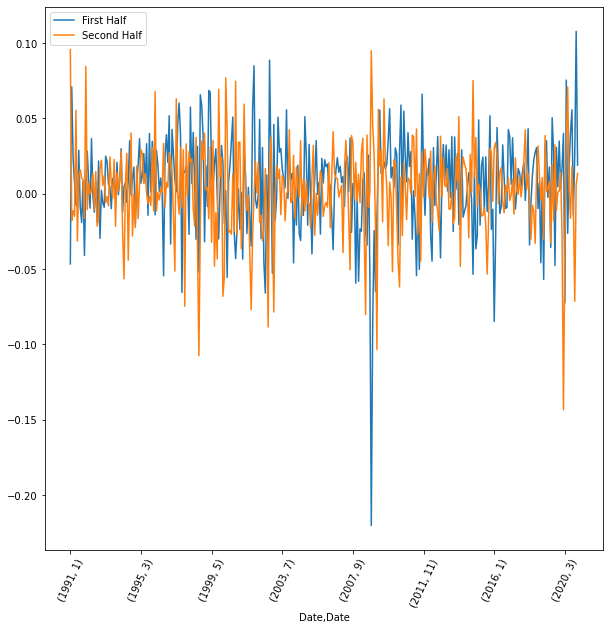

In [603]:
#timeseries of first half (BLUE) and second half (ORANGE) of returns (DJIA)
GB4 = pd.concat([GB, GB1], axis = 1)
GB4.columns = ['First Half', 'Second Half',]
GB4.plot()
plt.xticks(rotation=65)
plt.rcParams["figure.figsize"] = (2.5,2.5)

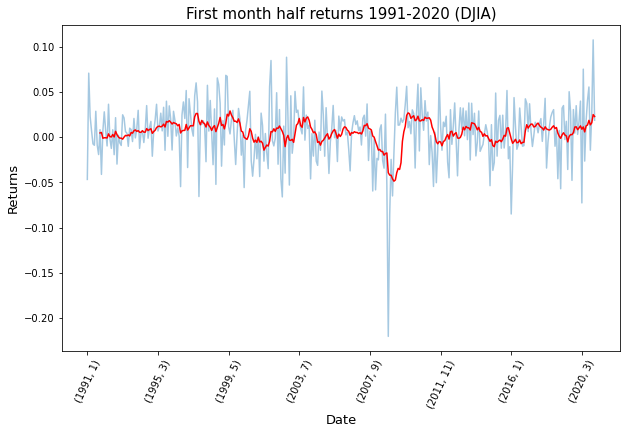

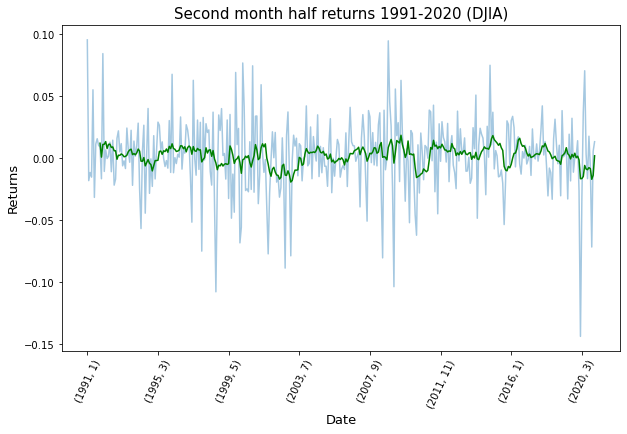

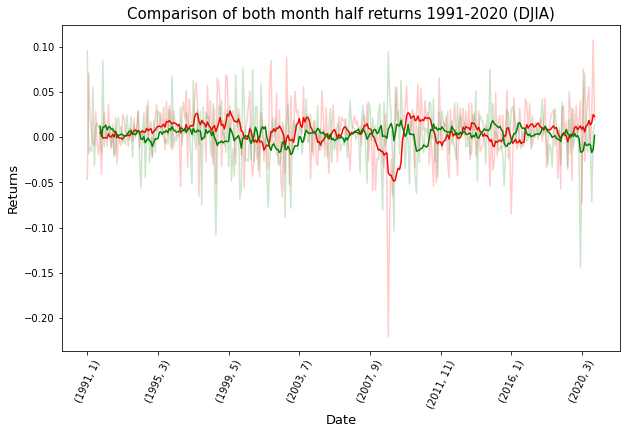

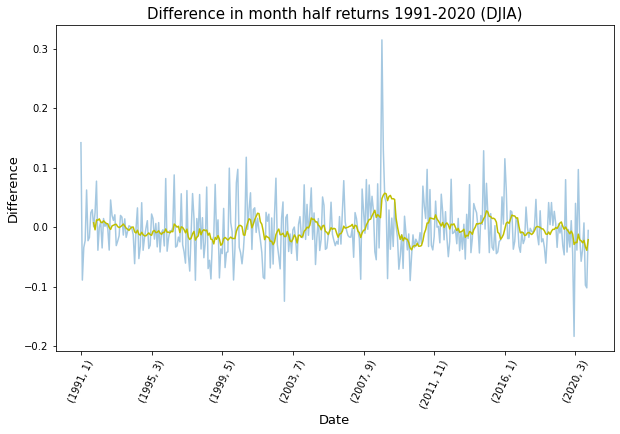

In [604]:
GB4['First Half'].plot(figsize=(10,6), alpha=0.4)
GB4['First Half'].rolling(window =10).mean().plot(alpha=1,c='r')
plt.xticks(rotation=65)
plt.title('First month half returns 1991-2020 (DJIA)', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Returns', fontsize=13)
plt.show()

GB4['Second Half'].plot(figsize=(10,6), alpha=0.4)
GB4['Second Half'].rolling(window =10).mean().plot(c='g')
plt.title('Second month half returns 1991-2020 (DJIA)', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Returns', fontsize=13)
plt.xticks(rotation=65)
plt.show()

GB4['First Half'].plot(figsize=(10,6), alpha=0.2,c='r')
GB4['First Half'].rolling(window =10).mean().plot(c='r')
GB4['Second Half'].plot(figsize=(10,6), alpha=0.2,c='g')
GB4['Second Half'].rolling(window =10).mean().plot(c='g')
plt.title('Comparison of both month half returns 1991-2020 (DJIA)', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Returns', fontsize=13)
plt.xticks(rotation=65)
plt.show()

GB3['Difference'].plot(figsize=(10,6), alpha=0.4)
GB3['Difference'].rolling(window =10).mean().plot(alpha=1,c='y')
plt.title('Difference in month half returns 1991-2020 (DJIA)', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Difference', fontsize=13)
plt.xticks(rotation=65)
plt.show()

In [605]:
GB3

First Half  Second Half  Difference
Date Date                                     
1991 1      -0.046594     0.095570    0.142163
     2       0.070936    -0.017901   -0.088837
     3       0.023021    -0.011325   -0.034346
     4       0.007207    -0.015080   -0.022287
     5      -0.007308     0.055339    0.062648
...               ...          ...         ...
2020 8       0.055631     0.017906   -0.037725
     9      -0.014267    -0.006961    0.007306
     10      0.025841    -0.071420   -0.097261
     11      0.107734     0.005850   -0.101884
     12      0.018911     0.013496   -0.005414

[360 rows x 3 columns]

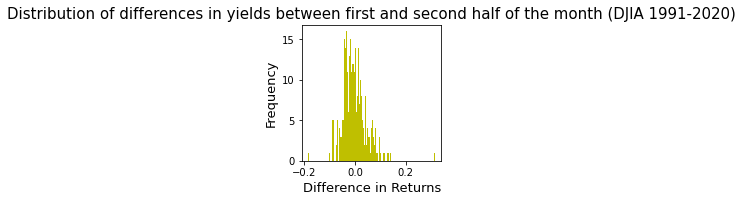

In [606]:
GB3['Difference'].plot.hist(bins = 150, color = 'y')
plt.title('Distribution of differences in yields between first and second half of the month (DJIA 1991-2020)', fontsize=15)
plt.xlabel('Difference in Returns', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [607]:
stats.ttest_1samp(a = GB3['Difference'], popmean = 0)

Ttest_1sampResult(statistic=-1.4045943590481145, pvalue=0.1610065409097294)

Teststatistik ist 1.38 und p-Wert ist 0.17, d.h. die durchschnittlichen erst und zweit Monatshaelfterenditen  1991-2020 (DJIA) unterscheiden sich nicht signifikant. 

Failed to reject null hypothesis <br />
H0 : Difference first and second month half returns of the DJIA = 0 <br />
H1 : Difference first and second month half returns of the DJIA ≠ 0 <br />

In [608]:
#TOTAL MONTH DIFF DATA (DJIA)
y1smi1 = y1[y1['Day Number'] <= 15]
y1GA = y1smi1['RDJIA'].groupby([(y1smi1['RDJIA'].index.year), (y1smi1['RDJIA'].index.month)]).sum()
y1smi2 = y1[y1['Day Number'] >= 16]
y1GA1 = y1smi2['RDJIA'].groupby([(y1smi2['RDJIA'].index.year), (y1smi2['RDJIA'].index.month)]).sum()
y1GA2 = y1GA - y1GA1
y1GA3 = pd.concat([y1GA, y1GA1, y1GA2], axis = 1)
y1GA3.columns = ['First Half', 'Second Half', 'Difference']
y1GA3['Difference'] = y1GA3['Difference']*-1
y1GA3.columns = ['First Half', 'Second Half', 'Difference']

y2smi1 = y2[y2['Day Number'] <= 15]
y2GA = y2smi1['RDJIA'].groupby([(y2smi1['RDJIA'].index.year), (y2smi1['RDJIA'].index.month)]).sum()
y2smi2 = y2[y2['Day Number'] >= 16]
y2GA1 = y2smi2['RDJIA'].groupby([(y2smi2['RDJIA'].index.year), (y2smi2['RDJIA'].index.month)]).sum()
y2GA2 = y2GA - y2GA1
y2GA3 = pd.concat([y2GA, y2GA1, y2GA2], axis = 1)
y2GA3.columns = ['First Half', 'Second Half', 'Difference']
y2GA3['Difference'] = y2GA3['Difference']*-1
y2GA3.columns = ['First Half', 'Second Half', 'Difference']

y3smi1 = y3[y3['Day Number'] <= 15]
y3GA = y3smi1['RDJIA'].groupby([(y3smi1['RDJIA'].index.year), (y3smi1['RDJIA'].index.month)]).sum()
y3smi2 = y3[y3['Day Number'] >= 16]
y3GA1 = y3smi2['RDJIA'].groupby([(y3smi2['RDJIA'].index.year), (y3smi2['RDJIA'].index.month)]).sum()
y3GA2 = y3GA - y3GA1
y3GA3 = pd.concat([y3GA, y3GA1, y3GA2], axis = 1)
y3GA3.columns = ['First Half', 'Second Half', 'Difference']
y3GA3['Difference'] = y3GA3['Difference']*-1
y3GA3.columns = ['First Half', 'Second Half', 'Difference']

In [609]:
y3GA3.describe()

,First Half,Second Half,Difference
count,120.000000,120.000000,120.000000
mean,0.005957,0.003429,-0.002528
std,0.030562,0.026993,0.043430
min,-0.084836,-0.143481,-0.183479
25%,-0.011607,-0.009524,-0.030458
50%,0.007461,0.003363,-0.007382
75%,0.027558,0.018030,0.022061
max,0.107734,0.075105,0.128622


In [610]:
print('P1-P3')
print(stats.ttest_1samp(a = GB3['First Half'], popmean = 0))
print(stats.ttest_1samp(a = GB3['Second Half'], popmean = 0))
print(stats.ttest_1samp(a = GB3['Difference'], popmean = 0))
print('P1')
print(stats.ttest_1samp(a = y1GA3['First Half'], popmean = 0))
print(stats.ttest_1samp(a = y1GA3['Second Half'], popmean = 0))
print(stats.ttest_1samp(a = y1GA3['Difference'], popmean = 0))
print('P2')
print(stats.ttest_1samp(a = y2GA3['First Half'], popmean = 0))
print(stats.ttest_1samp(a = y2GA3['Second Half'], popmean = 0))
print(stats.ttest_1samp(a = y2GA3['Difference'], popmean = 0))
print('P3')
print(stats.ttest_1samp(a = y3GA3['First Half'], popmean = 0))
print(stats.ttest_1samp(a = y3GA3['Second Half'], popmean = 0))
print(stats.ttest_1samp(a = y3GA3['Difference'], popmean = 0))

P1-P3
Ttest_1sampResult(statistic=3.4236225783577487, pvalue=0.0006892915929569336)
Ttest_1sampResult(statistic=1.4915820848488914, pvalue=0.13668690715879905)
Ttest_1sampResult(statistic=-1.4045943590481145, pvalue=0.1610065409097294)
P1
Ttest_1sampResult(statistic=3.6196418557610515, pvalue=0.00043446448957256675)
Ttest_1sampResult(statistic=1.2752705962856037, pvalue=0.20469753457090636)
Ttest_1sampResult(statistic=-1.3133472932321053, pvalue=0.19159264394705802)
P2
Ttest_1sampResult(statistic=0.7061845887402148, pvalue=0.48145365682498786)
Ttest_1sampResult(statistic=-0.03329137844095641, pvalue=0.9734980044918161)
Ttest_1sampResult(statistic=-0.5306176799461216, pvalue=0.5966725863191487)
P3
Ttest_1sampResult(statistic=2.135374079142161, pvalue=0.03478030898537992)
Ttest_1sampResult(statistic=1.3916906592687022, pvalue=0.16661199163331392)
Ttest_1sampResult(statistic=-0.6376986854404348, pvalue=0.5248949692598064)


In [611]:
y1GA3

First Half  Second Half  Difference
Date Date                                     
1991 1      -0.046594     0.095570    0.142163
     2       0.070936    -0.017901   -0.088837
     3       0.023021    -0.011325   -0.034346
     4       0.007207    -0.015080   -0.022287
     5      -0.007308     0.055339    0.062648
...               ...          ...         ...
2000 8       0.050891     0.013463   -0.037428
     9      -0.025828    -0.024997    0.000831
     10     -0.043038     0.074661    0.117699
     11     -0.023747    -0.027241   -0.003494
     12      0.003249     0.034048    0.030799

[120 rows x 3 columns]

In [612]:
#Swiss Market Index 
smi['Year'] = smi.index.year
smi['Quarter'] = smi.index.quarter
smi['Month'] = smi.index.month_name()
smi['Day'] = smi.index.day_name()
smi['Day of Week'] = smi.index.dayofweek
smi['Month Number'] = smi.index.month
smi['Day of Month'] = smi.index.day
smi = smi.drop(smi.index[0:1], axis = 0)
smi

,RSMI,Year,Quarter,Month,Day,Weekday Number,Month Number,Day Number,Day of Week,Day of Month
Dates,,,,,,,,,,
1991-01-07,-0.022891,1991,1,January,Monday,0,1,7,0,7
1991-01-08,-0.010371,1991,1,January,Tuesday,1,1,8,1,8
1991-01-09,0.017717,1991,1,January,Wednesday,2,1,9,2,9
1991-01-10,-0.013631,1991,1,January,Thursday,3,1,10,3,10
1991-01-11,-0.007961,1991,1,January,Friday,4,1,11,4,11
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,0.009495,2020,4,December,Tuesday,1,12,22,1,22
2020-12-23,0.000822,2020,4,December,Wednesday,2,12,23,2,23
2020-12-28,0.018399,2020,4,December,Monday,0,12,28,0,28


In [613]:
#Durchschnittliche Rendite in der erste Monatshälfte (gesammt)
smi1 = smi[smi['Day of Month'] <= 15]
smi1['RSMI'].describe()

count    3710.000000
mean        0.000350
std         0.011493
min        -0.096374
25%        -0.004995
50%         0.000663
75%         0.006302
max         0.113910
Name: RSMI, dtype: float64

In [614]:
#Summe der Renditen in der erste Monatshälfte
GA = smi1['RSMI'].groupby([(smi1['RSMI'].index.year), (smi1['RSMI'].index.month)]).sum()
GA.head(20)

Dates  Dates
1991   1       -0.055279
       2        0.084114
       3        0.032571
       4        0.027800
       5       -0.006830
       6       -0.017095
       7        0.035418
       8        0.006868
       9       -0.010734
       10       0.006983
       11       0.029589
       12      -0.000352
1992   1        0.060333
       2        0.015340
       3       -0.018682
       4        0.020198
       5        0.021896
       6       -0.028816
       7       -0.005276
       8       -0.003569
Name: RSMI, dtype: float64

In [615]:
#Durchschnittliche Rendite in der zweite Monatshälfte (gesammt)
smi2 = smi[smi['Day of Month'] >= 16]
smi2['RSMI'].describe()

count    3832.000000
mean        0.000325
std         0.011232
min        -0.080408
25%        -0.005337
50%         0.000645
75%         0.006071
max         0.070156
Name: RSMI, dtype: float64

In [616]:
#Summe der Renditen in der zweite Monatshälfte 
GA1 = smi2['RSMI'].groupby([(smi2['RSMI'].index.year), (smi2['RSMI'].index.month)]).sum()
GA1.head(12)

Dates  Dates
1991   1        0.103333
       2        0.013520
       3        0.012846
       4       -0.020980
       5        0.055210
       6       -0.027420
       7        0.002044
       8        0.003137
       9       -0.031372
       10       0.004839
       11      -0.065906
       12       0.030011
Name: RSMI, dtype: float64

In [617]:
#Difference in der erste und zweite Monatshälfte (gessamt, einzeln)
smi1 = smi[smi['Day of Month'] <= 15]
GA = smi1['RSMI'].groupby([(smi1['RSMI'].index.year), (smi1['RSMI'].index.month)]).sum()
smi2 = smi[smi['Day of Month'] >= 16]
GA1 = smi2['RSMI'].groupby([(smi2['RSMI'].index.year), (smi2['RSMI'].index.month)]).sum()
GA2 = GA - GA1
GA3 = pd.concat([GA, GA1, GA2], axis = 1)
GA3.columns = ['First Half', 'Second Half', 'Difference']

In [618]:
GA3 = pd.concat([GA, GA1, GA2], axis = 1)
GA3.columns = ['First Half', 'Second Half', 'Difference']
GA3.head(50)

First Half  Second Half  Difference
Dates Dates                                     
1991  1       -0.055279     0.103333   -0.158612
      2        0.084114     0.013520    0.070595
      3        0.032571     0.012846    0.019725
      4        0.027800    -0.020980    0.048780
      5       -0.006830     0.055210   -0.062040
      6       -0.017095    -0.027420    0.010325
      7        0.035418     0.002044    0.033374
      8        0.006868     0.003137    0.003732
      9       -0.010734    -0.031372    0.020638
      10       0.006983     0.004839    0.002145
      11       0.029589    -0.065906    0.095495
      12      -0.000352     0.030011   -0.030363
1992  1        0.060333    -0.010781    0.071114
      2        0.015340     0.033402   -0.018062
      3       -0.018682     0.017205   -0.035887
      4        0.020198     0.003325    0.016874
      5        0.021896    -0.000160    0.022056
      6       -0.028816    -0.005657   -0.023159
      7       -0.005276    -0.024371    0.019095
      8       -0.003569    -0.021795    0.018226
      9        0.055843     0.014150    0.041693
      10       0.001885     0.017697   -0.015811
      11       0.009636     0.001270    0.008366
      12       0.037784     0.049820   -0.012036
1993  1       -0.002337    -0.004415    0.002079
      2        0.025515    -0.020787    0.046302
      3        0.019686     0.023336   -0.003650
      4       -0.013445    -0.014377    0.000932
      5        0.025854     0.038524   -0.012670
      6        0.001680     0.044395   -0.042715
      7        0.009563     0.001300    0.008263
      8        0.025123     0.012033    0.013090
      9       -0.052496     0.046382   -0.098878
      10       0.055096     0.041750    0.013346
      11      -0.001531     0.007892   -0.009423
      12       0.040355     0.037127    0.003229
1994  1        0.011537     0.061222   -0.049685
      2       -0.060190    -0.033860   -0.026330
      3        0.007795    -0.038805    0.046600
      4        0.027809    -0.048375    0.076184
      5       -0.020099     0.016763   -0.036863
      6       -0.007378    -0.033630    0.026252
      7       -0.035761     0.025946   -0.061707
      8       -0.003134     0.029216   -0.032350
      9       -0.006157    -0.036228    0.030071
      10       0.020530    -0.030560    0.051090
      11       0.033823     0.001383    0.032440
      12       0.001409     0.011962   -0.010553
1995  1       -0.010832    -0.024318    0.013486
      2        0.038535    -0.013476    0.052011

In [619]:
GA3['Difference'] = GA3['Difference']*-1
GA3

First Half  Second Half  Difference
Dates Dates                                     
1991  1       -0.055279     0.103333    0.158612
      2        0.084114     0.013520   -0.070595
      3        0.032571     0.012846   -0.019725
      4        0.027800    -0.020980   -0.048780
      5       -0.006830     0.055210    0.062040
...                 ...          ...         ...
2020  8        0.016074    -0.002448   -0.018522
      9        0.037833    -0.031793   -0.069626
      10      -0.011388    -0.048248   -0.036860
      11       0.091298    -0.001466   -0.092764
      12      -0.012928     0.034993    0.047921

[360 rows x 3 columns]

In [620]:
GA3.describe()

,First Half,Second Half,Difference
count,360.000000,360.000000,360.000000
mean,0.003607,0.003454,-0.000153
std,0.034195,0.032552,0.051411
min,-0.153358,-0.135795,-0.168178
25%,-0.014095,-0.014316,-0.031704
50%,0.009161,0.002625,-0.007074
75%,0.026216,0.022443,0.028007
max,0.121563,0.114397,0.267755


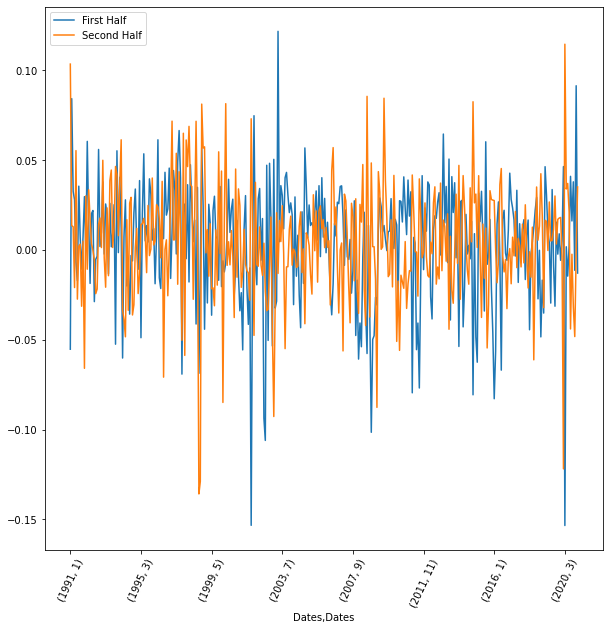

In [621]:
#timeseries of first half (BLUE) and second half (ORANGE) of returns (SMI)
GA4 = pd.concat([GA, GA1], axis = 1)
GA4.columns = ['First Half', 'Second Half',]
GA4.plot()
plt.xticks(rotation=65)
plt.rcParams["figure.figsize"] = (10,10)

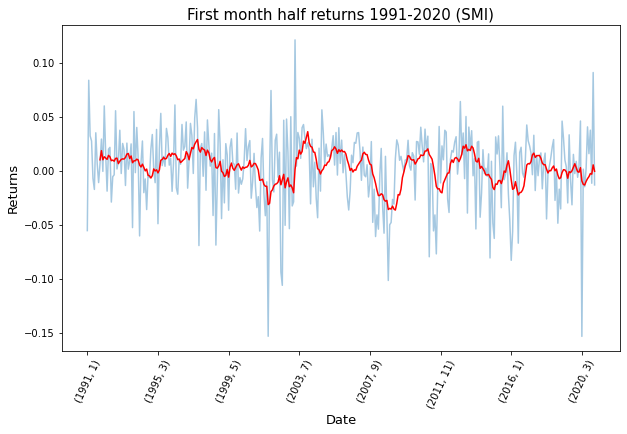

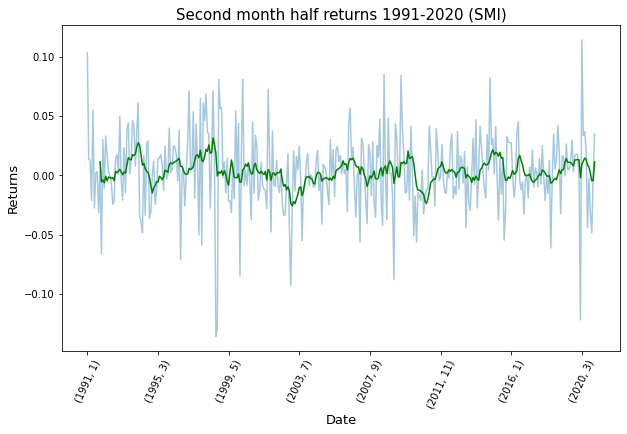

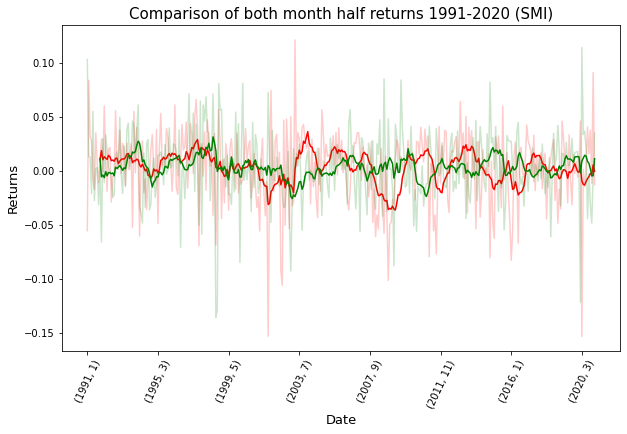

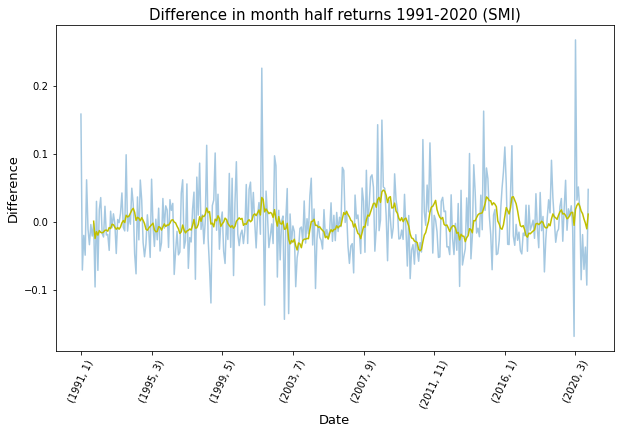

In [622]:
GA4['First Half'].plot(figsize=(10,6), alpha=0.4)
GA4['First Half'].rolling(window =10).mean().plot(alpha=1,c='r')
plt.xticks(rotation=65)
plt.title('First month half returns 1991-2020 (SMI)', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Returns', fontsize=13)
plt.show()

GA4['Second Half'].plot(figsize=(10,6), alpha=0.4)
GA4['Second Half'].rolling(window =10).mean().plot(c='g')
plt.title('Second month half returns 1991-2020 (SMI)', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Returns', fontsize=13)
plt.xticks(rotation=65)
plt.show()

GA4['First Half'].plot(figsize=(10,6), alpha=0.2,c='r')
GA4['First Half'].rolling(window =10).mean().plot(c='r')
GA4['Second Half'].plot(figsize=(10,6), alpha=0.2,c='g')
GA4['Second Half'].rolling(window =10).mean().plot(c='g')
plt.title('Comparison of both month half returns 1991-2020 (SMI)', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Returns', fontsize=13)
plt.xticks(rotation=65)
plt.show()

GA3['Difference'].plot(figsize=(10,6), alpha=0.4)
GA3['Difference'].rolling(window =10).mean().plot(alpha=1,c='y')
plt.title('Difference in month half returns 1991-2020 (SMI)', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('Difference', fontsize=13)
plt.xticks(rotation=65)
plt.show()

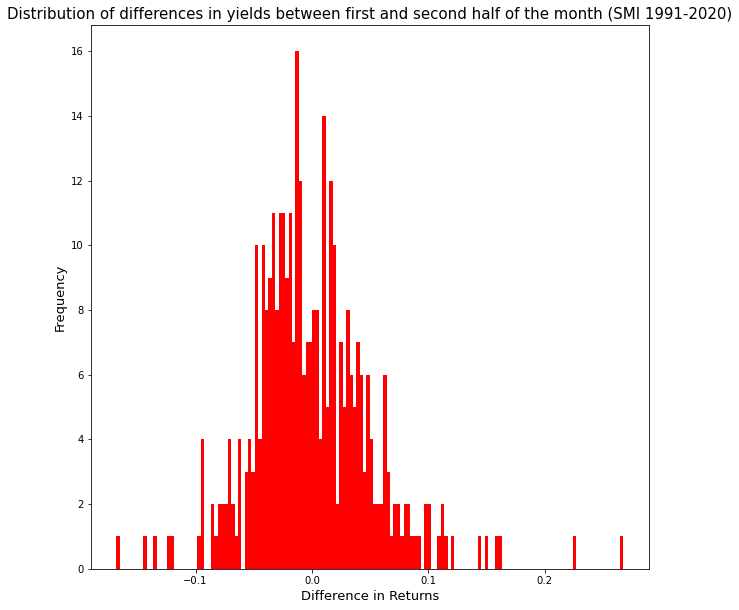

In [623]:
GA3['Difference'].plot.hist(bins = 150, color = 'r')
plt.title('Distribution of differences in yields between first and second half of the month (SMI 1991-2020)', fontsize=15)
plt.xlabel('Difference in Returns', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

In [624]:
stats.ttest_1samp(a = GA3['Difference'], popmean = 0)

Ttest_1sampResult(statistic=-0.056510186390596975, pvalue=0.9549668186805031)

Teststatistik ist -0.11 und p-Wert ist 0.90, d.h. die durchschnittlichen erst und zweit Monatshaelfterenditen  1991-2020 (SMI) unterscheiden sich nicht signifikant. 

Failed to reject null hypothesis <br />
H0 : Difference first and second month half returns of the SMI = 0 <br />
H1 : Difference first and second month half returns of the SMI ≠ 0 <br />

In [625]:
#TOTAL MONTH DIFF DATA (SMI)
x1smi1 = x1[x1['Day Number'] <= 15]
x1GA = x1smi1['RSMI'].groupby([(x1smi1['RSMI'].index.year), (x1smi1['RSMI'].index.month)]).sum()
x1smi2 = x1[x1['Day Number'] >= 16]
x1GA1 = x1smi2['RSMI'].groupby([(x1smi2['RSMI'].index.year), (x1smi2['RSMI'].index.month)]).sum()
x1GA2 = x1GA - x1GA1
x1GA3 = pd.concat([x1GA, x1GA1, x1GA2], axis = 1)
x1GA3.columns = ['First Half', 'Second Half', 'Difference']
x1GA3['Difference'] = x1GA3['Difference']*-1
x1GA3.columns = ['First Half', 'Second Half', 'Difference']

x2smi1 = x2[x2['Day Number'] <= 15]
x2GA = x2smi1['RSMI'].groupby([(x2smi1['RSMI'].index.year), (x2smi1['RSMI'].index.month)]).sum()
x2smi2 = x2[x2['Day Number'] >= 16]
x2GA1 = x2smi2['RSMI'].groupby([(x2smi2['RSMI'].index.year), (x2smi2['RSMI'].index.month)]).sum()
x2GA2 = x2GA - x2GA1
x2GA3 = pd.concat([x2GA, x2GA1, x2GA2], axis = 1)
x2GA3.columns = ['First Half', 'Second Half', 'Difference']
x2GA3['Difference'] = x2GA3['Difference']*-1
x2GA3.columns = ['First Half', 'Second Half', 'Difference']

x3smi1 = x3[x3['Day Number'] <= 15]
x3GA = x3smi1['RSMI'].groupby([(x3smi1['RSMI'].index.year), (x3smi1['RSMI'].index.month)]).sum()
x3smi2 = x3[x3['Day Number'] >= 16]
x3GA1 = x3smi2['RSMI'].groupby([(x3smi2['RSMI'].index.year), (x3smi2['RSMI'].index.month)]).sum()
x3GA2 = x3GA - x3GA1
x3GA3 = pd.concat([x3GA, x3GA1, x3GA2], axis = 1)
x3GA3.columns = ['First Half', 'Second Half', 'Difference']
x3GA3['Difference'] = x3GA3['Difference']*-1
x3GA3.columns = ['First Half', 'Second Half', 'Difference']

In [626]:
print('P1-P3')
print(stats.ttest_1samp(a = GA3['First Half'], popmean = 0))
print(stats.ttest_1samp(a = GA3['Second Half'], popmean = 0))
print(stats.ttest_1samp(a = GA3['Difference'], popmean = 0))
print('P1')
print(stats.ttest_1samp(a = x1GA3['First Half'], popmean = 0))
print(stats.ttest_1samp(a = x1GA3['Second Half'], popmean = 0))
print(stats.ttest_1samp(a = x1GA3['Difference'], popmean = 0))
print('P2')
print(stats.ttest_1samp(a = x2GA3['First Half'], popmean = 0))
print(stats.ttest_1samp(a = x2GA3['Second Half'], popmean = 0))
print(stats.ttest_1samp(a = x2GA3['Difference'], popmean = 0))
print('P3')
print(stats.ttest_1samp(a = x3GA3['First Half'], popmean = 0))
print(stats.ttest_1samp(a = x3GA3['Second Half'], popmean = 0))
print(stats.ttest_1samp(a = x3GA3['Difference'], popmean = 0))

P1-P3
Ttest_1sampResult(statistic=2.0015396733711683, pvalue=0.046086406289908)
Ttest_1sampResult(statistic=2.0133111802698065, pvalue=0.04482783598572376)
Ttest_1sampResult(statistic=-0.056510186390596975, pvalue=0.9549668186805031)
P1
Ttest_1sampResult(statistic=3.4042404256848866, pvalue=0.0009048943177140788)
Ttest_1sampResult(statistic=1.999506398907808, pvalue=0.047831666196506264)
Ttest_1sampResult(statistic=-0.4854203767804701, pvalue=0.6282706888450049)
P2
Ttest_1sampResult(statistic=0.2873630078596354, pvalue=0.7743341879909017)
Ttest_1sampResult(statistic=-0.41120461435537436, pvalue=0.6816620978347017)
Ttest_1sampResult(statistic=-0.436460828349933, pvalue=0.663293277972333)
P3
Ttest_1sampResult(statistic=0.25095714526985974, pvalue=0.8022800537365606)
Ttest_1sampResult(statistic=1.729053605488543, pvalue=0.08639280104026063)
Ttest_1sampResult(statistic=0.7339239517414033, pvalue=0.46443865496039705)


# Holiday Effect

### DJIA - Post Holiday Return

In [627]:
#READING IN DJIA HOLIDAY DATA FROM EXCEL (TAKEN FROM BLOOMBERG)
djiahol = pd.read_excel('DJIA Holidays.xlsx')
djiahol['Dates'] = djiahol['Date']
djiahol.set_index('Date', inplace = True)
djiahol['Day of Week'] = djiahol.index.dayofweek

#MAKING COLUMNS LOOK PRESENTABLE & LOADING IN DAY OF WEEK NUMBER
djiahol1 = djiahol[['Dates','Day of Week']]
djiahol1.set_index('Dates', inplace = True)

#FILLING DAY OFFSET INFORMATION BASED ON WEEK NUMBER (0+1, 1+1, 2+1, 3+1, 4+3, 5+2, 6+1)
djiahol1 = djiahol[['Dates','Day of Week']]
djiahol1.loc[djiahol1['Day of Week'] == 4, 'Friday Replacement'] = pd.to_datetime(djiahol1['Dates']).apply(pd.DateOffset(3))
djiahol1.loc[djiahol1['Day of Week'] == 5, 'Saturday Replacement'] = pd.to_datetime(djiahol1['Dates']).apply(pd.DateOffset(2))
djiahol1.loc[djiahol1['Day of Week'] == 6, 'Sunday Replacement'] = pd.to_datetime(djiahol1['Dates']).apply(pd.DateOffset(1))
djiahol1.loc[djiahol1['Day of Week'] == 0, 'Monday Replacement'] = pd.to_datetime(djiahol1['Dates']).apply(pd.DateOffset(1))
djiahol1.loc[djiahol1['Day of Week'] == 1, 'Tuesday Replacement'] = pd.to_datetime(djiahol1['Dates']).apply(pd.DateOffset(1))
djiahol1.loc[djiahol1['Day of Week'] == 2, 'Wednesday Replacement'] = pd.to_datetime(djiahol1['Dates']).apply(pd.DateOffset(1))
djiahol1.loc[djiahol1['Day of Week'] == 3, 'Thursday Replacement'] = pd.to_datetime(djiahol1['Dates']).apply(pd.DateOffset(1))

#FILLING FRIDAY REPLACEMENT COLUMN WITH ALL DELAYED VALUES
djiahol1['Friday Replacement'].fillna(djiahol1['Saturday Replacement'], inplace = True)
djiahol1['Friday Replacement'].fillna(djiahol1['Sunday Replacement'], inplace = True)
djiahol1['Friday Replacement'].fillna(djiahol1['Monday Replacement'], inplace = True)
djiahol1['Friday Replacement'].fillna(djiahol1['Tuesday Replacement'], inplace = True)
djiahol1['Friday Replacement'].fillna(djiahol1['Wednesday Replacement'], inplace = True)
djiahol1['Friday Replacement'].fillna(djiahol1['Thursday Replacement'],inplace = True)

#DROPPING UNNECESSARY COLUMNS
djiaholpost = djiahol1
djiaholpost.drop('Day of Week', 1, inplace = True)
djiaholpost.drop('Saturday Replacement', 1, inplace = True)
djiaholpost.drop('Sunday Replacement', 1, inplace = True)
djiaholpost.drop('Monday Replacement', 1, inplace = True)
djiaholpost.drop('Tuesday Replacement', 1, inplace = True)
djiaholpost.drop('Wednesday Replacement', 1, inplace = True)
djiaholpost.drop('Thursday Replacement', 1, inplace = True)

#CREATING EQUAL INDEX AND Col_1 with necessary dates for pd.merge to work
djiaholpost['Dates'] = djiaholpost['Friday Replacement']
djiaholpost.set_index('Friday Replacement', inplace = True)

#(END DATA)Merging post holiday returns with DJIA returns for P1-3
dhp123 = pd.merge(djia, djiaholpost, left_index=True, right_index=True)
dhp123.drop('Dates', 1, inplace = True)
dhp123.drop('Weekday', 1, inplace = True)
dhp123['Positive Negative'] = np.where(dhp123['RDJIA'] > 0, 1, 0)

#(END DATA)Merging post holiday returns with DJIA returns for P1
dhp1 = pd.merge(y1, djiaholpost, left_index=True, right_index=True)
dhp1.drop('Year', 1, inplace = True)
dhp1.drop('Quarter', 1, inplace = True)
dhp1.drop('Month', 1, inplace = True)
dhp1.drop('Day', 1, inplace = True)
dhp1.drop('Weekday Number', 1, inplace = True)
dhp1.drop('Month Number', 1, inplace = True)
dhp1.drop('Day Number', 1, inplace = True)
dhp1['Positive Negative'] = np.where(dhp1['RDJIA'] > 0, 1, 0)

#(END DATA)Merging post holiday returns with DJIA returns for P2
dhp2 = pd.merge(y2, djiaholpost, left_index=True, right_index=True)
dhp2.drop('Year', 1, inplace = True)
dhp2.drop('Quarter', 1, inplace = True)
dhp2.drop('Month', 1, inplace = True)
dhp2.drop('Day', 1, inplace = True)
dhp2.drop('Weekday Number', 1, inplace = True)
dhp2.drop('Month Number', 1, inplace = True)
dhp2.drop('Day Number', 1, inplace = True)
dhp2['Positive Negative'] = np.where(dhp2['RDJIA'] > 0, 1, 0)

#(END DATA)Merging post holiday returns with DJIA returns for P3
dhp3 = pd.merge(y3, djiaholpost, left_index=True, right_index=True)
dhp3.drop('Year', 1, inplace = True)
dhp3.drop('Quarter', 1, inplace = True)
dhp3.drop('Month', 1, inplace = True)
dhp3.drop('Day', 1, inplace = True)
dhp3.drop('Weekday Number', 1, inplace = True)
dhp3.drop('Month Number', 1, inplace = True)
dhp3.drop('Day Number', 1, inplace = True)
dhp3['Positive Negative'] = np.where(dhp3['RDJIA'] > 0, 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4138: FutureWarning: DateOffset.__call__ is deprecated and will be removed in a future version.  Use `offset + other` instead.
  mapped = lib.map_infer(values, f, convert=convert_dtype)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

### DJIA - Pre Holiday Return

In [628]:
#READING IN DJIA HOLIDAY DATA FROM EXCEL (TAKEN FROM BLOOMBERG)
djiahol = pd.read_excel('DJIA Holidays.xlsx')
djiahol['Dates'] = djiahol['Date']
djiahol.set_index('Date', inplace = True)
djiahol['Day of Week'] = djiahol.index.dayofweek

#MAKING COLUMNS LOOK PRESENTABLE & LOADING IN DAY OF WEEK NUMBER
djiahol2 = djiahol[['Dates','Day of Week']]
djiahol2.set_index('Dates', inplace = True)

#FILLING DAY OFFSET INFORMATION BASED ON WEEK NUMBER (0+1, 1+1, 2+1, 3+1, 4+3, 5+2, 6+1)
djiahol2 = djiahol[['Dates','Day of Week']]
djiahol2.loc[djiahol2['Day of Week'] == 4, 'Friday Replacement'] = pd.to_datetime(djiahol2['Dates']).apply(pd.DateOffset(-1))
djiahol2.loc[djiahol2['Day of Week'] == 5, 'Saturday Replacement'] = pd.to_datetime(djiahol2['Dates']).apply(pd.DateOffset(-1))
djiahol2.loc[djiahol2['Day of Week'] == 6, 'Sunday Replacement'] = pd.to_datetime(djiahol2['Dates']).apply(pd.DateOffset(-2))
djiahol2.loc[djiahol2['Day of Week'] == 0, 'Monday Replacement'] = pd.to_datetime(djiahol2['Dates']).apply(pd.DateOffset(-3))
djiahol2.loc[djiahol2['Day of Week'] == 1, 'Tuesday Replacement'] = pd.to_datetime(djiahol2['Dates']).apply(pd.DateOffset(-1))
djiahol2.loc[djiahol2['Day of Week'] == 2, 'Wednesday Replacement'] = pd.to_datetime(djiahol2['Dates']).apply(pd.DateOffset(-1))
djiahol2.loc[djiahol2['Day of Week'] == 3, 'Thursday Replacement'] = pd.to_datetime(djiahol2['Dates']).apply(pd.DateOffset(-1))

#FILLING FRIDAY REPLACEMENT COLUMN WITH ALL DELAYED VALUES
djiahol2['Friday Replacement'].fillna(djiahol2['Saturday Replacement'], inplace = True)
djiahol2['Friday Replacement'].fillna(djiahol2['Sunday Replacement'], inplace = True)
djiahol2['Friday Replacement'].fillna(djiahol2['Monday Replacement'], inplace = True)
djiahol2['Friday Replacement'].fillna(djiahol2['Tuesday Replacement'], inplace = True)
djiahol2['Friday Replacement'].fillna(djiahol2['Wednesday Replacement'], inplace = True)
djiahol2['Friday Replacement'].fillna(djiahol2['Thursday Replacement'],inplace = True)

#DROPPING UNNECESSARY COLUMNS
djiaholpre = djiahol2
djiaholpre.drop('Day of Week', 1, inplace = True)
djiaholpre.drop('Saturday Replacement', 1, inplace = True)
djiaholpre.drop('Sunday Replacement', 1, inplace = True)
djiaholpre.drop('Monday Replacement', 1, inplace = True)
djiaholpre.drop('Tuesday Replacement', 1, inplace = True)
djiaholpre.drop('Wednesday Replacement', 1, inplace = True)
djiaholpre.drop('Thursday Replacement', 1, inplace = True)

#CREATING EQUAL INDEX AND Col_1 with necessary dates for pd.merge to work
djiaholpre['Dates'] = djiaholpre['Friday Replacement']
djiaholpre.set_index('Friday Replacement', inplace = True)

#(END DATA)Merging pre holiday returns with DJIA returns for P1-3
dhb123 = pd.merge(djia, djiaholpre, left_index=True, right_index=True)
dhb123.drop('Dates', 1, inplace = True)
dhb123.drop('Weekday', 1, inplace = True)
dhb123['Positive Negative'] = np.where(dhb123['RDJIA'] > 0, 1, 0)

#(END DATA)Merging pre holiday returns with DJIA returns for P1
dhb1 = pd.merge(y1, djiaholpre, left_index=True, right_index=True)
dhb1.drop('Year', 1, inplace = True)
dhb1.drop('Quarter', 1, inplace = True)
dhb1.drop('Month', 1, inplace = True)
dhb1.drop('Day', 1, inplace = True)
dhb1.drop('Weekday Number', 1, inplace = True)
dhb1.drop('Month Number', 1, inplace = True)
dhb1.drop('Day Number', 1, inplace = True)
dhb1['Positive Negative'] = np.where(dhb1['RDJIA'] > 0, 1, 0)

#(END DATA)Merging pre holiday returns with DJIA returns for P2
dhb2 = pd.merge(y2, djiaholpre, left_index=True, right_index=True)
dhb2.drop('Year', 1, inplace = True)
dhb2.drop('Quarter', 1, inplace = True)
dhb2.drop('Month', 1, inplace = True)
dhb2.drop('Day', 1, inplace = True)
dhb2.drop('Weekday Number', 1, inplace = True)
dhb2.drop('Month Number', 1, inplace = True)
dhb2.drop('Day Number', 1, inplace = True)
dhb2['Positive Negative'] = np.where(dhb2['RDJIA'] > 0, 1, 0)

#(END DATA)Merging pre holiday returns with DJIA returns for P3
dhb3 = pd.merge(y3, djiaholpre, left_index=True, right_index=True)
dhb3.drop('Year', 1, inplace = True)
dhb3.drop('Quarter', 1, inplace = True)
dhb3.drop('Month', 1, inplace = True)
dhb3.drop('Day', 1, inplace = True)
dhb3.drop('Weekday Number', 1, inplace = True)
dhb3.drop('Month Number', 1, inplace = True)
dhb3.drop('Day Number', 1, inplace = True)
dhb3['Positive Negative'] = np.where(dhb3['RDJIA'] > 0, 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4138: FutureWarning: DateOffset.__call__ is deprecated and will be removed in a future version.  Use `offset + other` instead.
  mapped = lib.map_infer(values, f, convert=convert_dtype)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [629]:
print('----------------------------------------------------------------------------------------')
print('DJIA Mean of Pre & Post Returns')
print("\n")
print('POST Mean DJIA Period 1-3: ', dhp123['RDJIA'].mean())
print('POST Mean DJIA Period 1: ', dhp1['RDJIA'].mean())
print('POST Mean DJIA Period 2: ', dhp2['RDJIA'].mean())
print('POST Mean DJIA Period 3: ', dhp3['RDJIA'].mean())
print("\n")
print('PRE Mean DJIA Period 1-3: ', dhb123['RDJIA'].mean())
print('PRE Mean DJIA Period 1: ', dhb1['RDJIA'].mean())
print('PRE Mean DJIA Period 2: ', dhb2['RDJIA'].mean())
print('PRE Mean DJIA Period 3: ', dhb3['RDJIA'].mean())
print('----------------------------------------------------------------------------------------')
print('DJIA Standard Deviation of Pre & Post Returns')
print("\n")
print('POST Standard Deviation DJIA Period 1-3: ', dhp123['RDJIA'].std())
print('POST Standard Deviation DJIA Period 1: ', dhp1['RDJIA'].std())
print('POST Standard Deviation DJIA Period 2: ', dhp2['RDJIA'].std())
print('POST Standard Deviation DJIA Period 3: ', dhp3['RDJIA'].std())
print("\n")
print('PRE Standard Deviation DJIA Period 1-3: ', dhb123['RDJIA'].median())
print('PRE Standard Deviation DJIA Period 1: ', dhb1['RDJIA'].median())
print('PRE Standard Deviation DJIA Period 2: ', dhb2['RDJIA'].median())
print('PRE Standard Deviation DJIA Period 3: ', dhb3['RDJIA'].median())
print('----------------------------------------------------------------------------------------')
print('DJIA Median of Pre & Post Returns')
print("\n")
print('POST Median DJIA Period 1-3: ', dhp123['RDJIA'].median())
print('POST Median DJIA Period 1: ', dhp1['RDJIA'].median())
print('POST Median DJIA Period 2: ', dhp2['RDJIA'].median())
print('POST Median DJIA Period 3: ', dhp3['RDJIA'].median())
print("\n")
print('PRE Median DJIA Period 1-3: ', dhb123['RDJIA'].median())
print('PRE Median DJIA Period 1: ', dhb1['RDJIA'].median())
print('PRE Median DJIA Period 2: ', dhb2['RDJIA'].median())
print('PRE Median DJIA Period 3: ', dhb3['RDJIA'].median())
print('----------------------------------------------------------------------------------------')

print('----------------------------------------------------------------------------------------')
print('DJIA Signficance of Pre & Post Returns')
print("\n")
print('P1-P3')
print('Post', stats.ttest_1samp(a = dhp123['RDJIA'], popmean = 0))
print('Pre', stats.ttest_1samp(a = dhb123['RDJIA'], popmean = 0))
print("\n")
print('P1')
print('Post',stats.ttest_1samp(a = dhp1['RDJIA'], popmean = 0))
print('Pre',stats.ttest_1samp(a = dhb1['RDJIA'], popmean = 0))
print("\n")
print('P2')
print('Post',stats.ttest_1samp(a = dhp2['RDJIA'], popmean = 0))
print('Pre',stats.ttest_1samp(a = dhb2['RDJIA'], popmean = 0))
print("\n")
print('P3')
print('Post',stats.ttest_1samp(a = dhp3['RDJIA'], popmean = 0))
print('Pre',stats.ttest_1samp(a = dhb3['RDJIA'], popmean = 0))
print('----------------------------------------------------------------------------------------')
print('DJIA % Positive of Pre & Post Returns')
print("\n")
print('P1-P3')
print(dhp123['Positive Negative'].value_counts())
print('POST Count DJIA Period 1-3: ', dhp123['RDJIA'].count())
rank, pVal = wilcoxon(dhp123['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P1')
print(dhp1['Positive Negative'].value_counts())
print('POST Count DJIA Period 1: ', dhp1['RDJIA'].count())
rank, pVal = wilcoxon(dhp1['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P2')
print(dhp2['Positive Negative'].value_counts())
print('POST Count DJIA Period 2: ', dhp2['RDJIA'].count())
rank, pVal = wilcoxon(dhp2['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P3')
print(dhp3['Positive Negative'].value_counts())
print('POST Count DJIA Period 3: ', dhp3['RDJIA'].count())
rank, pVal = wilcoxon(dhp3['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print("\n")
print(dhb123['Positive Negative'].value_counts())
print('PRE Count DJIA Period 1-3: ', dhb123['RDJIA'].count())
rank, pVal = wilcoxon(dhb123['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print(dhb1['Positive Negative'].value_counts())
print('PRE Count DJIA Period 1: ', dhb1['RDJIA'].count())
rank, pVal = wilcoxon(dhb1['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print(dhb2['Positive Negative'].value_counts())
print('PRE Count DJIA Period 2: ', dhb2['RDJIA'].count())
rank, pVal = wilcoxon(dhb2['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print(dhb3['Positive Negative'].value_counts())
print('PRE Count DJIA Period 3: ', dhb3['RDJIA'].count())
rank, pVal = wilcoxon(dhb3['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")

----------------------------------------------------------------------------------------
DJIA Mean of Pre & Post Returns


POST Mean DJIA Period 1-3:  0.000533931359052321
POST Mean DJIA Period 1:  0.0010936649282047278
POST Mean DJIA Period 2:  0.00038332282060353316
POST Mean DJIA Period 3:  0.0001321461662263993


PRE Mean DJIA Period 1-3:  0.0008324624283903799
PRE Mean DJIA Period 1:  0.0007349957710060688
PRE Mean DJIA Period 2:  0.0007009195018670921
PRE Mean DJIA Period 3:  0.0010585406842563456
----------------------------------------------------------------------------------------
DJIA Standard Deviation of Pre & Post Returns


POST Standard Deviation DJIA Period 1-3:  0.01232239546142365
POST Standard Deviation DJIA Period 1:  0.012278466709450321
POST Standard Deviation DJIA Period 2:  0.013203270191663626
POST Standard Deviation DJIA Period 3:  0.011507140215145886


PRE Standard Deviation DJIA Period 1-3:  0.0007543540035326313
PRE Standard Deviation DJIA Period 1:  0.000

In [630]:
djia['Positive Negative'] = np.where(djia['RDJIA'] > 0, 1, 0)
y1['Positive Negative'] = np.where(y1['RDJIA'] > 0, 1, 0)
y2['Positive Negative'] = np.where(y2['RDJIA'] > 0, 1, 0)
y3['Positive Negative'] = np.where(y3['RDJIA'] > 0, 1, 0)
print('----------------------------------------------------------------------------------------')
print('DJIA Mean')
print("\n")
print('Mean DJIA Period 1-3: ', djia['RDJIA'].mean())
print('Mean DJIA Period 1: ', y1['RDJIA'].mean())
print('Mean DJIA Period 2: ', y2['RDJIA'].mean())
print('Mean DJIA Period 3: ', y3['RDJIA'].mean())
print('----------------------------------------------------------------------------------------')
print('DJIA Standard Deviation')
print("\n")
print('Standard Deviation DJIA Period 1-3: ', djia['RDJIA'].std())
print('Standard Deviation DJIA Period 1: ', y1['RDJIA'].std())
print('Standard Deviation DJIA Period 2: ', y2['RDJIA'].std())
print('Standard Deviation DJIA Period 3: ', y3['RDJIA'].std())
print('----------------------------------------------------------------------------------------')
print('DJIA Median of Returns')
print("\n")
print('Median DJIA Period 1-3: ', djia['RDJIA'].median())
print('Median DJIA Period 1: ', y1['RDJIA'].median())
print('Median DJIA Period 2: ', y2['RDJIA'].median())
print('Median DJIA Period 3: ', y3['RDJIA'].median())
print('----------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------')
print('DJIA % Positive')
print("\n")
print('P1-P3')
print(djia['Positive Negative'].value_counts())
print('Count DJIA Period 1-3: ', djia['RDJIA'].count())
rank, pVal = wilcoxon(djia['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P1')
print(y1['Positive Negative'].value_counts())
print('Count DJIA Period 1: ', y1['RDJIA'].count())
rank, pVal = wilcoxon(y1['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P2')
print(y2['Positive Negative'].value_counts())
print('Count DJIA Period 2: ', y2['RDJIA'].count())
rank, pVal = wilcoxon(y2['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P3')
print(y3['Positive Negative'].value_counts())
print('Count DJIA Period 3: ', y3['RDJIA'].count())
rank, pVal = wilcoxon(y3['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")

----------------------------------------------------------------------------------------
DJIA Mean


Mean DJIA Period 1-3:  0.00038812536795103766
Mean DJIA Period 1:  0.0006048370666718226
Mean DJIA Period 2:  0.00011133295631106896
Mean DJIA Period 3:  0.0004471643375047566
----------------------------------------------------------------------------------------
DJIA Standard Deviation


Standard Deviation DJIA Period 1-3:  0.011167979311903482
Standard Deviation DJIA Period 1:  0.009270414429791263
Standard Deviation DJIA Period 2:  0.012910611662809613
Standard Deviation DJIA Period 3:  0.011031465190616659
----------------------------------------------------------------------------------------
DJIA Median of Returns


Median DJIA Period 1-3:  0.0005367843001680139
Median DJIA Period 1:  0.0005843519332583424
Median DJIA Period 2:  0.00041777136232390433
Median DJIA Period 3:  0.0006518328656339722
-------------------------------------------------------------------------------------

<ipython-input-630-72d27bffe6ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y1['Positive Negative'] = np.where(y1['RDJIA'] > 0, 1, 0)
<ipython-input-630-72d27bffe6ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y3['Positive Negative'] = np.where(y3['RDJIA'] > 0, 1, 0)


### SMI - Post Holiday Return

In [631]:
#READING IN SMI HOLIDAY DATA FROM EXCEL (TAKEN FROM BLOOMBERG)
smihol = pd.read_excel('SMI Holidays.xlsx')
smihol['Dates'] = smihol['Date']
smihol.set_index('Date', inplace = True)
smihol['Day of Week'] = smihol.index.dayofweek

#MAKING COLUMNS LOOK PRESENTABLE & LOADING IN DAY OF WEEK NUMBER
smihol1 = smihol[['Dates','Day of Week']]
smihol1.set_index('Dates', inplace = True)

#FILLING DAY OFFSET INFORMATION BASED ON WEEK NUMBER (0+1, 1+1, 2+1, 3+1, 4+3, 5+2, 6+1)
smihol1 = smihol[['Dates','Day of Week']]
smihol1.loc[smihol1['Day of Week'] == 4, 'Friday Replacement'] = pd.to_datetime(smihol1['Dates']).apply(pd.DateOffset(3))
smihol1.loc[smihol1['Day of Week'] == 5, 'Saturday Replacement'] = pd.to_datetime(smihol1['Dates']).apply(pd.DateOffset(2))
smihol1.loc[smihol1['Day of Week'] == 6, 'Sunday Replacement'] = pd.to_datetime(smihol1['Dates']).apply(pd.DateOffset(1))
smihol1.loc[smihol1['Day of Week'] == 0, 'Monday Replacement'] = pd.to_datetime(smihol1['Dates']).apply(pd.DateOffset(1))
smihol1.loc[smihol1['Day of Week'] == 1, 'Tuesday Replacement'] = pd.to_datetime(smihol1['Dates']).apply(pd.DateOffset(1))
smihol1.loc[smihol1['Day of Week'] == 2, 'Wednesday Replacement'] = pd.to_datetime(smihol1['Dates']).apply(pd.DateOffset(1))
smihol1.loc[smihol1['Day of Week'] == 3, 'Thursday Replacement'] = pd.to_datetime(smihol1['Dates']).apply(pd.DateOffset(1))

#FILLING FRIDAY REPLACEMENT COLUMN WITH ALL DELAYED VALUES
smihol1['Friday Replacement'].fillna(smihol1['Saturday Replacement'], inplace = True)
smihol1['Friday Replacement'].fillna(smihol1['Sunday Replacement'], inplace = True)
smihol1['Friday Replacement'].fillna(smihol1['Monday Replacement'], inplace = True)
smihol1['Friday Replacement'].fillna(smihol1['Tuesday Replacement'], inplace = True)
smihol1['Friday Replacement'].fillna(smihol1['Wednesday Replacement'], inplace = True)
smihol1['Friday Replacement'].fillna(smihol1['Thursday Replacement'],inplace = True)

#DROPPING UNNECESSARY COLUMNS
smiholpost = smihol1
smiholpost.drop('Day of Week', 1, inplace = True)
smiholpost.drop('Saturday Replacement', 1, inplace = True)
smiholpost.drop('Sunday Replacement', 1, inplace = True)
smiholpost.drop('Monday Replacement', 1, inplace = True)
smiholpost.drop('Tuesday Replacement', 1, inplace = True)
smiholpost.drop('Wednesday Replacement', 1, inplace = True)
smiholpost.drop('Thursday Replacement', 1, inplace = True)

#CREATING EQUAL INDEX AND Col_1 with necessary dates for pd.merge to work
smiholpost['Dates'] = smiholpost['Friday Replacement']
smiholpost.set_index('Friday Replacement', inplace = True)

#(END DATA)Merging post holiday returns with SMI returns for P1-3
shp123 = pd.merge(smi, smiholpost, left_index=True, right_index=True)
shp123.drop('Dates', 1, inplace = True)
shp123['Positive Negative'] = np.where(shp123['RSMI'] > 0, 1, 0)

#(END DATA)Merging post holiday returns with SMI returns for P1
shp1 = pd.merge(x1, smiholpost, left_index=True, right_index=True)
shp1.drop('Year', 1, inplace = True)
shp1.drop('Quarter', 1, inplace = True)
shp1.drop('Month', 1, inplace = True)
shp1.drop('Day', 1, inplace = True)
shp1.drop('Weekday Number', 1, inplace = True)
shp1.drop('Month Number', 1, inplace = True)
shp1.drop('Day Number', 1, inplace = True)
shp1['Positive Negative'] = np.where(shp1['RSMI'] > 0, 1, 0)

#(END DATA)Merging post holiday returns with SMI returns for P2
shp2 = pd.merge(x2, smiholpost, left_index=True, right_index=True)
shp2.drop('Year', 1, inplace = True)
shp2.drop('Quarter', 1, inplace = True)
shp2.drop('Month', 1, inplace = True)
shp2.drop('Day', 1, inplace = True)
shp2.drop('Weekday Number', 1, inplace = True)
shp2.drop('Month Number', 1, inplace = True)
shp2.drop('Day Number', 1, inplace = True)
shp2['Positive Negative'] = np.where(shp2['RSMI'] > 0, 1, 0)

#(END DATA)Merging post holiday returns with SMI returns for P3
shp3 = pd.merge(x3, smiholpost, left_index=True, right_index=True)
shp3.drop('Year', 1, inplace = True)
shp3.drop('Quarter', 1, inplace = True)
shp3.drop('Month', 1, inplace = True)
shp3.drop('Day', 1, inplace = True)
shp3.drop('Weekday Number', 1, inplace = True)
shp3.drop('Month Number', 1, inplace = True)
shp3.drop('Day Number', 1, inplace = True)
shp3['Positive Negative'] = np.where(shp3['RSMI'] > 0, 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4138: FutureWarning: DateOffset.__call__ is deprecated and will be removed in a future version.  Use `offset + other` instead.
  mapped = lib.map_infer(values, f, convert=convert_dtype)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

### SMI - Pre Holiday Return

In [632]:
#READING IN SMI HOLIDAY DATA FROM EXCEL (TAKEN FROM BLOOMBERG)
smihol = pd.read_excel('SMI Holidays.xlsx')
smihol['Dates'] = smihol['Date']
smihol.set_index('Date', inplace = True)
smihol['Day of Week'] = smihol.index.dayofweek

#MAKING COLUMNS LOOK PRESENTABLE & LOADING IN DAY OF WEEK NUMBER
smihol2 = smihol[['Dates','Day of Week']]
smihol2.set_index('Dates', inplace = True)

#FILLING DAY OFFSET INFORMATION BASED ON WEEK NUMBER (0+1, 1+1, 2+1, 3+1, 4+3, 5+2, 6+1)
smihol2 = smihol[['Dates','Day of Week']]
smihol2.loc[smihol2['Day of Week'] == 4, 'Friday Replacement'] = pd.to_datetime(smihol2['Dates']).apply(pd.DateOffset(-1))
smihol2.loc[smihol2['Day of Week'] == 5, 'Saturday Replacement'] = pd.to_datetime(smihol2['Dates']).apply(pd.DateOffset(-1))
smihol2.loc[smihol2['Day of Week'] == 6, 'Sunday Replacement'] = pd.to_datetime(smihol2['Dates']).apply(pd.DateOffset(-2))
smihol2.loc[smihol2['Day of Week'] == 0, 'Monday Replacement'] = pd.to_datetime(smihol2['Dates']).apply(pd.DateOffset(-3))
smihol2.loc[smihol2['Day of Week'] == 1, 'Tuesday Replacement'] = pd.to_datetime(smihol2['Dates']).apply(pd.DateOffset(-1))
smihol2.loc[smihol2['Day of Week'] == 2, 'Wednesday Replacement'] = pd.to_datetime(smihol2['Dates']).apply(pd.DateOffset(-1))
smihol2.loc[smihol2['Day of Week'] == 3, 'Thursday Replacement'] = pd.to_datetime(smihol2['Dates']).apply(pd.DateOffset(-1))

#FILLING FRIDAY REPLACEMENT COLUMN WITH ALL DELAYED VALUES
smihol2['Friday Replacement'].fillna(smihol2['Saturday Replacement'], inplace = True)
smihol2['Friday Replacement'].fillna(smihol2['Sunday Replacement'], inplace = True)
smihol2['Friday Replacement'].fillna(smihol2['Monday Replacement'], inplace = True)
smihol2['Friday Replacement'].fillna(smihol2['Tuesday Replacement'], inplace = True)
smihol2['Friday Replacement'].fillna(smihol2['Wednesday Replacement'], inplace = True)
smihol2['Friday Replacement'].fillna(smihol2['Thursday Replacement'],inplace = True)

#DROPPING UNNECESSARY COLUMNS
smiholpre = smihol2
smiholpre.drop('Day of Week', 1, inplace = True)
smiholpre.drop('Saturday Replacement', 1, inplace = True)
smiholpre.drop('Sunday Replacement', 1, inplace = True)
smiholpre.drop('Monday Replacement', 1, inplace = True)
smiholpre.drop('Tuesday Replacement', 1, inplace = True)
smiholpre.drop('Wednesday Replacement', 1, inplace = True)
smiholpre.drop('Thursday Replacement', 1, inplace = True)

#CREATING EQUAL INDEX AND Col_1 with necessary dates for pd.merge to work
smiholpre['Dates'] = smiholpre['Friday Replacement']
smiholpre.set_index('Friday Replacement', inplace = True)

#(END DATA)Merging post holiday returns with SMI returns for P1-3
shb123 = pd.merge(smi, smiholpre, left_index=True, right_index=True)
shb123.drop('Dates', 1, inplace = True)
shb123['Positive Negative'] = np.where(shb123['RSMI'] > 0, 1, 0)

#(END DATA)Merging post holiday returns with SMI returns for P1
shb1 = pd.merge(x1, smiholpre, left_index=True, right_index=True)
shb1.drop('Year', 1, inplace = True)
shb1.drop('Quarter', 1, inplace = True)
shb1.drop('Month', 1, inplace = True)
shb1.drop('Day', 1, inplace = True)
shb1.drop('Weekday Number', 1, inplace = True)
shb1.drop('Month Number', 1, inplace = True)
shb1.drop('Day Number', 1, inplace = True)
shb1['Positive Negative'] = np.where(shb1['RSMI'] > 0, 1, 0)

#(END DATA)Merging post holiday returns with SMI returns for P2
shb2 = pd.merge(x2, smiholpre, left_index=True, right_index=True)
shb2.drop('Year', 1, inplace = True)
shb2.drop('Quarter', 1, inplace = True)
shb2.drop('Month', 1, inplace = True)
shb2.drop('Day', 1, inplace = True)
shb2.drop('Weekday Number', 1, inplace = True)
shb2.drop('Month Number', 1, inplace = True)
shb2.drop('Day Number', 1, inplace = True)
shb2['Positive Negative'] = np.where(shb2['RSMI'] > 0, 1, 0)

#(END DATA)Merging post holiday returns with SMI returns for P3
shb3 = pd.merge(x3, smiholpre, left_index=True, right_index=True)
shb3.drop('Year', 1, inplace = True)
shb3.drop('Quarter', 1, inplace = True)
shb3.drop('Month', 1, inplace = True)
shb3.drop('Day', 1, inplace = True)
shb3.drop('Weekday Number', 1, inplace = True)
shb3.drop('Month Number', 1, inplace = True)
shb3.drop('Day Number', 1, inplace = True)
shb3['Positive Negative'] = np.where(shb3['RSMI'] > 0, 1, 0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4138: FutureWarning: DateOffset.__call__ is deprecated and will be removed in a future version.  Use `offset + other` instead.
  mapped = lib.map_infer(values, f, convert=convert_dtype)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [633]:
print('----------------------------------------------------------------------------------------')
print('SMI Mean of Pre & Post Returns')
print("\n")
print('POST Mean SMI Period 1-3: ', shp123['RSMI'].mean())
print('POST Mean SMI Period 1: ', shp1['RSMI'].mean())
print('POST Mean SMI Period 2: ', shp2['RSMI'].mean())
print('POST Mean SMI Period 3: ', shp3['RSMI'].mean())
print("\n")
print('PRE Mean SMI Period 1-3: ', shb123['RSMI'].mean())
print('PRE Mean SMI Period 1: ', shb1['RSMI'].mean())
print('PRE Mean SMI Period 2: ', shb2['RSMI'].mean())
print('PRE Mean SMI Period 3: ', shb3['RSMI'].mean())
print('----------------------------------------------------------------------------------------')
print('SMI Standard Deviation of Pre & Post Returns')
print("\n")
print('POST Standard Deviation SMI Period 1-3: ', shp123['RSMI'].std())
print('POST Standard Deviation SMI Period 1: ', shp1['RSMI'].std())
print('POST Standard Deviation SMI Period 2: ', shp2['RSMI'].std())
print('POST Standard Deviation SMI Period 3: ', shp3['RSMI'].std())
print("\n")
print('PRE Standard Deviation SMI Period 1-3: ', shb123['RSMI'].median())
print('PRE Standard Deviation SMI Period 1: ', shb1['RSMI'].median())
print('PRE Standard Deviation SMI Period 2: ', shb2['RSMI'].median())
print('PRE Standard Deviation SMI Period 3: ', shb3['RSMI'].median())
print('----------------------------------------------------------------------------------------')
print('DJIA Median of Pre & Post Returns')
print("\n")
print('POST Median SMI Period 1-3: ', shp123['RSMI'].median())
print('POST Median SMI Period 1: ', shp1['RSMI'].median())
print('POST Median SMI Period 2: ', shp2['RSMI'].median())
print('POST Median SMI Period 3: ', shp3['RSMI'].median())
print("\n")
print('PRE Median SMI Period 1-3: ', shb123['RSMI'].median())
print('PRE Median SMI Period 1: ', shb1['RSMI'].median())
print('PRE Median SMI Period 2: ', shb2['RSMI'].median())
print('PRE Median SMI Period 3: ', shb3['RSMI'].median())
print('----------------------------------------------------------------------------------------')

print('----------------------------------------------------------------------------------------')
print('SMI Signficance of Pre & Post Returns')
print("\n")
print('P1-P3')
print('Post',stats.ttest_1samp(a = shp123['RSMI'], popmean = 0))
print('Pre',stats.ttest_1samp(a = shb123['RSMI'], popmean = 0))
print("\n")
print('P1')
print('Post',stats.ttest_1samp(a = shp1['RSMI'], popmean = 0))
print('Pre',stats.ttest_1samp(a = shb1['RSMI'], popmean = 0))
print("\n")
print('P2')
print('Post',stats.ttest_1samp(a = shp2['RSMI'], popmean = 0))
print('Pre',stats.ttest_1samp(a = shb2['RSMI'], popmean = 0))
print("\n")
print('P3')
print('Post',stats.ttest_1samp(a = shp3['RSMI'], popmean = 0))
print('Pre',stats.ttest_1samp(a = shb3['RSMI'], popmean = 0))
print('----------------------------------------------------------------------------------------')
print('SMI % Positive of Pre & Post Returns')
print("\n")
print('P1-P3')
print(shp123['Positive Negative'].value_counts())
print('POST Count SMI Period 1-3: ', shp123['RSMI'].count())
rank, pVal = wilcoxon(shp123['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P1')
print(shp1['Positive Negative'].value_counts())
print('POST Count SMI Period 1: ', shp1['RSMI'].count())
rank, pVal = wilcoxon(shp1['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P2')
print(shp2['Positive Negative'].value_counts())
print('POST Count SMI Period 2: ', shp2['RSMI'].count())
rank, pVal = wilcoxon(shp2['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P3')
print(shp3['Positive Negative'].value_counts())
print('POST Count SMI Period 3: ', shp3['RSMI'].count())
rank, pVal = wilcoxon(shp3['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print("\n")
print(shb123['Positive Negative'].value_counts())
print('PRE Count SMI Period 1-3: ', shb123['RSMI'].count())
rank, pVal = wilcoxon(shb123['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print(shb1['Positive Negative'].value_counts())
print('PRE Count SMI Period 1: ', shb1['RSMI'].count())
rank, pVal = wilcoxon(shb1['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print(shb2['Positive Negative'].value_counts())
print('PRE Count SMI Period 2: ', shb2['RSMI'].count())
rank, pVal = wilcoxon(shb2['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print(shb3['Positive Negative'].value_counts())
print('PRE Count SMI Period 3: ', shb3['RSMI'].count())
rank, pVal = wilcoxon(shb3['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")

----------------------------------------------------------------------------------------
SMI Mean of Pre & Post Returns


POST Mean SMI Period 1-3:  0.002410275106634494
POST Mean SMI Period 1:  0.00394395214102009
POST Mean SMI Period 2:  0.0024380237260159966
POST Mean SMI Period 3:  0.0006400958742000709


PRE Mean SMI Period 1-3:  0.0013204650604138324
PRE Mean SMI Period 1:  0.0023659361621797374
PRE Mean SMI Period 2:  0.0022527342889772095
PRE Mean SMI Period 3:  -0.000973634967743967
----------------------------------------------------------------------------------------
SMI Standard Deviation of Pre & Post Returns


POST Standard Deviation SMI Period 1-3:  0.013692944374003178
POST Standard Deviation SMI Period 1:  0.01407396706778657
POST Standard Deviation SMI Period 2:  0.014582201288097278
POST Standard Deviation SMI Period 3:  0.01217370155147374


PRE Standard Deviation SMI Period 1-3:  0.0011121474981359292
PRE Standard Deviation SMI Period 1:  0.0012199925305069748
PRE

In [634]:
smi['Positive Negative'] = np.where(smi['RSMI'] > 0, 1, 0)
x1['Positive Negative'] = np.where(x1['RSMI'] > 0, 1, 0)
x2['Positive Negative'] = np.where(x2['RSMI'] > 0, 1, 0)
x3['Positive Negative'] = np.where(x3['RSMI'] > 0, 1, 0)
print('----------------------------------------------------------------------------------------')
print('SMI Mean')
print("\n")
print('Mean SMI Period 1-3: ', smi['RSMI'].mean())
print('Mean SMI Period 1: ', x1['RSMI'].mean())
print('Mean SMI Period 2: ', x2['RSMI'].mean())
print('Mean SMI Period 3: ', x3['RSMI'].mean())
print('----------------------------------------------------------------------------------------')
print('SMI Standard Deviation')
print("\n")
print('Standard Deviation SMI Period 1-3: ', smi['RSMI'].std())
print('Standard Deviation SMI Period 1: ', x1['RSMI'].std())
print('Standard Deviation SMI Period 2: ', x2['RSMI'].std())
print('Standard Deviation SMI Period 3: ', x3['RSMI'].std())
print('----------------------------------------------------------------------------------------')
print('SMI Median of Returns')
print("\n")
print('Median SMI Period 1-3: ', smi['RSMI'].median())
print('Median SMI Period 1: ', x1['RSMI'].median())
print('Median SMI Period 2: ', x2['RSMI'].median())
print('Median SMI Period 3: ', x3['RSMI'].median())
print('----------------------------------------------------------------------------------------')
print('----------------------------------------------------------------------------------------')
print('SMI % Positive')
print("\n")
print('P1-P3')
print(smi['Positive Negative'].value_counts())
print('Count SMI Period 1-3: ', smi['RSMI'].count())
rank, pVal = wilcoxon(smi['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P1')
print(x1['Positive Negative'].value_counts())
print('Count SMI Period 1: ', x1['RSMI'].count())
rank, pVal = wilcoxon(x1['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P2')
print(x2['Positive Negative'].value_counts())
print('Count SMI Period 2: ', x2['RSMI'].count())
rank, pVal = wilcoxon(x2['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")
print('P3')
print(x3['Positive Negative'].value_counts())
print('Count SMI Period 3: ', x3['RSMI'].count())
rank, pVal = wilcoxon(x3['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print("\n")

----------------------------------------------------------------------------------------
SMI Mean


Mean SMI Period 1-3:  0.0003370603777338131
Mean SMI Period 1:  0.0007643944309368592
Mean SMI Period 2:  -6.4569289991254835e-06
Mean SMI Period 3:  0.0002537512541200902
----------------------------------------------------------------------------------------
SMI Standard Deviation


Standard Deviation SMI Period 1-3:  0.011360294894283444
Standard Deviation SMI Period 1:  0.010591379515829391
Standard Deviation SMI Period 2:  0.013162582756657475
Standard Deviation SMI Period 3:  0.010064398296552101
----------------------------------------------------------------------------------------
SMI Median of Returns


Median SMI Period 1-3:  0.0006526588522333121
Median SMI Period 1:  0.0010049714455472314
Median SMI Period 2:  0.0004321521175454368
Median SMI Period 3:  0.000544610485505248
----------------------------------------------------------------------------------------
-------------

<ipython-input-634-9a69362713eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1['Positive Negative'] = np.where(x1['RSMI'] > 0, 1, 0)
<ipython-input-634-9a69362713eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x3['Positive Negative'] = np.where(x3['RSMI'] > 0, 1, 0)


# Payday Effect

In [635]:
y3fri = y3[['RDJIA', 'Day']]
y3fri.drop(y3.loc[y3['Day']!='Friday'].index, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [636]:
#DJIA PAYDAY DATA FILES

###14

djia14 = djia[['RDJIA', 'Day Number']]
djia14.drop(djia.loc[djia['Day Number']!=14].index, inplace=True)

y1djia14 = y1[['RDJIA', 'Day Number']]
y1djia14.drop(y1.loc[y1['Day Number']!=14].index, inplace=True)

y2djia14 = y2[['RDJIA', 'Day Number']]
y2djia14.drop(y2.loc[y2['Day Number']!=14].index, inplace=True)

y3djia14 = y3[['RDJIA', 'Day Number']]
y3djia14.drop(y3.loc[y3['Day Number']!=14].index, inplace=True)

###15

djia15 = djia[['RDJIA', 'Day Number']]
djia15.drop(djia.loc[djia['Day Number']!=15].index, inplace=True)

y1djia15 = y1[['RDJIA', 'Day Number']]
y1djia15.drop(y1.loc[y1['Day Number']!=15].index, inplace=True)

y2djia15 = y2[['RDJIA', 'Day Number']]
y2djia15.drop(y2.loc[y2['Day Number']!=15].index, inplace=True)

y3djia15 = y3[['RDJIA', 'Day Number']]
y3djia15.drop(y3.loc[y3['Day Number']!=15].index, inplace=True)

###16

djia16 = djia[['RDJIA', 'Day Number']]
djia16.drop(djia.loc[djia['Day Number']!=16].index, inplace=True)

y1djia16 = y1[['RDJIA', 'Day Number']]
y1djia16.drop(y1.loc[y1['Day Number']!=16].index, inplace=True)

y2djia16 = y2[['RDJIA', 'Day Number']]
y2djia16.drop(y2.loc[y2['Day Number']!=16].index, inplace=True)

y3djia16 = y3[['RDJIA', 'Day Number']]
y3djia16.drop(y3.loc[y3['Day Number']!=16].index, inplace=True)

###17

djia17 = djia[['RDJIA', 'Day Number']]
djia17.drop(djia.loc[djia['Day Number']!=17].index, inplace=True)

y1djia17 = y1[['RDJIA', 'Day Number']]
y1djia17.drop(y1.loc[y1['Day Number']!=17].index, inplace=True)

y2djia17 = y2[['RDJIA', 'Day Number']]
y2djia17.drop(y2.loc[y2['Day Number']!=17].index, inplace=True)

y3djia17 = y3[['RDJIA', 'Day Number']]
y3djia17.drop(y3.loc[y3['Day Number']!=17].index, inplace=True)

###18

djia18 = djia[['RDJIA', 'Day Number']]
djia18.drop(djia.loc[djia['Day Number']!=18].index, inplace=True)

y1djia18 = y1[['RDJIA', 'Day Number']]
y1djia18.drop(y1.loc[y1['Day Number']!=18].index, inplace=True)

y2djia18 = y2[['RDJIA', 'Day Number']]
y2djia18.drop(y2.loc[y2['Day Number']!=18].index, inplace=True)

y3djia18 = y3[['RDJIA', 'Day Number']]
y3djia18.drop(y3.loc[y3['Day Number']!=18].index, inplace=True)

###30

djia30 = djia[['RDJIA', 'Day Number']]
djia30.drop(djia.loc[djia['Day Number']!=30].index, inplace=True)

y1djia30 = y1[['RDJIA', 'Day Number']]
y1djia30.drop(y1.loc[y1['Day Number']!=30].index, inplace=True)

y2djia30 = y2[['RDJIA', 'Day Number']]
y2djia30.drop(y2.loc[y2['Day Number']!=30].index, inplace=True)

y3djia30 = y3[['RDJIA', 'Day Number']]
y3djia30.drop(y3.loc[y3['Day Number']!=30].index, inplace=True)

###31

djia31 = djia[['RDJIA', 'Day Number']]
djia31.drop(djia.loc[djia['Day Number']!=31].index, inplace=True)

y1djia31 = y1[['RDJIA', 'Day Number']]
y1djia31.drop(y1.loc[y1['Day Number']!=31].index, inplace=True)

y2djia31 = y2[['RDJIA', 'Day Number']]
y2djia31.drop(y2.loc[y2['Day Number']!=31].index, inplace=True)

y3djia31 = y3[['RDJIA', 'Day Number']]
y3djia31.drop(y3.loc[y3['Day Number']!=31].index, inplace=True)

###01

djia01 = djia[['RDJIA', 'Day Number']]
djia01.drop(djia.loc[djia['Day Number']!=1].index, inplace=True)

y1djia01 = y1[['RDJIA', 'Day Number']]
y1djia01.drop(y1.loc[y1['Day Number']!=1].index, inplace=True)

y2djia01 = y2[['RDJIA', 'Day Number']]
y2djia01.drop(y2.loc[y2['Day Number']!=1].index, inplace=True)

y3djia01 = y3[['RDJIA', 'Day Number']]
y3djia01.drop(y3.loc[y3['Day Number']!=1].index, inplace=True)

###02

djia02 = djia[['RDJIA', 'Day Number']]
djia02.drop(djia.loc[djia['Day Number']!=2].index, inplace=True)

y1djia02 = y1[['RDJIA', 'Day Number']]
y1djia02.drop(y1.loc[y1['Day Number']!=2].index, inplace=True)

y2djia02 = y2[['RDJIA', 'Day Number']]
y2djia02.drop(y2.loc[y2['Day Number']!=2].index, inplace=True)

y3djia02 = y3[['RDJIA', 'Day Number']]
y3djia02.drop(y3.loc[y3['Day Number']!=2].index, inplace=True)

###03

djia03 = djia[['RDJIA', 'Day Number']]
djia03.drop(djia.loc[djia['Day Number']!=3].index, inplace=True)

y1djia03 = y1[['RDJIA', 'Day Number']]
y1djia03.drop(y1.loc[y1['Day Number']!=3].index, inplace=True)

y2djia03 = y2[['RDJIA', 'Day Number']]
y2djia03.drop(y2.loc[y2['Day Number']!=3].index, inplace=True)

y3djia03 = y3[['RDJIA', 'Day Number']]
y3djia03.drop(y3.loc[y3['Day Number']!=3].index, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8

In [637]:
print('DJIA p1-3')
print(stats.ttest_1samp(a = djia['RDJIA'], popmean = 0))
print('Mean:',djia['RDJIA'].mean())
print('Standard Deviation:',djia['RDJIA'].std())
print('DJIA p1')
print(stats.ttest_1samp(a = y1['RDJIA'], popmean = 0))
print('Mean:',y1['RDJIA'].mean())
print('Standard Deviation:',y1['RDJIA'].std())
print('DJIA p2')
print(stats.ttest_1samp(a = y2['RDJIA'], popmean = 0))
print('Mean:',y2['RDJIA'].mean())
print('Standard Deviation:',y2['RDJIA'].std())
print('DJIA p3')
print(stats.ttest_1samp(a = y3['RDJIA'], popmean = 0))
print('Mean:',y3['RDJIA'].mean())
print('Standard Deviation:',y3['RDJIA'].std())

DJIA p1-3
Ttest_1sampResult(statistic=3.021748576702859, pvalue=0.0025216049803815435)
Mean: 0.00038812536795103766
Standard Deviation: 0.011167979311903482
DJIA p1
Ttest_1sampResult(statistic=3.2791095202586846, pvalue=0.001055489286964442)
Mean: 0.0006048370666718226
Standard Deviation: 0.009270414429791263
DJIA p2
Ttest_1sampResult(statistic=0.4324599739946794, pvalue=0.6654442293193856)
Mean: 0.00011133295631106896
Standard Deviation: 0.012910611662809613
DJIA p3
Ttest_1sampResult(statistic=2.0344547977769616, pvalue=0.042010347854065044)
Mean: 0.0004471643375047566
Standard Deviation: 0.011031465190616659


In [638]:
print('14th p1-3')
print(stats.ttest_1samp(a = djia14['RDJIA'], popmean = 0))
print('Mean:',djia14['RDJIA'].mean())
print('Standard Deviation:',djia14['RDJIA'].std())
print('14th p1')
print(stats.ttest_1samp(a = y1djia14['RDJIA'], popmean = 0))
print('Mean:',y1djia14['RDJIA'].mean())
print('Standard Deviation:',y1djia14['RDJIA'].std())
print('14th p2')
print(stats.ttest_1samp(a = y2djia14['RDJIA'], popmean = 0))
print('Mean:',y2djia14['RDJIA'].mean())
print('Standard Deviation:',y2djia14['RDJIA'].std())
print('14th p3')
print(stats.ttest_1samp(a = y3djia14['RDJIA'], popmean = 0))
print('Mean:',y3djia14['RDJIA'].mean())
print('Standard Deviation:',y3djia14['RDJIA'].std())
print('---')
print('15th p1-3')
print(stats.ttest_1samp(a = djia15['RDJIA'], popmean = 0))
print('Mean:',djia15['RDJIA'].mean())
print('Standard Deviation:',djia15['RDJIA'].std())
print('15th p1')
print(stats.ttest_1samp(a = y1djia15['RDJIA'], popmean = 0))
print('Mean:',y1djia15['RDJIA'].mean())
print('Standard Deviation:',y1djia15['RDJIA'].std())
print('15th p2')
print(stats.ttest_1samp(a = y2djia15['RDJIA'], popmean = 0))
print('Mean:',y2djia15['RDJIA'].mean())
print('Standard Deviation:',y2djia15['RDJIA'].std())
print('15th p3')
print(stats.ttest_1samp(a = y3djia15['RDJIA'], popmean = 0))
print('Mean:',y3djia15['RDJIA'].mean())
print('Standard Deviation:',y3djia15['RDJIA'].std())
print('---')
print('16th p1-3')
print(stats.ttest_1samp(a = djia16['RDJIA'], popmean = 0))
print('Mean:',djia16['RDJIA'].mean())
print('Standard Deviation:',djia16['RDJIA'].std())
print('16th p1')
print(stats.ttest_1samp(a = y1djia16['RDJIA'], popmean = 0))
print('Mean:',y1djia16['RDJIA'].mean())
print('Standard Deviation:',y1djia16['RDJIA'].std())
print('16th p2')
print(stats.ttest_1samp(a = y2djia16['RDJIA'], popmean = 0))
print('Mean:',y2djia16['RDJIA'].mean())
print('Standard Deviation:',y2djia16['RDJIA'].std())
print('16th p3')
print(stats.ttest_1samp(a = y3djia16['RDJIA'], popmean = 0))
print('Mean:',y3djia16['RDJIA'].mean())
print('Standard Deviation:',y3djia16['RDJIA'].std())
print('---')
print('17th p1-3')
print(stats.ttest_1samp(a = djia17['RDJIA'], popmean = 0))
print('Mean:',djia17['RDJIA'].mean())
print('Standard Deviation:',djia17['RDJIA'].std())
print('17th p1')
print(stats.ttest_1samp(a = y1djia17['RDJIA'], popmean = 0))
print('Mean:',y1djia17['RDJIA'].mean())
print('Standard Deviation:',y1djia17['RDJIA'].std())
print('17th p2')
print(stats.ttest_1samp(a = y2djia17['RDJIA'], popmean = 0))
print('Mean:',y2djia17['RDJIA'].mean())
print('Standard Deviation:',y2djia17['RDJIA'].std())
print('17th p3')
print(stats.ttest_1samp(a = y3djia17['RDJIA'], popmean = 0))
print('Mean:',y3djia17['RDJIA'].mean())
print('Standard Deviation:',y3djia17['RDJIA'].std())
print('---')
print('18th p1-3')
print(stats.ttest_1samp(a = djia18['RDJIA'], popmean = 0))
print('Mean:',djia18['RDJIA'].mean())
print('Standard Deviation:',djia18['RDJIA'].std())
print('18th p1')
print(stats.ttest_1samp(a = y1djia18['RDJIA'], popmean = 0))
print('Mean:',y1djia18['RDJIA'].mean())
print('Standard Deviation:',y1djia18['RDJIA'].std())
print('18th p2')
print(stats.ttest_1samp(a = y2djia18['RDJIA'], popmean = 0))
print('Mean:',y2djia18['RDJIA'].mean())
print('Standard Deviation:',y2djia18['RDJIA'].std())
print('18th p3')
print(stats.ttest_1samp(a = y3djia18['RDJIA'], popmean = 0))
print('Mean:',y3djia18['RDJIA'].mean())
print('Standard Deviation:',y3djia18['RDJIA'].std())
print('---')

14th p1-3
Ttest_1sampResult(statistic=1.4847035616418032, pvalue=0.13887214771209425)
Mean: 0.0009301731698765065
Standard Deviation: 0.009965160977515175
14th p1
Ttest_1sampResult(statistic=1.4132843725034288, pvalue=0.16126714837850536)
Mean: 0.0016159076434228026
Standard Deviation: 0.010541355050170391
14th p2
Ttest_1sampResult(statistic=0.1478330449564463, pvalue=0.8828374394520788)
Mean: 0.00017844696323274603
Standard Deviation: 0.010997062303701448
14th p3
Ttest_1sampResult(statistic=1.09638702478242, pvalue=0.27604275871259537)
Mean: 0.0009784772275235293
Standard Deviation: 0.008228038179667553
---
15th p1-3
Ttest_1sampResult(statistic=0.4358750034067227, pvalue=0.6633050580059151)
Mean: 0.00032283724305143924
Standard Deviation: 0.011710937695356836
15th p1
Ttest_1sampResult(statistic=0.4239257406433923, pvalue=0.6727036079702768)
Mean: 0.0005701780762100719
Standard Deviation: 0.012400242821335335
15th p2
Ttest_1sampResult(statistic=-0.46936177762303194, pvalue=0.6400567159

In [639]:
print('30th p1-3')
print(stats.ttest_1samp(a = djia30['RDJIA'], popmean = 0))
print('Mean:',djia30['RDJIA'].mean())
print('Standard Deviation:',djia30['RDJIA'].std())
print('30th p1')
print(stats.ttest_1samp(a = y1djia30['RDJIA'], popmean = 0))
print('Mean:',y1djia30['RDJIA'].mean())
print('Standard Deviation:',y1djia30['RDJIA'].std())
print('30th p2')
print(stats.ttest_1samp(a = y2djia30['RDJIA'], popmean = 0))
print('Mean:',y2djia30['RDJIA'].mean())
print('Standard Deviation:',y2djia30['RDJIA'].std())
print('30th p3')
print(stats.ttest_1samp(a = y3djia30['RDJIA'], popmean = 0))
print('Mean:',y3djia30['RDJIA'].mean())
print('Standard Deviation:',y3djia30['RDJIA'].std())
print('---')
print('31th p1-3')
print(stats.ttest_1samp(a = djia31['RDJIA'], popmean = 0))
print('Mean:',djia31['RDJIA'].mean())
print('Standard Deviation:',djia31['RDJIA'].std())
print('31th p1')
print(stats.ttest_1samp(a = y1djia31['RDJIA'], popmean = 0))
print('Mean:',y1djia31['RDJIA'].mean())
print('Standard Deviation:',y1djia31['RDJIA'].std())
print('31th p2')
print(stats.ttest_1samp(a = y2djia31['RDJIA'], popmean = 0))
print('Mean:',y2djia31['RDJIA'].mean())
print('Standard Deviation:',y2djia31['RDJIA'].std())
print('31th p3')
print(stats.ttest_1samp(a = y3djia31['RDJIA'], popmean = 0))
print('Mean:',y3djia31['RDJIA'].mean())
print('Standard Deviation:',y3djia31['RDJIA'].std())
print('---')
print('01th p1-3')
print(stats.ttest_1samp(a = djia01['RDJIA'], popmean = 0))
print('Mean:',djia01['RDJIA'].mean())
print('Standard Deviation:',djia01['RDJIA'].std())
print('01th p1')
print(stats.ttest_1samp(a = y1djia01['RDJIA'], popmean = 0))
print('Mean:',y1djia01['RDJIA'].mean())
print('Standard Deviation:',y1djia01['RDJIA'].std())
print('01th p2')
print(stats.ttest_1samp(a = y2djia01['RDJIA'], popmean = 0))
print('Mean:',y2djia01['RDJIA'].mean())
print('Standard Deviation:',y2djia01['RDJIA'].std())
print('01th p3')
print(stats.ttest_1samp(a = y3djia01['RDJIA'], popmean = 0))
print('Mean:',y3djia01['RDJIA'].mean())
print('Standard Deviation:',y3djia01['RDJIA'].std())
print('---')
print('02th p1-3')
print(stats.ttest_1samp(a = djia02['RDJIA'], popmean = 0))
print('Mean:',djia02['RDJIA'].mean())
print('Standard Deviation:',djia02['RDJIA'].std())
print('02th p1')
print(stats.ttest_1samp(a = y1djia02['RDJIA'], popmean = 0))
print('Mean:',y1djia02['RDJIA'].mean())
print('Standard Deviation:',y1djia02['RDJIA'].std())
print('02th p2')
print(stats.ttest_1samp(a = y2djia02['RDJIA'], popmean = 0))
print('Mean:',y2djia02['RDJIA'].mean())
print('Standard Deviation:',y2djia02['RDJIA'].std())
print('02th p3')
print(stats.ttest_1samp(a = y3djia02['RDJIA'], popmean = 0))
print('Mean:',y3djia02['RDJIA'].mean())
print('Standard Deviation:',y3djia02['RDJIA'].std())
print('---')
print('03th p1-3')
print(stats.ttest_1samp(a = djia03['RDJIA'], popmean = 0))
print('Mean:',djia03['RDJIA'].mean())
print('Standard Deviation:',djia03['RDJIA'].std())
print('03th p1')
print(stats.ttest_1samp(a = y1djia03['RDJIA'], popmean = 0))
print('Mean:',y1djia03['RDJIA'].mean())
print('Standard Deviation:',y1djia03['RDJIA'].std())
print('03th p2')
print(stats.ttest_1samp(a = y2djia03['RDJIA'], popmean = 0))
print('Mean:',y2djia03['RDJIA'].mean())
print('Standard Deviation:',y2djia03['RDJIA'].std())
print('03th p3')
print(stats.ttest_1samp(a = y3djia03['RDJIA'], popmean = 0))
print('Mean:',y3djia03['RDJIA'].mean())
print('Standard Deviation:',y3djia03['RDJIA'].std())
print('---')

30th p1-3
Ttest_1sampResult(statistic=0.17707619915495282, pvalue=0.8596043734184761)
Mean: 0.00012116797069842466
Standard Deviation: 0.01040000703066227
30th p1
Ttest_1sampResult(statistic=0.412629314507086, pvalue=0.6810399498967464)
Mean: 0.00047250936807117285
Standard Deviation: 0.010048372066067776
30th p2
Ttest_1sampResult(statistic=-1.0383767568068203, pvalue=0.30230294317113643)
Mean: -0.0013054175674840534
Standard Deviation: 0.011173983873886005
30th p3
Ttest_1sampResult(statistic=1.1092880316514449, pvalue=0.27089795355538976)
Mean: 0.0012631275696146135
Standard Deviation: 0.009861285187384699
---
31th p1-3
Ttest_1sampResult(statistic=-1.1676308030581384, pvalue=0.2448721467753228)
Mean: -0.000955794787079629
Standard Deviation: 0.009890893871039945
31th p1
Ttest_1sampResult(statistic=-0.9080165970634353, pvalue=0.36860211133811205)
Mean: -0.0016439572978246063
Standard Deviation: 0.012412111681816279
31th p2
Ttest_1sampResult(statistic=1.0895759142214612, pvalue=0.281455

In [640]:
#SMI PAYDAY DATA FILES
smi25 = smi[['RSMI', 'Day Number']]
smi25.drop(smi.loc[smi['Day Number']!=25].index, inplace=True)

x1smi25 = x1[['RSMI', 'Day Number']]
x1smi25.drop(x1.loc[x1['Day Number']!=25].index, inplace=True)

x2smi25 = x2[['RSMI', 'Day Number']]
x2smi25.drop(x2.loc[x2['Day Number']!=25].index, inplace=True)

x3smi25 = x3[['RSMI', 'Day Number']]
x3smi25.drop(x3.loc[x3['Day Number']!=25].index, inplace=True)

smi26 = smi[['RSMI', 'Day Number']]
smi26.drop(smi.loc[smi['Day Number']!=26].index, inplace=True)

x1smi26 = x1[['RSMI', 'Day Number']]
x1smi26.drop(x1.loc[x1['Day Number']!=26].index, inplace=True)

x2smi26 = x2[['RSMI', 'Day Number']]
x2smi26.drop(x2.loc[x2['Day Number']!=26].index, inplace=True)

x3smi26 = x3[['RSMI', 'Day Number']]
x3smi26.drop(x3.loc[x3['Day Number']!=26].index, inplace=True)

smi27 = smi[['RSMI', 'Day Number']]
smi27.drop(smi.loc[smi['Day Number']!=27].index, inplace=True)

x1smi27 = x1[['RSMI', 'Day Number']]
x1smi27.drop(x1.loc[x1['Day Number']!=27].index, inplace=True)

x2smi27 = x2[['RSMI', 'Day Number']]
x2smi27.drop(x2.loc[x2['Day Number']!=27].index, inplace=True)

x3smi27 = x3[['RSMI', 'Day Number']]
x3smi27.drop(x3.loc[x3['Day Number']!=27].index, inplace=True)

smi28 = smi[['RSMI', 'Day Number']]
smi28.drop(smi.loc[smi['Day Number']!=28].index, inplace=True)

x1smi28 = x1[['RSMI', 'Day Number']]
x1smi28.drop(x1.loc[x1['Day Number']!=28].index, inplace=True)

x2smi28 = x2[['RSMI', 'Day Number']]
x2smi28.drop(x2.loc[x2['Day Number']!=28].index, inplace=True)

x3smi28 = x3[['RSMI', 'Day Number']]
x3smi28.drop(x3.loc[x3['Day Number']!=28].index, inplace=True)

smi29 = smi[['RSMI', 'Day Number']]
smi29.drop(smi.loc[smi['Day Number']!=29].index, inplace=True)

x1smi29 = x1[['RSMI', 'Day Number']]
x1smi29.drop(x1.loc[x1['Day Number']!=29].index, inplace=True)

x2smi29 = x2[['RSMI', 'Day Number']]
x2smi29.drop(x2.loc[x2['Day Number']!=29].index, inplace=True)

x3smi29 = x3[['RSMI', 'Day Number']]
x3smi29.drop(x3.loc[x3['Day Number']!=29].index, inplace=True)

smi30 = smi[['RSMI', 'Day Number']]
smi30.drop(smi.loc[smi['Day Number']!=30].index, inplace=True)

x1smi30 = x1[['RSMI', 'Day Number']]
x1smi30.drop(x1.loc[x1['Day Number']!=30].index, inplace=True)

x2smi30 = x2[['RSMI', 'Day Number']]
x2smi30.drop(x2.loc[x2['Day Number']!=30].index, inplace=True)

x3smi30 = x3[['RSMI', 'Day Number']]
x3smi30.drop(x3.loc[x3['Day Number']!=30].index, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/opt/anaconda3/lib/python3.8

In [641]:
print('25th p1-3')
print(stats.ttest_1samp(a = smi25['RSMI'], popmean = 0))
print('Mean:',smi25['RSMI'].mean())
print('Standard Deviation:',smi25['RSMI'].std())

print('25th p1')
print(stats.ttest_1samp(a = x1smi25['RSMI'], popmean = 0))
print('Mean:',x1smi25['RSMI'].mean())
print('Standard Deviation:',x1smi25['RSMI'].std())

print('25th p2')
print(stats.ttest_1samp(a = x2smi25['RSMI'], popmean = 0))
print('Mean:',x2smi25['RSMI'].mean())
print('Standard Deviation:',x2smi25['RSMI'].std())

print('25th p3')
print(stats.ttest_1samp(a = x3smi25['RSMI'], popmean = 0))
print('Mean:',x3smi25['RSMI'].mean())
print('Standard Deviation:',x3smi25['RSMI'].std())

print('26th p1-3')
print(stats.ttest_1samp(a = smi26['RSMI'], popmean = 0))
print('Mean:',smi26['RSMI'].mean())
print('Standard Deviation:',smi26['RSMI'].std())

print('26th p1')
print(stats.ttest_1samp(a = x1smi26['RSMI'], popmean = 0))
print('Mean:',x1smi26['RSMI'].mean())
print('Standard Deviation:',x1smi26['RSMI'].std())

print('26th p2')
print(stats.ttest_1samp(a = x2smi26['RSMI'], popmean = 0))
print('Mean:',x2smi26['RSMI'].mean())
print('Standard Deviation:',x2smi26['RSMI'].std())

print('26th p3')
print(stats.ttest_1samp(a = x3smi26['RSMI'], popmean = 0))
print('Mean:',x3smi26['RSMI'].mean())
print('Standard Deviation:',x3smi26['RSMI'].std())

print('27th p1-3')
print(stats.ttest_1samp(a = smi27['RSMI'], popmean = 0))
print('Mean:',smi27['RSMI'].mean())
print('Standard Deviation:',smi27['RSMI'].std())

print('27th p1')
print(stats.ttest_1samp(a = x1smi27['RSMI'], popmean = 0))
print('Mean:',x1smi27['RSMI'].mean())
print('Standard Deviation:',x1smi27['RSMI'].std())

print('27th p2')
print(stats.ttest_1samp(a = x2smi27['RSMI'], popmean = 0))
print('Mean:',x2smi27['RSMI'].mean())
print('Standard Deviation:',x2smi27['RSMI'].std())

print('27th p3')
print(stats.ttest_1samp(a = x3smi27['RSMI'], popmean = 0))
print('Mean:',x3smi27['RSMI'].mean())
print('Standard Deviation:',x3smi27['RSMI'].std())

print('28th p1-3')
print(stats.ttest_1samp(a = smi28['RSMI'], popmean = 0))
print('Mean:',smi28['RSMI'].mean())
print('Standard Deviation:',smi28['RSMI'].std())

print('28th p1')
print(stats.ttest_1samp(a = x1smi28['RSMI'], popmean = 0))
print('Mean:',x1smi28['RSMI'].mean())
print('Standard Deviation:',x1smi28['RSMI'].std())

print('28th p2')
print(stats.ttest_1samp(a = x2smi28['RSMI'], popmean = 0))
print('Mean:',x2smi28['RSMI'].mean())
print('Standard Deviation:',x2smi28['RSMI'].std())

print('28th p3')
print(stats.ttest_1samp(a = x3smi28['RSMI'], popmean = 0))
print('Mean:',x3smi28['RSMI'].mean())
print('Standard Deviation:',x3smi28['RSMI'].std())

print('29th p1-3')
print(stats.ttest_1samp(a = smi29['RSMI'], popmean = 0))
print('Mean:',smi29['RSMI'].mean())
print('Standard Deviation:',smi29['RSMI'].std())

print('29th p1')
print(stats.ttest_1samp(a = x1smi29['RSMI'], popmean = 0))
print('Mean:',x1smi29['RSMI'].mean())
print('Standard Deviation:',x1smi29['RSMI'].std())

print('29th p2')
print(stats.ttest_1samp(a = x2smi29['RSMI'], popmean = 0))
print('Mean:',x2smi29['RSMI'].mean())
print('Standard Deviation:',x2smi29['RSMI'].std())

print('29th p3')
print(stats.ttest_1samp(a = x3smi29['RSMI'], popmean = 0))
print('Mean:',x3smi29['RSMI'].mean())
print('Standard Deviation:',x3smi29['RSMI'].std())

print('30th p1-3')
print(stats.ttest_1samp(a = smi30['RSMI'], popmean = 0))
print('Mean:',smi30['RSMI'].mean())
print('Standard Deviation:',smi30['RSMI'].std())

print('30th p1')
print(stats.ttest_1samp(a = x1smi30['RSMI'], popmean = 0))
print('Mean:',x1smi30['RSMI'].mean())
print('Standard Deviation:',x1smi30['RSMI'].std())

print('30th p2')
print(stats.ttest_1samp(a = x2smi30['RSMI'], popmean = 0))
print('Mean:',x2smi30['RSMI'].mean())
print('Standard Deviation:',x2smi30['RSMI'].std())

print('30th p3')
print(stats.ttest_1samp(a = x3smi30['RSMI'], popmean = 0))
print('Mean:',x3smi30['RSMI'].mean())
print('Standard Deviation:',x3smi30['RSMI'].std())

print('P1-3 TOTAL')
print(stats.ttest_1samp(a = smi['RSMI'], popmean = 0))
print('Mean:',smi['RSMI'].mean())
print('Standard Deviation:',smi['RSMI'].std())

print('P1 TOTAL')
print(stats.ttest_1samp(a = x1['RSMI'], popmean = 0))
print('Mean:',x3smi30['RSMI'].mean())
print('Standard Deviation:',x1['RSMI'].std())

print('P2 TOTAL')
print(stats.ttest_1samp(a = x2['RSMI'], popmean = 0))
print('Mean:',x3smi30['RSMI'].mean())
print('Standard Deviation:',x2['RSMI'].std())

print('P3 TOTAL')
print(stats.ttest_1samp(a = x3['RSMI'], popmean = 0))
print('Mean:',x3smi30['RSMI'].mean())
print('Standard Deviation:',x3['RSMI'].std())

25th p1-3
Ttest_1sampResult(statistic=1.511063135017415, pvalue=0.13215706685838605)
Mean: 0.0010887678011431295
Standard Deviation: 0.01090361226601441
25th p1
Ttest_1sampResult(statistic=0.5237137291172806, pvalue=0.6019817996795525)
Mean: 0.0005757977397377017
Standard Deviation: 0.009710090956192319
25th p2
Ttest_1sampResult(statistic=0.896057519550849, pvalue=0.37308910967809084)
Mean: 0.0013410183540480578
Standard Deviation: 0.013046848799748333
25th p3
Ttest_1sampResult(statistic=1.2126602951965386, pvalue=0.22911692200153372)
Mean: 0.001366642771394447
Standard Deviation: 0.009759925039304928
26th p1-3
Ttest_1sampResult(statistic=2.2979646136614744, pvalue=0.0224468246059074)
Mean: 0.0014939955268146986
Standard Deviation: 0.009966436214049993
26th p1
Ttest_1sampResult(statistic=1.2485039764660022, pvalue=0.21562935357788088)
Mean: 0.0011999400438779501
Standard Deviation: 0.008488225685478688
26th p2
Ttest_1sampResult(statistic=0.8305753286108264, pvalue=0.4087167007972953)
M

In [642]:
x3smi25.describe()

,RSMI,Day Number
count,75.000000,75.0
mean,0.001367,25.0
std,0.009760,0.0
min,-0.021874,25.0
25%,-0.004070,25.0
50%,0.000410,25.0
75%,0.005293,25.0
max,0.034231,25.0


In [643]:
smi.describe()

,RSMI,Year,Quarter,Weekday Number,Month Number,Day Number,Day of Week,Day of Month,Positive Negative
count,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000,7542.000000
mean,0.000337,2005.496950,2.511403,2.002387,6.528374,15.786927,2.002387,15.786927,0.534474
std,0.011360,8.646971,1.117457,1.406407,3.428189,8.688349,1.406407,8.688349,0.498843
min,-0.096374,1991.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,-0.005204,1998.000000,2.000000,1.000000,4.000000,8.000000,1.000000,8.000000,0.000000
50%,0.000653,2005.000000,3.000000,2.000000,7.000000,16.000000,2.000000,16.000000,1.000000
75%,0.006185,2013.000000,4.000000,3.000000,10.000000,23.000000,3.000000,23.000000,1.000000
max,0.113910,2020.000000,4.000000,4.000000,12.000000,31.000000,4.000000,31.000000,1.000000


# End/Result 

In [681]:
#aapr
#anov
#atue
#afh
#apd
#aph 
#p1dec
#p1tue
#p1fh (STILL NEEDS DIFF)
#p2apr
#p3nov
#p3tue

In [688]:
atue

,RDJIA,RSMI,Diff,Positive Negative
1991-01-08,-0.005296,-0.010371,-0.005075,0
1991-01-15,0.002689,0.007067,0.004378,1
1991-01-22,-0.009885,0.004282,0.014167,1
1991-01-29,0.003074,-0.001202,-0.004276,0
1991-02-05,0.005804,0.006562,0.000758,1
...,...,...,...,...
2020-12-01,0.006251,-0.002598,-0.008849,0
2020-12-08,0.003462,0.001804,-0.001657,0
2020-12-15,0.011311,-0.003071,-0.014381,0
2020-12-22,-0.006650,0.009495,0.016145,1


In [705]:
print('All April')
aapr['Positive Negative'] = np.where(aapr['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(aapr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(aapr['Diff'].mean())
print("\n")
print('All November')
anov['Positive Negative'] = np.where(anov['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(anov['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(anov['Diff'].mean())
print("\n")
print('All Tuesday')
atue['Positive Negative'] = np.where(atue['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(atue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(atue['Diff'].mean())
print("\n")
print('All First Half')
afh['Positive Negative'] = np.where(afh['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(afh['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(afh['Diff'].mean())
print("\n")
print('All Pay Day')
apd['Positive Negative'] = np.where(apd['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(apd['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(apd['Diff'].mean())
print("\n")
print('All pre Holiday')
ahb123['Positive Negative'] = np.where(ahb123['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(ahb123['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(ahb123['Diff'].mean())
print("\n")
print('P1 Dec')
p1dec['Positive Negative'] = np.where(p1dec['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(p1dec['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(p1dec['Diff'].mean())
print("\n")
print('P1 Tue')
p1tue['Positive Negative'] = np.where(p1tue['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(p1tue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(p1tue['Diff'].mean())
print("\n")
print('P1 FH')
p1fh['Positive Negative'] = np.where(p1fh['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(p1fh['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(p1fh['Diff'].mean())
print("\n")
print('P2 April')
p2apr['Positive Negative'] = np.where(p2apr['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(p2apr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(p2apr['Diff'].mean())
print("\n")
print('P3 Nov')
p3nov['Positive Negative'] = np.where(p3nov['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(p3nov['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(p3nov['Diff'].mean())
print("\n")
print('P3 Tuesday')
p3tue['Positive Negative'] = np.where(p3tue['Diff'] > 0, 1, 0)
rank, pVal = wilcoxon(p3tue['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('P-Value: ', pVal)
print(p3tue['Diff'].mean())

All April
P-Value:  0.967299082261622
-0.0005700831532035048


All November
P-Value:  0.2407098302617059
-0.000391869609382815


All Tuesday
P-Value:  1.0
-9.763647470364541e-05


All First Half
P-Value:  0.35317623319021463
-0.00019300142021468232


All Pay Day
P-Value:  0.2151887627220732
-0.0013423705810400948


All pre Holiday
P-Value:  0.39849225895384943
0.00048303465843545457


P1 Dec
P-Value:  0.15521848968468396
0.0007405919963291867


P1 Tue
P-Value:  0.30987954963977293
0.00011617665879322941


P1 FH
P-Value:  0.9770939611959092
-2.158094400691095e-06


P2 April
P-Value:  0.22581882031567624
-0.0010212006220993153


P3 Nov
P-Value:  0.1064659398902554
0.00045294430491914304


P3 Tuesday
P-Value:  0.6893745216541787
2.2325664622055183e-05


GB3 Wilcoxon
Rank:  88506.0
P-Value:  0.967299082261622
T-Test
Ttest_1sampResult(statistic=-1.2635019964570666, pvalue=0.20690449702365352)
0    298
1    297
Name: Positive Negative, dtype: int64


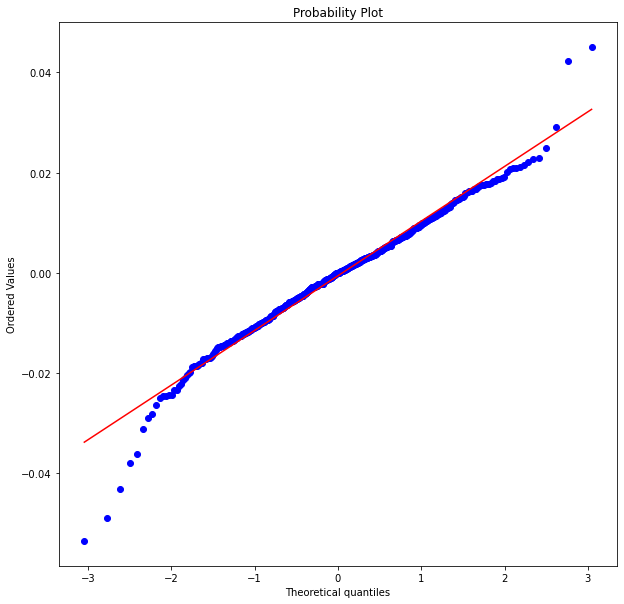

JB statistic: 129.718511663344
p-value: 0.0
-0.0005700831532035048


In [429]:
###TESTING DIFFERENCE END RESULT CODE (APRIL)
aapr['Positive Negative'] = np.where(aapr['Diff'] > 0, 1, 0)

#https://www.youtube.com/watch?v=PGiXtngX3YQ&t=151s&ab_channel=stikpet
rank, pVal = wilcoxon(aapr['Positive Negative']-medmon, zero_method = 'wilcox', correction = False)
print('GB3 Wilcoxon')
print('Rank: ', rank)
print('P-Value: ', pVal)
print('T-Test')
print(stats.ttest_1samp(a = aapr['Diff'], popmean = 0))

print(aapr['Positive Negative'].value_counts())

stats.probplot(aapr['Diff'], dist="norm", plot=pylab)
pylab.show()

result = (jarque_bera(aapr['Diff']))

print(f"JB statistic: {result[0]}")
print(f"p-value: {result[1]}")
print(aapr['Diff'].mean())

In [706]:
#FILTER OUT PINK ERROR BOXES
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [698]:
dhb123.insert(loc=0, column='row_num', value=np.arange(len(dhb123)))
shb123.insert(loc=0, column='row_num', value=np.arange(len(shb123)))

dhb123.set_index('row_num',inplace = True)
shb123.set_index('row_num',inplace = True)

ahb123 = pd.concat([dhb123, shb123], axis = 1)
ahb123 = ahb123.dropna()
ahb123['Diff'] = ahb123['RDJIA'] - ahb123['RSMI']
ahb123['Diff'] = ahb123['Diff']*-1
ahb123.drop(columns=['Year','Quarter','Month','Day','Weekday Number','Month Number','Day Number','Day of Week','Day of Month','Positive Negative'], inplace = True)
ahb123

,RDJIA,RSMI,Diff
row_num,,,
0,0.008870,-0.000727,-0.009597
1,0.019957,-0.012006,-0.031963
2,-0.001272,0.002840,0.004112
3,-0.009479,0.001101,0.010580
4,0.004783,0.017957,0.013174
...,...,...,...
197,-0.000482,0.002167,0.002649
198,-0.003711,-0.023914,-0.020203
199,0.000690,0.002726,0.002036
